#Init

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import copy


from datetime import datetime

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.inspection import permutation_importance

pd.set_option('display.max_rows', 99999)
pd.set_option('display.max_columns', 99999)
pd.set_option('display.width', None)
pd.set_option('max_colwidth', None)

# Arrays of indexes for CV

## Array indexes TEST and TRAIN [BOSTON]

In [ ]:
outer_cv_xtest_indexes_ref = [np.array([  0,   2,   9,  11,  18,  22,  30,  33,  39,  46,  55,  63,  68,
         69,  70,  72,  73,  75,  76,  77,  78,  79,  82,  84,  86,  90,
         93, 101, 104, 124, 131, 132, 137, 140, 153, 172, 173, 176, 195,
        203, 204, 208, 209, 210, 218, 229, 234, 245, 255, 268, 271, 274,
        278, 281, 290, 307, 312, 316, 320, 323, 324, 336, 346, 351, 355,
        362, 365, 371, 375, 381, 388, 390, 392, 395, 398, 408, 411, 412,
        414, 417, 421, 436, 442, 444, 448, 452, 454, 456, 460, 467, 470,
        471, 473, 474, 481, 485, 489, 491, 496, 497, 500, 501]),
 np.array([  3,   5,   7,  15,  16,  17,  19,  23,  24,  25,  26,  29,  31,
         37,  42,  45,  56,  57,  60,  66,  67,  92,  94, 108, 109, 110,
        113, 114, 116, 117, 118, 126, 141, 144, 145, 148, 152, 154, 155,
        157, 168, 175, 180, 181, 182, 185, 192, 193, 194, 211, 220, 222,
        225, 227, 238, 244, 249, 250, 262, 265, 272, 277, 280, 298, 321,
        322, 325, 329, 332, 334, 335, 338, 347, 356, 360, 361, 369, 373,
        383, 394, 400, 404, 405, 409, 418, 420, 423, 432, 433, 434, 437,
        441, 447, 450, 468, 472, 477, 478, 492, 493, 499]),
 np.array([  6,  10,  36,  38,  59,  74,  81,  83,  89,  96,  97, 103, 111,
        112, 119, 122, 123, 125, 129, 139, 143, 146, 147, 150, 158, 163,
        165, 167, 177, 179, 183, 184, 196, 198, 199, 202, 219, 223, 228,
        231, 237, 239, 246, 247, 248, 253, 261, 266, 275, 284, 286, 287,
        289, 291, 294, 296, 297, 299, 301, 302, 304, 305, 310, 311, 317,
        318, 331, 333, 341, 342, 353, 354, 357, 358, 364, 368, 370, 377,
        378, 380, 384, 386, 396, 397, 399, 403, 410, 422, 424, 428, 438,
        455, 457, 475, 476, 480, 483, 484, 487, 490, 503]),
 np.array([  4,   8,  12,  14,  27,  28,  32,  35,  40,  41,  44,  47,  51,
         61,  62,  64,  65,  85,  95,  98, 100, 107, 115, 120, 127, 128,
        133, 135, 136, 138, 142, 156, 159, 162, 164, 170, 171, 178, 186,
        197, 200, 206, 207, 212, 213, 215, 216, 221, 224, 226, 230, 232,
        233, 236, 240, 242, 254, 256, 258, 260, 267, 279, 282, 283, 285,
        288, 292, 300, 314, 326, 327, 337, 340, 349, 352, 367, 374, 376,
        379, 382, 391, 393, 402, 406, 407, 415, 416, 425, 426, 429, 431,
        439, 440, 449, 451, 453, 465, 469, 482, 495, 504]),
 np.array([  1,  13,  20,  21,  34,  43,  48,  49,  50,  52,  53,  54,  58,
         71,  80,  87,  88,  91,  99, 102, 105, 106, 121, 130, 134, 149,
        151, 160, 161, 166, 169, 174, 187, 188, 189, 190, 191, 201, 205,
        214, 217, 235, 241, 243, 251, 252, 257, 259, 263, 264, 269, 270,
        273, 276, 293, 295, 303, 306, 308, 309, 313, 315, 319, 328, 330,
        339, 343, 344, 345, 348, 350, 359, 363, 366, 372, 385, 387, 389,
        401, 413, 419, 427, 430, 435, 443, 445, 446, 458, 459, 461, 462,
        463, 464, 466, 479, 486, 488, 494, 498, 502, 505])]

In [ ]:
outer_cv_xtrain_indexes_ref = [np.array([  1,   3,   4,   5,   6,   7,   8,  10,  12,  13,  14,  15,  16,
         17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  31,  32,
         34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  47,  48,
         49,  50,  51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,
         64,  65,  66,  67,  71,  74,  80,  81,  83,  85,  87,  88,  89,
         91,  92,  94,  95,  96,  97,  98,  99, 100, 102, 103, 105, 106,
        107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
        120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 133, 134, 135,
        136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
        151, 152, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
        165, 166, 167, 168, 169, 170, 171, 174, 175, 177, 178, 179, 180,
        181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 211, 212,
        213, 214, 215, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226,
        227, 228, 230, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241,
        242, 243, 244, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270,
        272, 273, 275, 276, 277, 279, 280, 282, 283, 284, 285, 286, 287,
        288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301,
        302, 303, 304, 305, 306, 308, 309, 310, 311, 313, 314, 315, 317,
        318, 319, 321, 322, 325, 326, 327, 328, 329, 330, 331, 332, 333,
        334, 335, 337, 338, 339, 340, 341, 342, 343, 344, 345, 347, 348,
        349, 350, 352, 353, 354, 356, 357, 358, 359, 360, 361, 363, 364,
        366, 367, 368, 369, 370, 372, 373, 374, 376, 377, 378, 379, 380,
        382, 383, 384, 385, 386, 387, 389, 391, 393, 394, 396, 397, 399,
        400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 413, 415, 416,
        418, 419, 420, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431,
        432, 433, 434, 435, 437, 438, 439, 440, 441, 443, 445, 446, 447,
        449, 450, 451, 453, 455, 457, 458, 459, 461, 462, 463, 464, 465,
        466, 468, 469, 472, 475, 476, 477, 478, 479, 480, 482, 483, 484,
        486, 487, 488, 490, 492, 493, 494, 495, 498, 499, 502, 503, 504,
        505]),
 np.array([  0,   1,   2,   4,   6,   8,   9,  10,  11,  12,  13,  14,  18,
         20,  21,  22,  27,  28,  30,  32,  33,  34,  35,  36,  38,  39,
         40,  41,  43,  44,  46,  47,  48,  49,  50,  51,  52,  53,  54,
         55,  58,  59,  61,  62,  63,  64,  65,  68,  69,  70,  71,  72,
         73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
         86,  87,  88,  89,  90,  91,  93,  95,  96,  97,  98,  99, 100,
        101, 102, 103, 104, 105, 106, 107, 111, 112, 115, 119, 120, 121,
        122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 142, 143, 146, 147, 149, 150, 151, 153,
        156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170,
        171, 172, 173, 174, 176, 177, 178, 179, 183, 184, 186, 187, 188,
        189, 190, 191, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
        205, 206, 207, 208, 209, 210, 212, 213, 214, 215, 216, 217, 218,
        219, 221, 223, 224, 226, 228, 229, 230, 231, 232, 233, 234, 235,
        236, 237, 239, 240, 241, 242, 243, 245, 246, 247, 248, 251, 252,
        253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 266, 267,
        268, 269, 270, 271, 273, 274, 275, 276, 278, 279, 281, 282, 283,
        284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
        297, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,
        311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 323, 324, 326,
        327, 328, 330, 331, 333, 336, 337, 339, 340, 341, 342, 343, 344,
        345, 346, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 359,
        362, 363, 364, 365, 366, 367, 368, 370, 371, 372, 374, 375, 376,
        377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390,
        391, 392, 393, 395, 396, 397, 398, 399, 401, 402, 403, 406, 407,
        408, 410, 411, 412, 413, 414, 415, 416, 417, 419, 421, 422, 424,
        425, 426, 427, 428, 429, 430, 431, 435, 436, 438, 439, 440, 442,
        443, 444, 445, 446, 448, 449, 451, 452, 453, 454, 455, 456, 457,
        458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 469, 470, 471,
        473, 474, 475, 476, 479, 480, 481, 482, 483, 484, 485, 486, 487,
        488, 489, 490, 491, 494, 495, 496, 497, 498, 500, 501, 502, 503,
        504, 505]),
 np.array([  0,   1,   2,   3,   4,   5,   7,   8,   9,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  37,  39,  40,  41,  42,
         43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
         56,  57,  58,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
         70,  71,  72,  73,  75,  76,  77,  78,  79,  80,  82,  84,  85,
         86,  87,  88,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101,
        102, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117,
        118, 120, 121, 124, 126, 127, 128, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 140, 141, 142, 144, 145, 148, 149, 151, 152, 153,
        154, 155, 156, 157, 159, 160, 161, 162, 164, 166, 168, 169, 170,
        171, 172, 173, 174, 175, 176, 178, 180, 181, 182, 185, 186, 187,
        188, 189, 190, 191, 192, 193, 194, 195, 197, 200, 201, 203, 204,
        205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217,
        218, 220, 221, 222, 224, 225, 226, 227, 229, 230, 232, 233, 234,
        235, 236, 238, 240, 241, 242, 243, 244, 245, 249, 250, 251, 252,
        254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 265, 267, 268,
        269, 270, 271, 272, 273, 274, 276, 277, 278, 279, 280, 281, 282,
        283, 285, 288, 290, 292, 293, 295, 298, 300, 303, 306, 307, 308,
        309, 312, 313, 314, 315, 316, 319, 320, 321, 322, 323, 324, 325,
        326, 327, 328, 329, 330, 332, 334, 335, 336, 337, 338, 339, 340,
        343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 355, 356, 359,
        360, 361, 362, 363, 365, 366, 367, 369, 371, 372, 373, 374, 375,
        376, 379, 381, 382, 383, 385, 387, 388, 389, 390, 391, 392, 393,
        394, 395, 398, 400, 401, 402, 404, 405, 406, 407, 408, 409, 411,
        412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 423, 425, 426,
        427, 429, 430, 431, 432, 433, 434, 435, 436, 437, 439, 440, 441,
        442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454,
        456, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
        470, 471, 472, 473, 474, 477, 478, 479, 481, 482, 485, 486, 488,
        489, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502,
        504, 505]),
 np.array([  0,   1,   2,   3,   5,   6,   7,   9,  10,  11,  13,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  29,  30,  31,
         33,  34,  36,  37,  38,  39,  42,  43,  45,  46,  48,  49,  50,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  63,  66,  67,  68,
         69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
         82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  96,
         97,  99, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112,
        113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 129,
        130, 131, 132, 134, 137, 139, 140, 141, 143, 144, 145, 146, 147,
        148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 163,
        165, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 179, 180,
        181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194,
        195, 196, 198, 199, 201, 202, 203, 204, 205, 208, 209, 210, 211,
        214, 217, 218, 219, 220, 222, 223, 225, 227, 228, 229, 231, 234,
        235, 237, 238, 239, 241, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 255, 257, 259, 261, 262, 263, 264, 265, 266, 268,
        269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 284,
        286, 287, 289, 290, 291, 293, 294, 295, 296, 297, 298, 299, 301,
        302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315,
        316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 328, 329, 330,
        331, 332, 333, 334, 335, 336, 338, 339, 341, 342, 343, 344, 345,
        346, 347, 348, 350, 351, 353, 354, 355, 356, 357, 358, 359, 360,
        361, 362, 363, 364, 365, 366, 368, 369, 370, 371, 372, 373, 375,
        377, 378, 380, 381, 383, 384, 385, 386, 387, 388, 389, 390, 392,
        394, 395, 396, 397, 398, 399, 400, 401, 403, 404, 405, 408, 409,
        410, 411, 412, 413, 414, 417, 418, 419, 420, 421, 422, 423, 424,
        427, 428, 430, 432, 433, 434, 435, 436, 437, 438, 441, 442, 443,
        444, 445, 446, 447, 448, 450, 452, 454, 455, 456, 457, 458, 459,
        460, 461, 462, 463, 464, 466, 467, 468, 470, 471, 472, 473, 474,
        475, 476, 477, 478, 479, 480, 481, 483, 484, 485, 486, 487, 488,
        489, 490, 491, 492, 493, 494, 496, 497, 498, 499, 500, 501, 502,
        503, 505]),
 np.array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,
         15,  16,  17,  18,  19,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,  42,  44,
         45,  46,  47,  51,  55,  56,  57,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  72,  73,  74,  75,  76,  77,  78,
         79,  81,  82,  83,  84,  85,  86,  89,  90,  92,  93,  94,  95,
         96,  97,  98, 100, 101, 103, 104, 107, 108, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126,
        127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156,
        157, 158, 159, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173,
        175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 192,
        193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207,
        208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236,
        237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 253,
        254, 255, 256, 258, 260, 261, 262, 265, 266, 267, 268, 271, 272,
        274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
        288, 289, 290, 291, 292, 294, 296, 297, 298, 299, 300, 301, 302,
        304, 305, 307, 310, 311, 312, 314, 316, 317, 318, 320, 321, 322,
        323, 324, 325, 326, 327, 329, 331, 332, 333, 334, 335, 336, 337,
        338, 340, 341, 342, 346, 347, 349, 351, 352, 353, 354, 355, 356,
        357, 358, 360, 361, 362, 364, 365, 367, 368, 369, 370, 371, 373,
        374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 386, 388,
        390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403,
        404, 405, 406, 407, 408, 409, 410, 411, 412, 414, 415, 416, 417,
        418, 420, 421, 422, 423, 424, 425, 426, 428, 429, 431, 432, 433,
        434, 436, 437, 438, 439, 440, 441, 442, 444, 447, 448, 449, 450,
        451, 452, 453, 454, 455, 456, 457, 460, 465, 467, 468, 469, 470,
        471, 472, 473, 474, 475, 476, 477, 478, 480, 481, 482, 483, 484,
        485, 487, 489, 490, 491, 492, 493, 495, 496, 497, 499, 500, 501,
        503, 504])]

\

In [ ]:
outer_cv_xtest_indexes_loop = [np.array([  0,   2,   9,  11,  18,  22,  30,  33,  39,  46,  55,  63,  68,
        69,  70,  72,  73,  75,  76,  77,  78,  79,  82,  84,  86,  90,
        93, 101, 104, 124, 131, 132, 137, 140, 153, 172, 173, 176, 195,
       203, 204, 208, 209, 210, 218, 229, 234, 245, 255, 268, 271, 274,
       278, 281, 290, 307, 312, 316, 320, 323, 324, 336, 346, 351, 355,
       362, 365, 371, 375, 381, 388, 390, 392, 395, 398, 408, 411, 412,
       414, 417, 421, 436, 442, 444, 448, 452, 454, 456, 460, 467, 470,
       471, 473, 474, 481, 485, 489, 491, 496, 497, 500, 501]), np.array([  3,   5,   7,  15,  16,  17,  19,  23,  24,  25,  26,  29,  31,
        37,  42,  45,  56,  57,  60,  66,  67,  92,  94, 108, 109, 110,
       113, 114, 116, 117, 118, 126, 141, 144, 145, 148, 152, 154, 155,
       157, 168, 175, 180, 181, 182, 185, 192, 193, 194, 211, 220, 222,
       225, 227, 238, 244, 249, 250, 262, 265, 272, 277, 280, 298, 321,
       322, 325, 329, 332, 334, 335, 338, 347, 356, 360, 361, 369, 373,
       383, 394, 400, 404, 405, 409, 418, 420, 423, 432, 433, 434, 437,
       441, 447, 450, 468, 472, 477, 478, 492, 493, 499]), np.array([  6,  10,  36,  38,  59,  74,  81,  83,  89,  96,  97, 103, 111,
       112, 119, 122, 123, 125, 129, 139, 143, 146, 147, 150, 158, 163,
       165, 167, 177, 179, 183, 184, 196, 198, 199, 202, 219, 223, 228,
       231, 237, 239, 246, 247, 248, 253, 261, 266, 275, 284, 286, 287,
       289, 291, 294, 296, 297, 299, 301, 302, 304, 305, 310, 311, 317,
       318, 331, 333, 341, 342, 353, 354, 357, 358, 364, 368, 370, 377,
       378, 380, 384, 386, 396, 397, 399, 403, 410, 422, 424, 428, 438,
       455, 457, 475, 476, 480, 483, 484, 487, 490, 503]), np.array([  4,   8,  12,  14,  27,  28,  32,  35,  40,  41,  44,  47,  51,
        61,  62,  64,  65,  85,  95,  98, 100, 107, 115, 120, 127, 128,
       133, 135, 136, 138, 142, 156, 159, 162, 164, 170, 171, 178, 186,
       197, 200, 206, 207, 212, 213, 215, 216, 221, 224, 226, 230, 232,
       233, 236, 240, 242, 254, 256, 258, 260, 267, 279, 282, 283, 285,
       288, 292, 300, 314, 326, 327, 337, 340, 349, 352, 367, 374, 376,
       379, 382, 391, 393, 402, 406, 407, 415, 416, 425, 426, 429, 431,
       439, 440, 449, 451, 453, 465, 469, 482, 495, 504]), np.array([  1,  13,  20,  21,  34,  43,  48,  49,  50,  52,  53,  54,  58,
        71,  80,  87,  88,  91,  99, 102, 105, 106, 121, 130, 134, 149,
       151, 160, 161, 166, 169, 174, 187, 188, 189, 190, 191, 201, 205,
       214, 217, 235, 241, 243, 251, 252, 257, 259, 263, 264, 269, 270,
       273, 276, 293, 295, 303, 306, 308, 309, 313, 315, 319, 328, 330,
       339, 343, 344, 345, 348, 350, 359, 363, 366, 372, 385, 387, 389,
       401, 413, 419, 427, 430, 435, 443, 445, 446, 458, 459, 461, 462,
       463, 464, 466, 479, 486, 488, 494, 498, 502, 505])]

\

\

## Array indexes TEST and TRAIN [666_FRI]

In [ ]:
outer_cv_xtest_indexes_ref = [np.array([ 0, 2, 9, 11, 15, 18, 22, 30, 33, 39, 46, 55, 63, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 82, 84, 86, 90, 93, 101, 104, 124, 131, 148, 154, 155, 172, 173, 180, 182, 185, 193, 194, 204, 209, 211, 238, 262, 268, 277, 278, 280, 290, 304, 312, 316, 317, 321, 323, 324, 333, 334, 336, 341, 347, 352, 356, 361, 362, 371, 374, 377, 381, 384, 388, 391, 394, 406, 408, 409, 410, 414, 415, 431, 438, 440, 450, 451, 455, 461, 465, 472, 475, 477, 483, 485, 490, 491, 494, 495, 497]),
np.array([ 3, 5, 7, 16, 17, 19, 23, 24, 25, 26, 29, 31, 37, 42, 45, 56, 57, 60, 66, 67, 92, 94, 108, 109, 110, 113, 114, 116, 117, 118, 126, 132, 137, 140, 141, 144, 145, 152, 153, 157, 168, 175, 176, 181, 192, 195, 203, 208, 210, 218, 220, 222, 227, 229, 231, 237, 247, 248, 249, 253, 261, 265, 266, 271, 272, 275, 281, 301, 318, 320, 322, 329, 331, 332, 335, 357, 365, 367, 369, 373, 375, 390, 400, 404, 405, 417, 423, 426, 428, 433, 437, 453, 454, 462, 464, 470, 471, 479, 489, 493]),
np.array([ 6, 10, 36, 38, 59, 74, 81, 83, 89, 96, 97, 103, 111, 112, 119, 122, 123, 125, 129, 139, 143, 146, 147, 150, 158, 163, 165, 167, 177, 179, 183, 184, 196, 198, 199, 202, 219, 223, 225, 228, 234, 239, 244, 245, 246, 250, 255, 274, 284, 286, 287, 289, 291, 294, 296, 297, 298, 299, 302, 305, 307, 310, 314, 338, 340, 346, 351, 353, 354, 355, 358, 360, 364, 368, 376, 380, 382, 386, 392, 393, 395, 396, 399, 407, 416, 418, 420, 432, 436, 439, 442, 444, 447, 449, 467, 469, 474, 478, 481, 487]),
np.array([ 4, 8, 12, 14, 27, 28, 32, 35, 40, 41, 44, 47, 51, 61, 62, 64, 65, 85, 95, 98, 100, 107, 115, 120, 127, 128, 133, 135, 136, 138, 142, 156, 159, 162, 164, 170, 171, 178, 186, 197, 200, 206, 207, 213, 215, 216, 221, 224, 226, 230, 232, 233, 236, 240, 242, 254, 256, 258, 260, 267, 279, 282, 283, 285, 288, 292, 300, 311, 325, 326, 327, 337, 342, 349, 370, 378, 379, 383, 397, 398, 402, 403, 411, 412, 421, 422, 424, 425, 429, 430, 434, 446, 448, 452, 460, 463, 468, 476, 484, 498]),
np.array([ 1, 13, 20, 21, 34, 43, 48, 49, 50, 52, 53, 54, 58, 71, 80, 87, 88, 91, 99, 102, 105, 106, 121, 130, 134, 149, 151, 160, 161, 166, 169, 174, 187, 188, 189, 190, 191, 201, 205, 212, 214, 217, 235, 241, 243, 251, 252, 257, 259, 263, 264, 269, 270, 273, 276, 293, 295, 303, 306, 308, 309, 313, 315, 319, 328, 330, 339, 343, 344, 345, 348, 350, 359, 363, 366, 372, 385, 387, 389, 401, 413, 419, 427, 435, 441, 443, 445, 456, 457, 458, 459, 466, 473, 480, 482, 486, 488, 492, 496, 499])]

In [ ]:
outer_cv_xtrain_indexes_ref =  [np.array([ 1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 71, 74, 80, 81, 83, 85, 87, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 174, 175, 176, 177, 178, 179, 181, 183, 184, 186, 187, 188, 189, 190, 191, 192, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 263, 264, 265, 266, 267, 269, 270, 271, 272, 273, 274, 275, 276, 279, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 305, 306, 307, 308, 309, 310, 311, 313, 314, 315, 318, 319, 320, 322, 325, 326, 327, 328, 329, 330, 331, 332, 335, 337, 338, 339, 340, 342, 343, 344, 345, 346, 348, 349, 350, 351, 353, 354, 355, 357, 358, 359, 360, 363, 364, 365, 366, 367, 368, 369, 370, 372, 373, 375, 376, 378, 379, 380, 382, 383, 385, 386, 387, 389, 390, 392, 393, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 407, 411, 412, 413, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 432, 433, 434, 435, 436, 437, 439, 441, 442, 443, 444, 445, 446, 447, 448, 449, 452, 453, 454, 456, 457, 458, 459, 460, 462, 463, 464, 466, 467, 468, 469, 470, 471, 473, 474, 476, 478, 479, 480, 481, 482, 484, 486, 487, 488, 489, 492, 493, 496, 498, 499]),
 np.array([ 0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 15, 18, 20, 21, 22, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 111, 112, 115, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 133, 134, 135, 136, 138, 139, 142, 143, 146, 147, 148, 149, 150, 151, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 177, 178, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 209, 211, 212, 213, 214, 215, 216, 217, 219, 221, 223, 224, 225, 226, 228, 230, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 245, 246, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 262, 263, 264, 267, 268, 269, 270, 273, 274, 276, 277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 319, 321, 323, 324, 325, 326, 327, 328, 330, 333, 334, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 358, 359, 360, 361, 362, 363, 364, 366, 368, 370, 371, 372, 374, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 401, 402, 403, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 418, 419, 420, 421, 422, 424, 425, 427, 429, 430, 431, 432, 434, 435, 436, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 455, 456, 457, 458, 459, 460, 461, 463, 465, 466, 467, 468, 469, 472, 473, 474, 475, 476, 477, 478, 480, 481, 482, 483, 484, 485, 486, 487, 488, 490, 491, 492, 494, 495, 496, 497, 498, 499]),
 np.array([ 0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87, 88, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 120, 121, 124, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 145, 148, 149, 151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 164, 166, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 180, 181, 182, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 224, 226, 227, 229, 230, 231, 232, 233, 235, 236, 237, 238, 240, 241, 242, 243, 247, 248, 249, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 275, 276, 277, 278, 279, 280, 281, 282, 283, 285, 288, 290, 292, 293, 295, 300, 301, 303, 304, 306, 308, 309, 311, 312, 313, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 339, 341, 342, 343, 344, 345, 347, 348, 349, 350, 352, 356, 357, 359, 361, 362, 363, 365, 366, 367, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 381, 383, 384, 385, 387, 388, 389, 390, 391, 394, 397, 398, 400, 401, 402, 403, 404, 405, 406, 408, 409, 410, 411, 412, 413, 414, 415, 417, 419, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 433, 434, 435, 437, 438, 440, 441, 443, 445, 446, 448, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 468, 470, 471, 472, 473, 475, 476, 477, 479, 480, 482, 483, 484, 485, 486, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),
 np.array([ 0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 36, 37, 38, 39, 42, 43, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 134, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 163, 165, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 208, 209, 210, 211, 212, 214, 217, 218, 219, 220, 222, 223, 225, 227, 228, 229, 231, 234, 235, 237, 238, 239, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 257, 259, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 284, 286, 287, 289, 290, 291, 293, 294, 295, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 328, 329, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 341, 343, 344, 345, 346, 347, 348, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 371, 372, 373, 374, 375, 376, 377, 380, 381, 382, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 399, 400, 401, 404, 405, 406, 407, 408, 409, 410, 413, 414, 415, 416, 417, 418, 419, 420, 423, 426, 427, 428, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 447, 449, 450, 451, 453, 454, 455, 456, 457, 458, 459, 461, 462, 464, 465, 466, 467, 469, 470, 471, 472, 473, 474, 475, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 499]),
 np.array([ 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 51, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 253, 254, 255, 256, 258, 260, 261, 262, 265, 266, 267, 268, 271, 272, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 296, 297, 298, 299, 300, 301, 302, 304, 305, 307, 310, 311, 312, 314, 316, 317, 318, 320, 321, 322, 323, 324, 325, 326, 327, 329, 331, 332, 333, 334, 335, 336, 337, 338, 340, 341, 342, 346, 347, 349, 351, 352, 353, 354, 355, 356, 357, 358, 360, 361, 362, 364, 365, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 386, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424, 425, 426, 428, 429, 430, 431, 432, 433, 434, 436, 437, 438, 439, 440, 442, 444, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 460, 461, 462, 463, 464, 465, 467, 468, 469, 470, 471, 472, 474, 475, 476, 477, 478, 479, 481, 483, 484, 485, 487, 489, 490, 491, 493, 494, 495, 497, 498])]

\

\

## Array indexes TEST and TRAIN [rmftsa_ladata]

In [ ]:
outer_cv_xtest_indexes_ref = [np.array([ 0, 2, 9, 11, 18, 22, 30, 33, 39, 46, 55, 63, 68, 69, 70, 72, 73, 76, 77, 78, 79, 82, 84, 90, 93, 101, 104, 117, 124, 131, 132, 140, 153, 154, 167, 172, 176, 180, 181, 182, 185, 192, 194, 204, 208, 209, 211, 228, 229, 231, 234, 247, 250, 268, 272, 275, 278, 280, 284, 291, 297, 299, 301, 314, 316, 320, 321, 324, 325, 338, 356, 367, 376, 394, 396, 397, 400, 403, 406, 410, 415, 416, 423, 439, 447, 449, 450, 457, 469, 472, 475, 482, 485, 487, 491, 492, 493, 494, 499, 502, 503, 506]),
np.array([ 3, 5, 7, 15, 16, 17, 19, 23, 24, 25, 26, 29, 31, 37, 42, 45, 56, 57, 60, 66, 67, 75, 86, 94, 108, 109, 110, 113, 114, 116, 118, 126, 137, 141, 144, 148, 155, 157, 168, 173, 175, 193, 195, 203, 210, 218, 220, 222, 225, 237, 245, 248, 249, 255, 265, 266, 271, 274, 281, 307, 317, 322, 323, 333, 335, 336, 347, 351, 352, 357, 360, 361, 362, 370, 374, 381, 383, 391, 392, 411, 414, 420, 429, 432, 438, 440, 444, 451, 452, 460, 461, 462, 470, 474, 479, 480, 483, 486, 495, 498, 501, 505]),
np.array([ 6, 10, 36, 38, 59, 74, 81, 83, 89, 92, 96, 97, 103, 111, 112, 119, 122, 123, 125, 129, 139, 143, 145, 146, 147, 150, 152, 158, 163, 165, 177, 179, 183, 184, 196, 198, 199, 202, 219, 223, 227, 233, 238, 239, 244, 246, 253, 261, 262, 277, 286, 287, 289, 290, 294, 296, 298, 302, 304, 305, 310, 311, 312, 318, 331, 332, 334, 340, 342, 349, 354, 355, 358, 364, 365, 369, 371, 373, 380, 382, 386, 388, 390, 398, 399, 402, 405, 407, 412, 421, 422, 424, 426, 434, 436, 454, 456, 473, 476, 477, 478, 489]),
np.array([ 4, 8, 12, 14, 27, 28, 32, 35, 40, 41, 44, 47, 51, 61, 62, 64, 65, 85, 95, 98, 100, 107, 115, 120, 127, 128, 133, 135, 136, 138, 142, 156, 159, 162, 164, 170, 171, 178, 186, 197, 200, 206, 207, 212, 213, 215, 216, 221, 224, 226, 230, 232, 236, 240, 242, 254, 256, 258, 260, 267, 279, 282, 283, 285, 288, 292, 300, 326, 327, 329, 337, 341, 346, 353, 368, 375, 377, 378, 379, 384, 393, 395, 404, 408, 409, 417, 418, 425, 428, 431, 433, 437, 441, 442, 446, 453, 455, 467, 468, 471, 484]),
np.array([ 1, 13, 20, 21, 34, 43, 48, 49, 50, 52, 53, 54, 58, 71, 80, 87, 88, 91, 99, 102, 105, 106, 121, 130, 134, 149, 151, 160, 161, 166, 169, 174, 187, 188, 189, 190, 191, 201, 205, 214, 217, 235, 241, 243, 251, 252, 257, 259, 263, 264, 269, 270, 273, 276, 293, 295, 303, 306, 308, 309, 313, 315, 319, 328, 330, 339, 343, 344, 345, 348, 350, 359, 363, 366, 372, 385, 387, 389, 401, 413, 419, 427, 430, 435, 443, 445, 448, 458, 459, 463, 464, 465, 466, 481, 488, 490, 496, 497, 500, 504, 507])]

In [ ]:
outer_cv_xtrain_indexes_ref =  [np.array([ 1, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65, 66, 67, 71, 74, 75, 80, 81, 83, 85, 86, 87, 88, 89, 91, 92, 94, 95, 96, 97, 98, 99, 100, 102, 103, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 119, 120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 173, 174, 175, 177, 178, 179, 183, 184, 186, 187, 188, 189, 190, 191, 193, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 210, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 230, 232, 233, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 248, 249, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 269, 270, 271, 273, 274, 276, 277, 279, 281, 282, 283, 285, 286, 287, 288, 289, 290, 292, 293, 294, 295, 296, 298, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 315, 317, 318, 319, 322, 323, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 368, 369, 370, 371, 372, 373, 374, 375, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 395, 398, 399, 401, 402, 404, 405, 407, 408, 409, 411, 412, 413, 414, 417, 418, 419, 420, 421, 422, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 440, 441, 442, 443, 444, 445, 446, 448, 451, 452, 453, 454, 455, 456, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 470, 471, 473, 474, 476, 477, 478, 479, 480, 481, 483, 484, 486, 488, 489, 490, 495, 496, 497, 498, 500, 501, 504, 505, 507]),
np.array([ 0, 1, 2, 4, 6, 8, 9, 10, 11, 12, 13, 14, 18, 20, 21, 22, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 61, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 111, 112, 115, 117, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 142, 143, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 169, 170, 171, 172, 174, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 211, 212, 213, 214, 215, 216, 217, 219, 221, 223, 224, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238, 239, 240, 241, 242, 243, 244, 246, 247, 250, 251, 252, 253, 254, 256, 257, 258, 259, 260, 261, 262, 263, 264, 267, 268, 269, 270, 272, 273, 275, 276, 277, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 308, 309, 310, 311, 312, 313, 314, 315, 316, 318, 319, 320, 321, 324, 325, 326, 327, 328, 329, 330, 331, 332, 334, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 348, 349, 350, 353, 354, 355, 356, 358, 359, 363, 364, 365, 366, 367, 368, 369, 371, 372, 373, 375, 376, 377, 378, 379, 380, 382, 384, 385, 386, 387, 388, 389, 390, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 412, 413, 415, 416, 417, 418, 419, 421, 422, 423, 424, 425, 426, 427, 428, 430, 431, 433, 434, 435, 436, 437, 439, 441, 442, 443, 445, 446, 447, 448, 449, 450, 453, 454, 455, 456, 457, 458, 459, 463, 464, 465, 466, 467, 468, 469, 471, 472, 473, 475, 476, 477, 478, 481, 482, 484, 485, 487, 488, 489, 490, 491, 492, 493, 494, 496, 497, 499, 500, 502, 503, 504, 506, 507]),
np.array([ 0, 1, 2, 3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 84, 85, 86, 87, 88, 90, 91, 93, 94, 95, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 120, 121, 124, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 141, 142, 144, 148, 149, 151, 153, 154, 155, 156, 157, 159, 160, 161, 162, 164, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 178, 180, 181, 182, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 197, 200, 201, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 222, 224, 225, 226, 228, 229, 230, 231, 232, 234, 235, 236, 237, 240, 241, 242, 243, 245, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 278, 279, 280, 281, 282, 283, 284, 285, 288, 291, 292, 293, 295, 297, 299, 300, 301, 303, 306, 307, 308, 309, 313, 314, 315, 316, 317, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 333, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 350, 351, 352, 353, 356, 357, 359, 360, 361, 362, 363, 366, 367, 368, 370, 372, 374, 375, 376, 377, 378, 379, 381, 383, 384, 385, 387, 389, 391, 392, 393, 394, 395, 396, 397, 400, 401, 403, 404, 406, 408, 409, 410, 411, 413, 414, 415, 416, 417, 418, 419, 420, 423, 425, 427, 428, 429, 430, 431, 432, 433, 435, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 455, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 474, 475, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507]),
np.array([ 0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 33, 34, 36, 37, 38, 39, 42, 43, 45, 46, 48, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 97, 99, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 129, 130, 131, 132, 134, 137, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 157, 158, 160, 161, 163, 165, 166, 167, 168, 169, 172, 173, 174, 175, 176, 177, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 201, 202, 203, 204, 205, 208, 209, 210, 211, 214, 217, 218, 219, 220, 222, 223, 225, 227, 228, 229, 231, 233, 234, 235, 237, 238, 239, 241, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 257, 259, 261, 262, 263, 264, 265, 266, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 281, 284, 286, 287, 289, 290, 291, 293, 294, 295, 296, 297, 298, 299, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 328, 330, 331, 332, 333, 334, 335, 336, 338, 339, 340, 342, 343, 344, 345, 347, 348, 349, 350, 351, 352, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 369, 370, 371, 372, 373, 374, 376, 380, 381, 382, 383, 385, 386, 387, 388, 389, 390, 391, 392, 394, 396, 397, 398, 399, 400, 401, 402, 403, 405, 406, 407, 410, 411, 412, 413, 414, 415, 416, 419, 420, 421, 422, 423, 424, 426, 427, 429, 430, 432, 434, 435, 436, 438, 439, 440, 443, 444, 445, 447, 448, 449, 450, 451, 452, 454, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 469, 470, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507]),
np.array([ 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 51, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 89, 90, 92, 93, 94, 95, 96, 97, 98, 100, 101, 103, 104, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 150, 152, 153, 154, 155, 156, 157, 158, 159, 162, 163, 164, 165, 167, 168, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 236, 237, 238, 239, 240, 242, 244, 245, 246, 247, 248, 249, 250, 253, 254, 255, 256, 258, 260, 261, 262, 265, 266, 267, 268, 271, 272, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 294, 296, 297, 298, 299, 300, 301, 302, 304, 305, 307, 310, 311, 312, 314, 316, 317, 318, 320, 321, 322, 323, 324, 325, 326, 327, 329, 331, 332, 333, 334, 335, 336, 337, 338, 340, 341, 342, 346, 347, 349, 351, 352, 353, 354, 355, 356, 357, 358, 360, 361, 362, 364, 365, 367, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 386, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 414, 415, 416, 417, 418, 420, 421, 422, 423, 424, 425, 426, 428, 429, 431, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 444, 446, 447, 449, 450, 451, 452, 453, 454, 455, 456, 457, 460, 461, 462, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 482, 483, 484, 485, 486, 487, 489, 491, 492, 493, 494, 495, 498, 499, 501, 502, 503, 505, 506])]

\

\

## Array indexes TEST and TRAIN [function]

In [ ]:
outer_cv_xtest_indexes_ref = [np.array([ 0,  4, 10, 12, 18, 22, 30, 31, 33, 39, 44, 45, 55, 66, 67, 76, 77,
       78, 84, 93, 97]),
np.array([ 5,  9, 11, 15, 16, 26, 28, 35, 40, 42, 47, 53, 64, 70, 72, 81, 83,
       89, 91, 96]),
np.array([ 3,  6,  7,  8, 13, 17, 19, 24, 25, 27, 34, 36, 38, 43, 49, 62, 65,
       73, 79, 94]),
np.array([ 32,  41,  46,  48,  50,  54,  56,  57,  58,  59,  61,  68,  69,
        75,  80,  88,  90,  95,  98, 100]),
np.array([ 1,  2, 14, 20, 21, 23, 29, 37, 51, 52, 60, 63, 71, 74, 82, 85, 86,
       87, 92, 99])]


In [ ]:
outer_cv_xtrain_indexes_ref = [np.array([  1,   2,   3,   5,   6,   7,   8,   9,  11,  13,  14,  15,  16,
        17,  19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  32,  34,
        35,  36,  37,  38,  40,  41,  42,  43,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  68,  69,  70,  71,  72,  73,  74,  75,  79,  80,  81,  82,
        83,  85,  86,  87,  88,  89,  90,  91,  92,  94,  95,  96,  98,
        99, 100]),
np.array([  0,   1,   2,   3,   4,   6,   7,   8,  10,  12,  13,  14,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  27,  29,  30,  31,  32,
        33,  34,  36,  37,  38,  39,  41,  43,  44,  45,  46,  48,  49,
        50,  51,  52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        65,  66,  67,  68,  69,  71,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  84,  85,  86,  87,  88,  90,  92,  93,  94,  95,  97,
        98,  99, 100]),
np.array([  0,   1,   2,   4,   5,   9,  10,  11,  12,  14,  15,  16,  18,
        20,  21,  22,  23,  26,  28,  29,  30,  31,  32,  33,  35,  37,
        39,  40,  41,  42,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  66,  67,  68,
        69,  70,  71,  72,  74,  75,  76,  77,  78,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  95,  96,  97,
        98,  99, 100]),
np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34,
       35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 47, 49, 51, 52, 53, 55, 60,
       62, 63, 64, 65, 66, 67, 70, 71, 72, 73, 74, 76, 77, 78, 79, 81, 82,
       83, 84, 85, 86, 87, 89, 91, 92, 93, 94, 96, 97, 99]),
np.array([  0,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  15,
        16,  17,  18,  19,  22,  24,  25,  26,  27,  28,  30,  31,  32,
        33,  34,  35,  36,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  53,  54,  55,  56,  57,  58,  59,  61,  62,
        64,  65,  66,  67,  68,  69,  70,  72,  73,  75,  76,  77,  78,
        79,  80,  81,  83,  84,  88,  89,  90,  91,  93,  94,  95,  96,
        97,  98, 100])]

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



#dataset 646_fri

In [ ]:
df_646_fri_c3_500_10 = pd.read_csv('/content/646_fri_c3_500_10.tsv', sep='\t')
df_646_fri_c3_500_10_2 = df_646_fri_c3_500_10.iloc[:,0:10].copy()
df_646_fri_c3_500_10_2['SPUR'] = df_646_fri_c3_500_10.oz5 + df_646_fri_c3_500_10.oz6
df_646_fri_c3_500_10_2['target'] = df_646_fri_c3_500_10.target

In [ ]:
X =  df_646_fri_c3_500_10_2.iloc[:,0:10].copy()
X2 = df_646_fri_c3_500_10_2.iloc[:,0:11].copy()
y =  df_646_fri_c3_500_10_2.iloc[:,11:12].copy()


In [ ]:
X.to_csv("/content/646_fri_c3_500_10_X.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
X2.to_csv("/content/646_fri_c3_500_10_X_with_noisy_feature.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
y.to_csv("/content/646_fri_c3_500_10_y.csv", header=True, index=False, sep=",", decimal=".")

\

\

In [ ]:
X.shape

(500, 10)

In [ ]:
X.head(2)

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
0  0.679684  0.952877 -0.775190 -1.733060 -0.646589  0.034433  1.041780 -0.959160  1.428423   
1 -1.179604 -1.153223 -0.833558  0.499121 -0.814107 -1.257863  0.590192 -0.604118 -0.819732   

       oz10  
0 -1.138218  
1  0.565932

In [ ]:
X2.head(2)

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
0  0.679684  0.952877 -0.775190 -1.733060 -0.646589  0.034433  1.041780 -0.959160  1.428423   
1 -1.179604 -1.153223 -0.833558  0.499121 -0.814107 -1.257863  0.590192 -0.604118 -0.819732   

       oz10      SPUR  
0 -1.138218 -0.612157  
1  0.565932 -2.071970

In [ ]:
y.head(4)

target
0 -2.344501
1  0.318339
2  0.412499
3 -0.143536

\

In [ ]:
df_646_fri_c3_500_10.shape

(500, 11)

In [ ]:
df_646_fri_c3_500_10_2.shape

(500, 12)

In [ ]:
X.shape

(500, 11)

In [ ]:
y.shape

(500, 1)

In [ ]:
df_646_fri_c3_500_10.head()

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
0  0.679684  0.952877 -0.775190 -1.733060 -0.646589  0.034433  1.041780 -0.959160  1.428423   
1 -1.179604 -1.153223 -0.833558  0.499121 -0.814107 -1.257863  0.590192 -0.604118 -0.819732   
2 -1.438627 -1.058979 -0.867938  1.201597 -1.138270 -0.819749  1.201329  0.226787  1.150329   
3 -0.994038 -1.632690 -1.160491 -0.702969 -0.895909 -0.631834 -1.169687 -0.934518  0.432285   
4  1.733637  1.218325 -0.346761 -1.456528 -0.165564 -0.783515 -1.137522 -0.399117  1.154339   

       oz10    target  
0 -1.138218 -2.344501  
1  0.565932  0.318339  
2  0.668066  0.412499  
3  0.298222 -0.143536  
4 -1.415455  0.028061

In [ ]:
df_646_fri_c3_500_10.describe()

oz1           oz2           oz3           oz4           oz5           oz6  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -6.765476e-10  9.939540e-10 -4.759058e-10 -9.622891e-10 -2.279412e-10 -7.972121e-10   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.257494e+00 -1.738421e+00 -2.041593e+00 -1.737552e+00 -1.559007e+00 -1.685320e+00   
25%   -7.891974e-01 -8.511609e-01 -7.353193e-01 -8.686256e-01 -7.218127e-01 -8.692878e-01   
50%    4.062977e-02  4.745978e-03 -2.076343e-01  7.074554e-03 -3.281277e-01  1.500060e-02   
75%    7.066226e-01  8.631366e-01  6.148766e-01  7.598237e-01  4.684446e-01  9.052450e-01   
max    2.333987e+00  1.643262e+00  3.093140e+00  1.820711e+00  4.075531e+00  1.624924e+00   

                oz7           oz8           oz9          oz10        target  
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  
mean   2.428889e-09 -1.088483e-09  3.539026e-11  4.518079e-10  3.552996e-10  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -1.739502e+00 -1.860574e+00 -1.635673e+00 -1.809605e+00 -2.369098e+00  
25%   -8.606423e-01 -7.894123e-01 -9.087049e-01 -8.015163e-01 -6.547327e-01  
50%    1.207867e-02  5.144590e-02 -8.834097e-02  6.305923e-02  1.210419e-01  
75%    8.538070e-01  8.508638e-01  8.935285e-01  8.291241e-01  6.275521e-01  
max    1.739250e+00  1.617669e+00  1.771109e+00  1.664520e+00  3.547152e+00

In [ ]:
df_646_fri_c3_500_10.corr()

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
oz1     1.000000  0.875345  0.533945  0.078266  0.664830 -0.017385 -0.016230  0.005290  0.009742   
oz2     0.875345  1.000000  0.607122  0.066714  0.668706 -0.014169 -0.001133 -0.004475  0.021108   
oz3     0.533945  0.607122  1.000000  0.644858  0.927421  0.023494  0.012760  0.023662 -0.043190   
oz4     0.078266  0.066714  0.644858  1.000000  0.555638  0.005644 -0.007594  0.018951 -0.064815   
oz5     0.664830  0.668706  0.927421  0.555638  1.000000  0.018005 -0.008682 -0.002413 -0.043739   
oz6    -0.017385 -0.014169  0.023494  0.005644  0.018005  1.000000  0.010901  0.055001  0.036731   
oz7    -0.016230 -0.001133  0.012760 -0.007594 -0.008682  0.010901  1.000000  0.031803 -0.030660   
oz8     0.005290 -0.004475  0.023662  0.018951 -0.002413  0.055001  0.031803  1.000000  0.047611   
oz9     0.009742  0.021108 -0.043190 -0.064815 -0.043739  0.036731 -0.030660  0.047611  1.000000   
oz10    0.021757  0.046865  0.017082 -0.054283  0.008796  0.053337 -0.009325  0.006153 -0.052074   
target -0.041585 -0.147407  0.245793  0.473949  0.281193  0.034102 -0.029521  0.025890  0.011661   

            oz10    target  
oz1     0.021757 -0.041585  
oz2     0.046865 -0.147407  
oz3     0.017082  0.245793  
oz4    -0.054283  0.473949  
oz5     0.008796  0.281193  
oz6     0.053337  0.034102  
oz7    -0.009325 -0.029521  
oz8     0.006153  0.025890  
oz9    -0.052074  0.011661  
oz10    1.000000  0.002251  
target  0.002251  1.000000

In [ ]:
df_646_fri_c3_500_10_2.head()

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
0  0.679684  0.952877 -0.775190 -1.733060 -0.646589  0.034433  1.041780 -0.959160  1.428423   
1 -1.179604 -1.153223 -0.833558  0.499121 -0.814107 -1.257863  0.590192 -0.604118 -0.819732   
2 -1.438627 -1.058979 -0.867938  1.201597 -1.138270 -0.819749  1.201329  0.226787  1.150329   
3 -0.994038 -1.632690 -1.160491 -0.702969 -0.895909 -0.631834 -1.169687 -0.934518  0.432285   
4  1.733637  1.218325 -0.346761 -1.456528 -0.165564 -0.783515 -1.137522 -0.399117  1.154339   

       oz10      SPUR    target  
0 -1.138218 -0.612157 -2.344501  
1  0.565932 -2.071970  0.318339  
2  0.668066 -1.958020  0.412499  
3  0.298222 -1.527744 -0.143536  
4 -1.415455 -0.949078  0.028061

In [ ]:
df_646_fri_c3_500_10_2.describe()

oz1           oz2           oz3           oz4           oz5           oz6  \
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02   
mean  -6.765476e-10  9.939540e-10 -4.759058e-10 -9.622891e-10 -2.279412e-10 -7.972121e-10   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.257494e+00 -1.738421e+00 -2.041593e+00 -1.737552e+00 -1.559007e+00 -1.685320e+00   
25%   -7.891974e-01 -8.511609e-01 -7.353193e-01 -8.686256e-01 -7.218127e-01 -8.692878e-01   
50%    4.062977e-02  4.745978e-03 -2.076343e-01  7.074554e-03 -3.281277e-01  1.500060e-02   
75%    7.066226e-01  8.631366e-01  6.148766e-01  7.598237e-01  4.684446e-01  9.052450e-01   
max    2.333987e+00  1.643262e+00  3.093140e+00  1.820711e+00  4.075531e+00  1.624924e+00   

                oz7           oz8           oz9          oz10          SPUR        target  
count  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  5.000000e+02  
mean   2.428889e-09 -1.088483e-09  3.539026e-11  4.518079e-10 -1.025153e-09  3.552996e-10  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.426888e+00  1.000000e+00  
min   -1.739502e+00 -1.860574e+00 -1.635673e+00 -1.809605e+00 -2.736999e+00 -2.369098e+00  
25%   -8.606423e-01 -7.894123e-01 -9.087049e-01 -8.015163e-01 -1.067241e+00 -6.547327e-01  
50%    1.207867e-02  5.144590e-02 -8.834097e-02  6.305923e-02  2.012005e-02  1.210419e-01  
75%    8.538070e-01  8.508638e-01  8.935285e-01  8.291241e-01  8.655020e-01  6.275521e-01  
max    1.739250e+00  1.617669e+00  1.771109e+00  1.664520e+00  5.072583e+00  3.547152e+00

In [ ]:
df_646_fri_c3_500_10_2.corr()

oz1       oz2       oz3       oz4       oz5       oz6       oz7       oz8       oz9  \
oz1     1.000000  0.875345  0.533945  0.078266  0.664830 -0.017385 -0.016230  0.005290  0.009742   
oz2     0.875345  1.000000  0.607122  0.066714  0.668706 -0.014169 -0.001133 -0.004475  0.021108   
oz3     0.533945  0.607122  1.000000  0.644858  0.927421  0.023494  0.012760  0.023662 -0.043190   
oz4     0.078266  0.066714  0.644858  1.000000  0.555638  0.005644 -0.007594  0.018951 -0.064815   
oz5     0.664830  0.668706  0.927421  0.555638  1.000000  0.018005 -0.008682 -0.002413 -0.043739   
oz6    -0.017385 -0.014169  0.023494  0.005644  0.018005  1.000000  0.010901  0.055001  0.036731   
oz7    -0.016230 -0.001133  0.012760 -0.007594 -0.008682  0.010901  1.000000  0.031803 -0.030660   
oz8     0.005290 -0.004475  0.023662  0.018951 -0.002413  0.055001  0.031803  1.000000  0.047611   
oz9     0.009742  0.021108 -0.043190 -0.064815 -0.043739  0.036731 -0.030660  0.047611  1.000000   
oz10    0.021757  0.046865  0.017082 -0.054283  0.008796  0.053337 -0.009325  0.006153 -0.052074   
SPUR    0.453746  0.458716  0.666426  0.393361  0.713444  0.713444  0.001555  0.036855 -0.004911   
target -0.041585 -0.147407  0.245793  0.473949  0.281193  0.034102 -0.029521  0.025890  0.011661   

            oz10      SPUR    target  
oz1     0.021757  0.453746 -0.041585  
oz2     0.046865  0.458716 -0.147407  
oz3     0.017082  0.666426  0.245793  
oz4    -0.054283  0.393361  0.473949  
oz5     0.008796  0.713444  0.281193  
oz6     0.053337  0.713444  0.034102  
oz7    -0.009325  0.001555 -0.029521  
oz8     0.006153  0.036855  0.025890  
oz9    -0.052074 -0.004911  0.011661  
oz10    1.000000  0.043545  0.002251  
SPUR    0.043545  1.000000  0.220966  
target  0.002251  0.220966  1.000000

\

<Axes: >

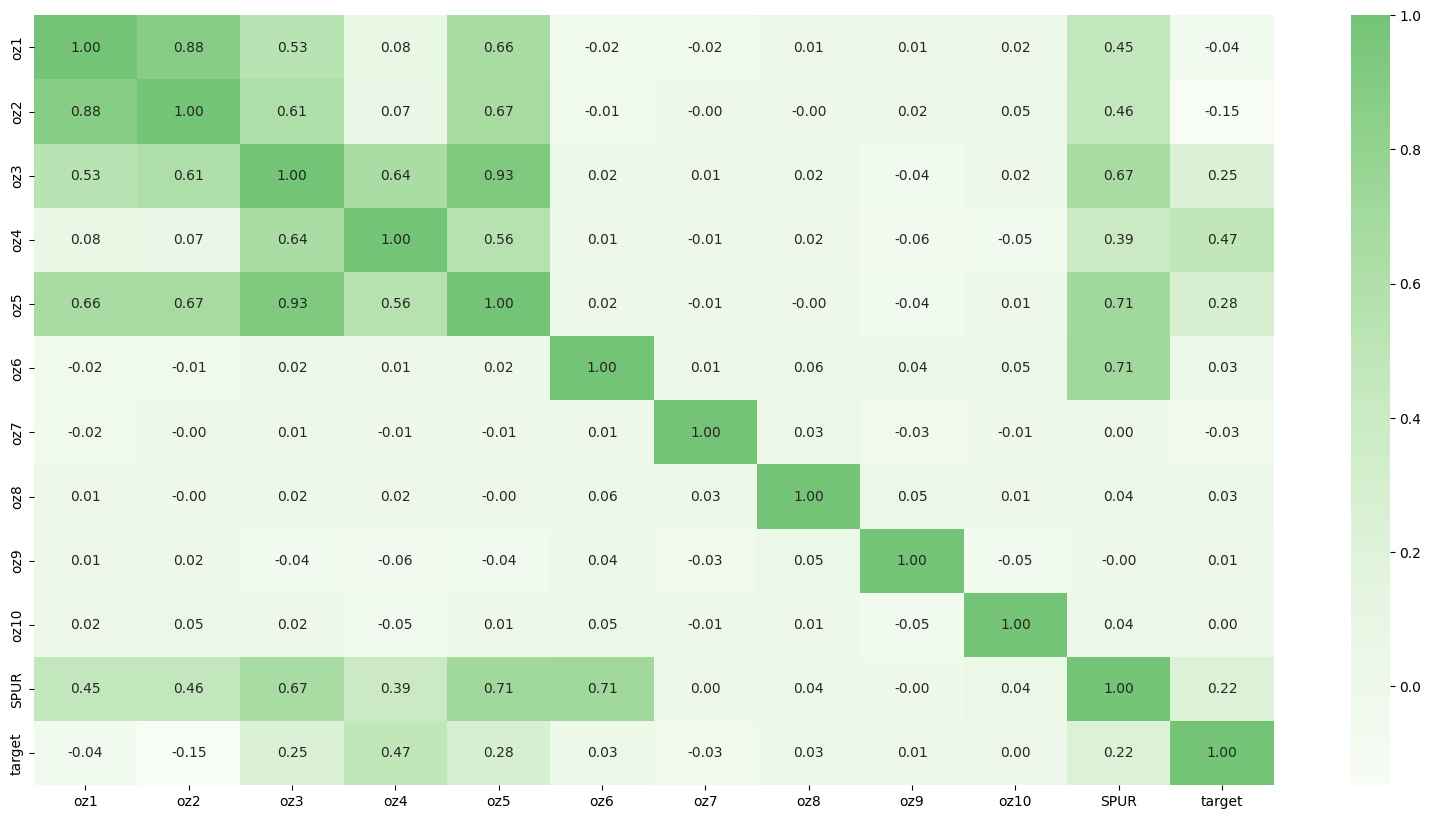

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_646_fri_c3_500_10_2.corr(), annot=True, cmap='Greens', center=1, fmt='.2f')


\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



#dataset rmftsa_ladata



In [ ]:
df_666_rmftsa_ladata = pd.read_csv('/content/666_rmftsa_ladata.tsv', sep='\t')
#df_666_rmftsa_ladata = pd.read_csv('666_rmftsa_ladata.tsv', sep='\t')

In [ ]:
df_666_rmftsa_ladata.shape

(508, 11)

In [ ]:
df_666_rmftsa_ladata.head(2)

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
0       183.630005                 97.849998    72.379997          29.200001            11.51   
1       191.050003                104.639999    67.190002          67.510002             8.92   

   Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons  Ozone  Particulates  target  
0                         3.37              9.64     45.790001   6.69     72.720001   11.90  
1                         2.59             10.05     43.900002   6.83     49.599998   10.75

\

In [ ]:
df_666_rmftsa_ladata_2 = df_666_rmftsa_ladata.iloc[:,0:10].copy()
df_666_rmftsa_ladata_2['SPUR'] = df_666_rmftsa_ladata.Particulates + df_666_rmftsa_ladata.Nitrogen_Dioxide
df_666_rmftsa_ladata_2['target'] = df_666_rmftsa_ladata.target

In [ ]:
X = df_666_rmftsa_ladata.iloc[:,0:10].copy()
X2 = X.copy()
X2['SPUR'] = X.Particulates + X.Nitrogen_Dioxide
y = df_666_rmftsa_ladata.iloc[:,10:11].copy()

In [ ]:
X.to_csv("/content/666_rmftsa_ladata_X.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
X2.to_csv("/content/666_rmftsa_ladata_X_with_noisy_feature.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
y.to_csv("/content/666_rmftsa_ladata_y.csv", header=True, index=False, sep=",", decimal=".")

\

\

In [ ]:
X.shape

(508, 10)

In [ ]:
X.head(2)

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
0       183.630005                 97.849998    72.379997          29.200001            11.51   
1       191.050003                104.639999    67.190002          67.510002             8.92   

   Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons  Ozone  Particulates  
0                         3.37              9.64     45.790001   6.69     72.720001  
1                         2.59             10.05     43.900002   6.83     49.599998

In [ ]:
X2.head(2)

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  \
0       183.630005                 97.849998    72.379997          29.200001   
1       191.050003                104.639999    67.190002          67.510002   

   Carbon_Monoxide  Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  \
0            11.51                         3.37              9.64   
1             8.92                         2.59             10.05   

   Hydrocarbons  Ozone  Particulates       SPUR  
0     45.790001   6.69     72.720001  82.360002  
1     43.900002   6.83     49.599998  59.649999

In [ ]:
y.head(4)

target
0   11.90
1   10.75
2    9.33
3    9.54

\

\

In [ ]:
df_666_rmftsa_ladata.shape

(508, 11)

In [ ]:
df_666_rmftsa_ladata_2.shape

(508, 12)

In [ ]:
df_666_rmftsa_ladata.head()

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
0       183.630005                 97.849998    72.379997          29.200001            11.51   
1       191.050003                104.639999    67.190002          67.510002             8.92   
2       180.089996                 94.360001    62.939999          61.419998             9.48   
3       184.669998                 98.050003    72.489998          58.990002            10.28   
4       173.600006                 95.849998    74.250000          34.799999            10.57   

   Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons  Ozone  Particulates  target  
0                         3.37              9.64     45.790001   6.69     72.720001   11.90  
1                         2.59             10.05     43.900002   6.83     49.599998   10.75  
2                         3.29              7.80     32.180000   4.98     55.680000    9.33  
3                         3.04             13.39     40.430000   9.25     55.160000    9.54  
4                         3.39             11.90     48.529999   9.15     66.019997    8.27

In [ ]:
df_666_rmftsa_ladata.describe()

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
count       508.000000                508.000000   508.000000         508.000000       508.000000   
mean        169.048169                 88.698878    74.260413          58.830807         7.909291   
std          14.182873                  9.998688     9.013578          11.844063         3.762013   
min         142.130005                 68.110001    50.910000          17.650000         2.520000   
25%         159.635002                 81.900003    67.235001          51.837501         4.970000   
50%         166.740005                 87.330002    74.055000          60.459999         6.865000   
75%         176.412495                 94.360001    81.489998          67.125000        10.080000   
max         231.729996                132.039993    99.879997          93.010002        22.389999   

       Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons       Ozone  Particulates  \
count                   508.000000        508.000000    508.000000  508.000000    508.000000   
mean                      2.844429         11.221240     50.484154    8.334449     47.413209   
std                       1.050620          4.080037     13.533590    4.445372     15.138256   
min                       0.860000          4.140000     21.570000    1.140000     20.250000   
25%                       2.050000          8.257500     40.207500    4.587500     35.850000   
50%                       2.740000         10.555000     48.234999    7.850000     44.250000   
75%                       3.465000         13.510000     59.692501   11.255000     57.542500   
max                       6.570000         25.180000    100.120003   22.049999     97.940002   

           target  
count  508.000000  
mean     8.386516  
std      2.866402  
min      4.150000  
25%      6.667500  
50%      7.760000  
75%      9.182500  
max     30.430000

In [ ]:
df_666_rmftsa_ladata_2.head()

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
0       183.630005                 97.849998    72.379997          29.200001            11.51   
1       191.050003                104.639999    67.190002          67.510002             8.92   
2       180.089996                 94.360001    62.939999          61.419998             9.48   
3       184.669998                 98.050003    72.489998          58.990002            10.28   
4       173.600006                 95.849998    74.250000          34.799999            10.57   

   Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons  Ozone  Particulates       SPUR  \
0                         3.37              9.64     45.790001   6.69     72.720001  82.360002   
1                         2.59             10.05     43.900002   6.83     49.599998  59.649999   
2                         3.29              7.80     32.180000   4.98     55.680000  63.480000   
3                         3.04             13.39     40.430000   9.25     55.160000  68.550000   
4                         3.39             11.90     48.529999   9.15     66.019997  77.919996   

   target  
0   11.90  
1   10.75  
2    9.33  
3    9.54  
4    8.27

In [ ]:
df_666_rmftsa_ladata_2.describe()

Total_Mortality  Cardiovascular_Mortality  Temperature  Relative_Humidity  Carbon_Monoxide  \
count       508.000000                508.000000   508.000000         508.000000       508.000000   
mean        169.048169                 88.698878    74.260413          58.830807         7.909291   
std          14.182873                  9.998688     9.013578          11.844063         3.762013   
min         142.130005                 68.110001    50.910000          17.650000         2.520000   
25%         159.635002                 81.900003    67.235001          51.837501         4.970000   
50%         166.740005                 87.330002    74.055000          60.459999         6.865000   
75%         176.412495                 94.360001    81.489998          67.125000        10.080000   
max         231.729996                132.039993    99.879997          93.010002        22.389999   

       Sulfur_Dioxideglm.LAshumway  Nitrogen_Dioxide  Hydrocarbons       Ozone  Particulates  \
count                   508.000000        508.000000    508.000000  508.000000    508.000000   
mean                      2.844429         11.221240     50.484154    8.334449     47.413209   
std                       1.050620          4.080037     13.533590    4.445372     15.138256   
min                       0.860000          4.140000     21.570000    1.140000     20.250000   
25%                       2.050000          8.257500     40.207500    4.587500     35.850000   
50%                       2.740000         10.555000     48.234999    7.850000     44.250000   
75%                       3.465000         13.510000     59.692501   11.255000     57.542500   
max                       6.570000         25.180000    100.120003   22.049999     97.940002   

             SPUR      target  
count  508.000000  508.000000  
mean    58.634449    8.386516  
std     18.354362    2.866402  
min     24.390000    4.150000  
25%     44.814998    6.667500  
50%     55.280000    7.760000  
75%     71.324999    9.182500  
max    119.810003   30.430000

\

In [ ]:
df_666_rmftsa_ladata_2.corr()

Total_Mortality  Cardiovascular_Mortality  Temperature  \
Total_Mortality                     1.000000                  0.923674    -0.360181   
Cardiovascular_Mortality            0.923674                  1.000000    -0.438640   
Temperature                        -0.360181                 -0.438640     1.000000   
Relative_Humidity                  -0.246011                 -0.235724    -0.293289   
Carbon_Monoxide                     0.557074                  0.557448    -0.097856   
Sulfur_Dioxideglm.LAshumway         0.230859                  0.256999     0.404374   
Nitrogen_Dioxide                    0.220011                  0.167410     0.429853   
Hydrocarbons                        0.440711                  0.401139     0.114137   
Ozone                              -0.351849                 -0.426024     0.851378   
Particulates                        0.474102                  0.443871    -0.017231   
SPUR                                0.439936                  0.403309     0.081341   
target                              0.726960                  0.613788    -0.330558   

                             Relative_Humidity  Carbon_Monoxide  Sulfur_Dioxideglm.LAshumway  \
Total_Mortality                      -0.246011         0.557074                     0.230859   
Cardiovascular_Mortality             -0.235724         0.557448                     0.256999   
Temperature                          -0.293289        -0.097856                     0.404374   
Relative_Humidity                     1.000000        -0.437856                    -0.272133   
Carbon_Monoxide                      -0.437856         1.000000                     0.513005   
Sulfur_Dioxideglm.LAshumway          -0.272133         0.513005                     1.000000   
Nitrogen_Dioxide                     -0.374084         0.687954                     0.730021   
Hydrocarbons                         -0.429818         0.851045                     0.612866   
Ozone                                -0.049353        -0.251062                     0.405082   
Particulates                         -0.432784         0.866117                     0.467934   
SPUR                                 -0.440106         0.867281                     0.548219   
target                               -0.075761         0.295821                     0.004091   

                             Nitrogen_Dioxide  Hydrocarbons     Ozone  Particulates      SPUR  \
Total_Mortality                      0.220011      0.440711 -0.351849      0.474102  0.439936   
Cardiovascular_Mortality             0.167410      0.401139 -0.426024      0.443871  0.403309   
Temperature                          0.429853      0.114137  0.851378     -0.017231  0.081341   
Relative_Humidity                   -0.374084     -0.429818 -0.049353     -0.432784 -0.440106   
Carbon_Monoxide                      0.687954      0.851045 -0.251062      0.866117  0.867281   
Sulfur_Dioxideglm.LAshumway          0.730021      0.612866  0.405082      0.467934  0.548219   
Nitrogen_Dioxide                     1.000000      0.822395  0.346277      0.737227  0.830340   
Hydrocarbons                         0.822395      1.000000 -0.007747      0.807504  0.848823   
Ozone                                0.346277     -0.007747  1.000000     -0.122845 -0.024345   
Particulates                         0.737227      0.807504 -0.122845      1.000000  0.988657   
SPUR                                 0.830340      0.848823 -0.024345      0.988657  1.000000   
target                               0.061665      0.215748 -0.324815      0.264985  0.232261   

                               target  
Total_Mortality              0.726960  
Cardiovascular_Mortality     0.613788  
Temperature                 -0.330558  
Relative_Humidity           -0.075761  
Carbon_Monoxide              0.295821  
Sulfur_Dioxideglm.LAshumway  0.004091  
Nitrogen_Dioxide             0.061665  
Hydrocarbons                 0.215748  
Ozone                     

\

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Total_Mortality'),
  Text(1.5, 0, 'Cardiovascular_Mortality'),
  Text(2.5, 0, 'Temperature'),
  Text(3.5, 0, 'Relative_Humidity'),
  Text(4.5, 0, 'Carbon_Monoxide'),
  Text(5.5, 0, 'Sulfur_Dioxideglm.LAshumway'),
  Text(6.5, 0, 'Nitrogen_Dioxide'),
  Text(7.5, 0, 'Hydrocarbons'),
  Text(8.5, 0, 'Ozone'),
  Text(9.5, 0, 'Particulates'),
  Text(10.5, 0, 'SPUR'),
  Text(11.5, 0, 'target')])

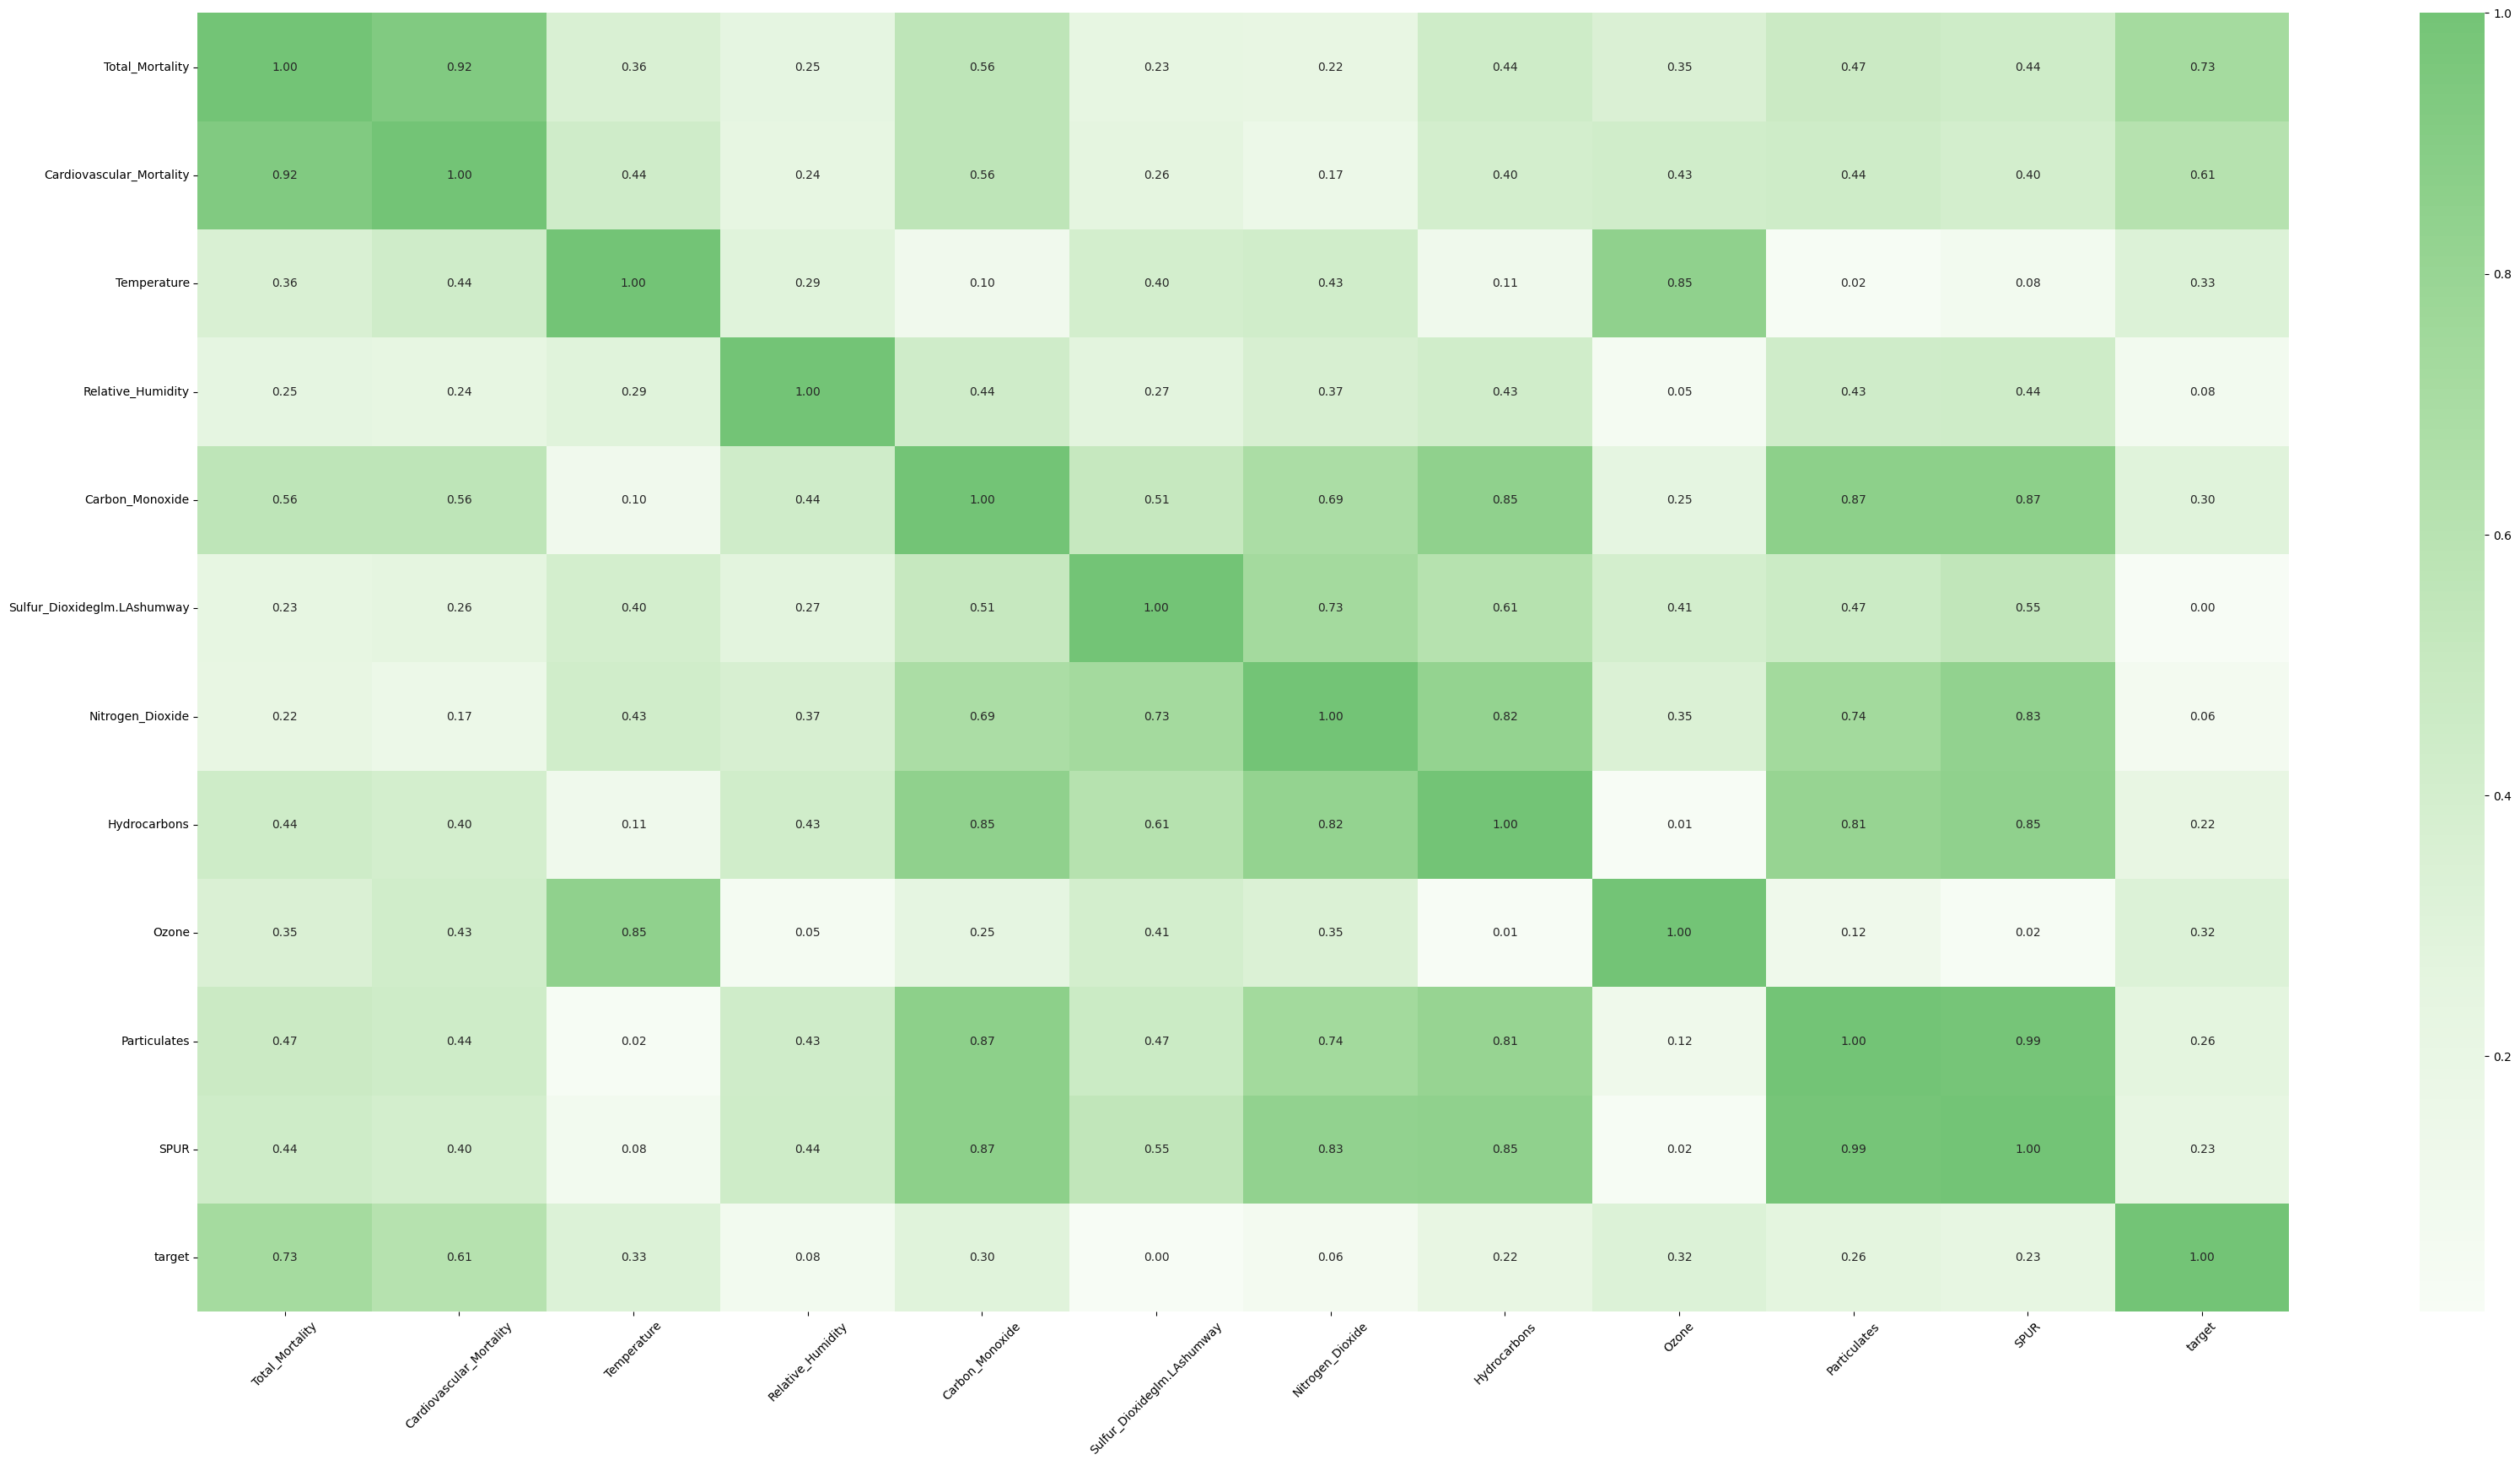

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(df_666_rmftsa_ladata_2.corr().abs(), annot=True, cmap='Greens', center=1, fmt='.2f')
plt.xticks(rotation=45)

\

\

\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



#dataset Boston

In [ ]:


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]



feature_names = ['CRIM',	'ZN',	'INDUS',	'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']


X = pd.DataFrame(data=data, columns=feature_names)
y = pd.DataFrame(data=target, columns=['target'])  # original name is MEDV
X2 = X.copy()
X2['SPUR'] = X['ZN'] + X['RM'] + X['B'] + y['target']

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
mms = MinMaxScaler()
X2[['SPUR']] = mms.fit_transform(X2[['SPUR']])
X2['SPUR'] = X2['SPUR'] + X['NOX']


In [ ]:
X.to_csv("/content/boston_X.csv", sep=",", decimal=".", header=True, index=False)

In [ ]:
y.to_csv("/content/boston_y.csv", sep=",", decimal=".", header=True, index=False)

In [ ]:
X2.to_csv("/content/boston_X_with_noisy_feature.csv", sep=",", decimal=".", header=True, index=False)

\

\

In [ ]:
X.shape

(506, 13)

In [ ]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7  396.90   5.33

In [ ]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063  
std      2.105710    8.707259  168.537116    2.164946   91.294864    7.141062  
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000  
25%      2.100175    4.000000  279.000000   17.400000  375.377500    6.950000  
50%      3.207450    5.000000  330.000000   19.050000  391.440000   11.360000  
75%      5.188425   24.000000  666.000000   20.200000  396.225000   16.955000  
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000

In [ ]:
X2.shape

(506, 14)

In [ ]:
X2.head(3)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.90   4.98   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.90   9.14   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8  392.83   4.03   

      SPUR  
0  421.475  
1  403.321  
2  400.015

In [ ]:
X2.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT        SPUR  
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063    1.300165  
std      2.105710    8.707259  168.537116    2.164946   91.294864    7.141062    0.176386  
min      1.129600    1.000000  187.000000   12.600000    0.320000    1.730000    0.588356  
25%      2.100175    4.000000  279.000000   17.400000  375.377500    6.950000    1.266410  
50%      3.207450    5.000000  330.000000   19.050000  391.440000   11.360000    1.318430  
75%      5.188425   24.000000  666.000000   20.200000  396.225000   16.955000    1.383662  
max     12.126500   24.000000  711.000000   22.000000  396.900000   37.970000    1.673398

\

\

\

In [ ]:
Xaux = X.copy()
Xaux['target'] = y

X2aux = X2.copy()
X2aux['target'] = y

In [ ]:
Xaux.shape

(506, 14)

In [ ]:
X2aux.shape

(506, 15)

In [ ]:
Xaux.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO      B  LSTAT  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.9   4.98   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.9   9.14   

   target  
0    24.0  
1    21.6

In [ ]:
X2aux.head(2)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO      B  LSTAT  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0     15.3  396.9   4.98   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8  396.9   9.14   

      SPUR  target  
0  421.475    24.0  
1  403.321    21.6

In [ ]:
Xaux.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS       RAD  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670  0.625505   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537  0.664408 -0.311948   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027  0.595129   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176 -0.007368   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230  0.611441   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246 -0.209847   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000 -0.747881  0.456022   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881  1.000000 -0.494588   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022 -0.494588  1.000000   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456 -0.534432  0.910228   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515 -0.232471  0.464741   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534  0.291512 -0.444413   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339 -0.496996  0.488676   
target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955  0.249929 -0.381626   

              TAX   PTRATIO         B     LSTAT    target  
CRIM     0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN      -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS    0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX      0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM      -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE      0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS     -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD      0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX      1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B       -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT    0.543993  0.374044 -0.366087  1.000000 -0.737663  
target  -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [ ]:
X2aux.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE       DIS       RAD  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734 -0.379670  0.625505   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537  0.664408 -0.311948   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779 -0.708027  0.595129   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518 -0.099176 -0.007368   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470 -0.769230  0.611441   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265  0.205246 -0.209847   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000 -0.747881  0.456022   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881  1.000000 -0.494588   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022 -0.494588  1.000000   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456 -0.534432  0.910228   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515 -0.232471  0.464741   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534  0.291512 -0.444413   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339 -0.496996  0.488676   
SPUR    -0.201766  0.129201 -0.038373  0.119519  0.109714  0.086590  0.027955 -0.023813 -0.161349   
target  -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955  0.249929 -0.381626   

              TAX   PTRATIO         B     LSTAT      SPUR    target  
CRIM     0.582764  0.289946 -0.385064  0.455621 -0.201766 -0.388305  
ZN      -0.314563 -0.391679  0.175520 -0.412995  0.129201  0.360445  
INDUS    0.720760  0.383248 -0.356977  0.603800 -0.038373 -0.483725  
CHAS    -0.035587 -0.121515  0.048788 -0.053929  0.119519  0.175260  
NOX      0.668023  0.188933 -0.380051  0.590879  0.109714 -0.427321  
RM      -0.292048 -0.355501  0.128069 -0.613808  0.086590  0.695360  
AGE      0.506456  0.261515 -0.273534  0.602339  0.027955 -0.376955  
DIS     -0.534432 -0.232471  0.291512 -0.496996 -0.023813  0.249929  
RAD      0.910228  0.464741 -0.444413  0.488676 -0.161349 -0.381626  
TAX      1.000000  0.460853 -0.441808  0.543993 -0.130505 -0.468536  
PTRATIO  0.460853  1.000000 -0.177383  0.374044 -0.210440 -0.507787  
B       -0.441808 -0.177383  1.000000 -0.366087  0.845633  0.333461  
LSTAT    0.543993  0.374044 -0.366087  1.000000 -0.161483 -0.737663  
SPUR    -0.130505 -0.210440  0.845633 -0.161483  1.000000  0.253243  
target  -0.468536 -0.507787  0.333461 -0.737663  0.253243  1.000000

<Axes: >

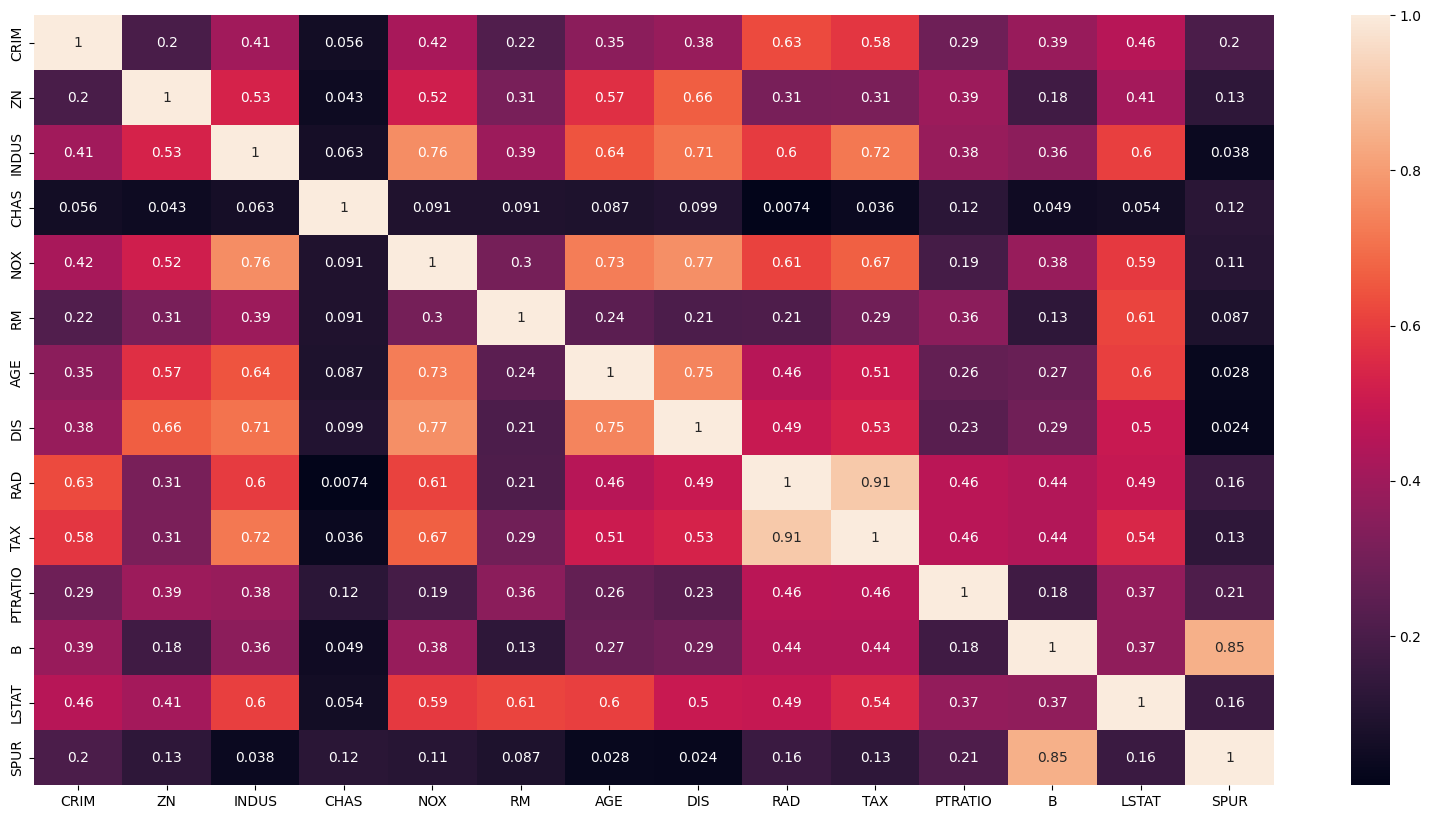

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(X2.corr().abs(), annot=True)

<Axes: >

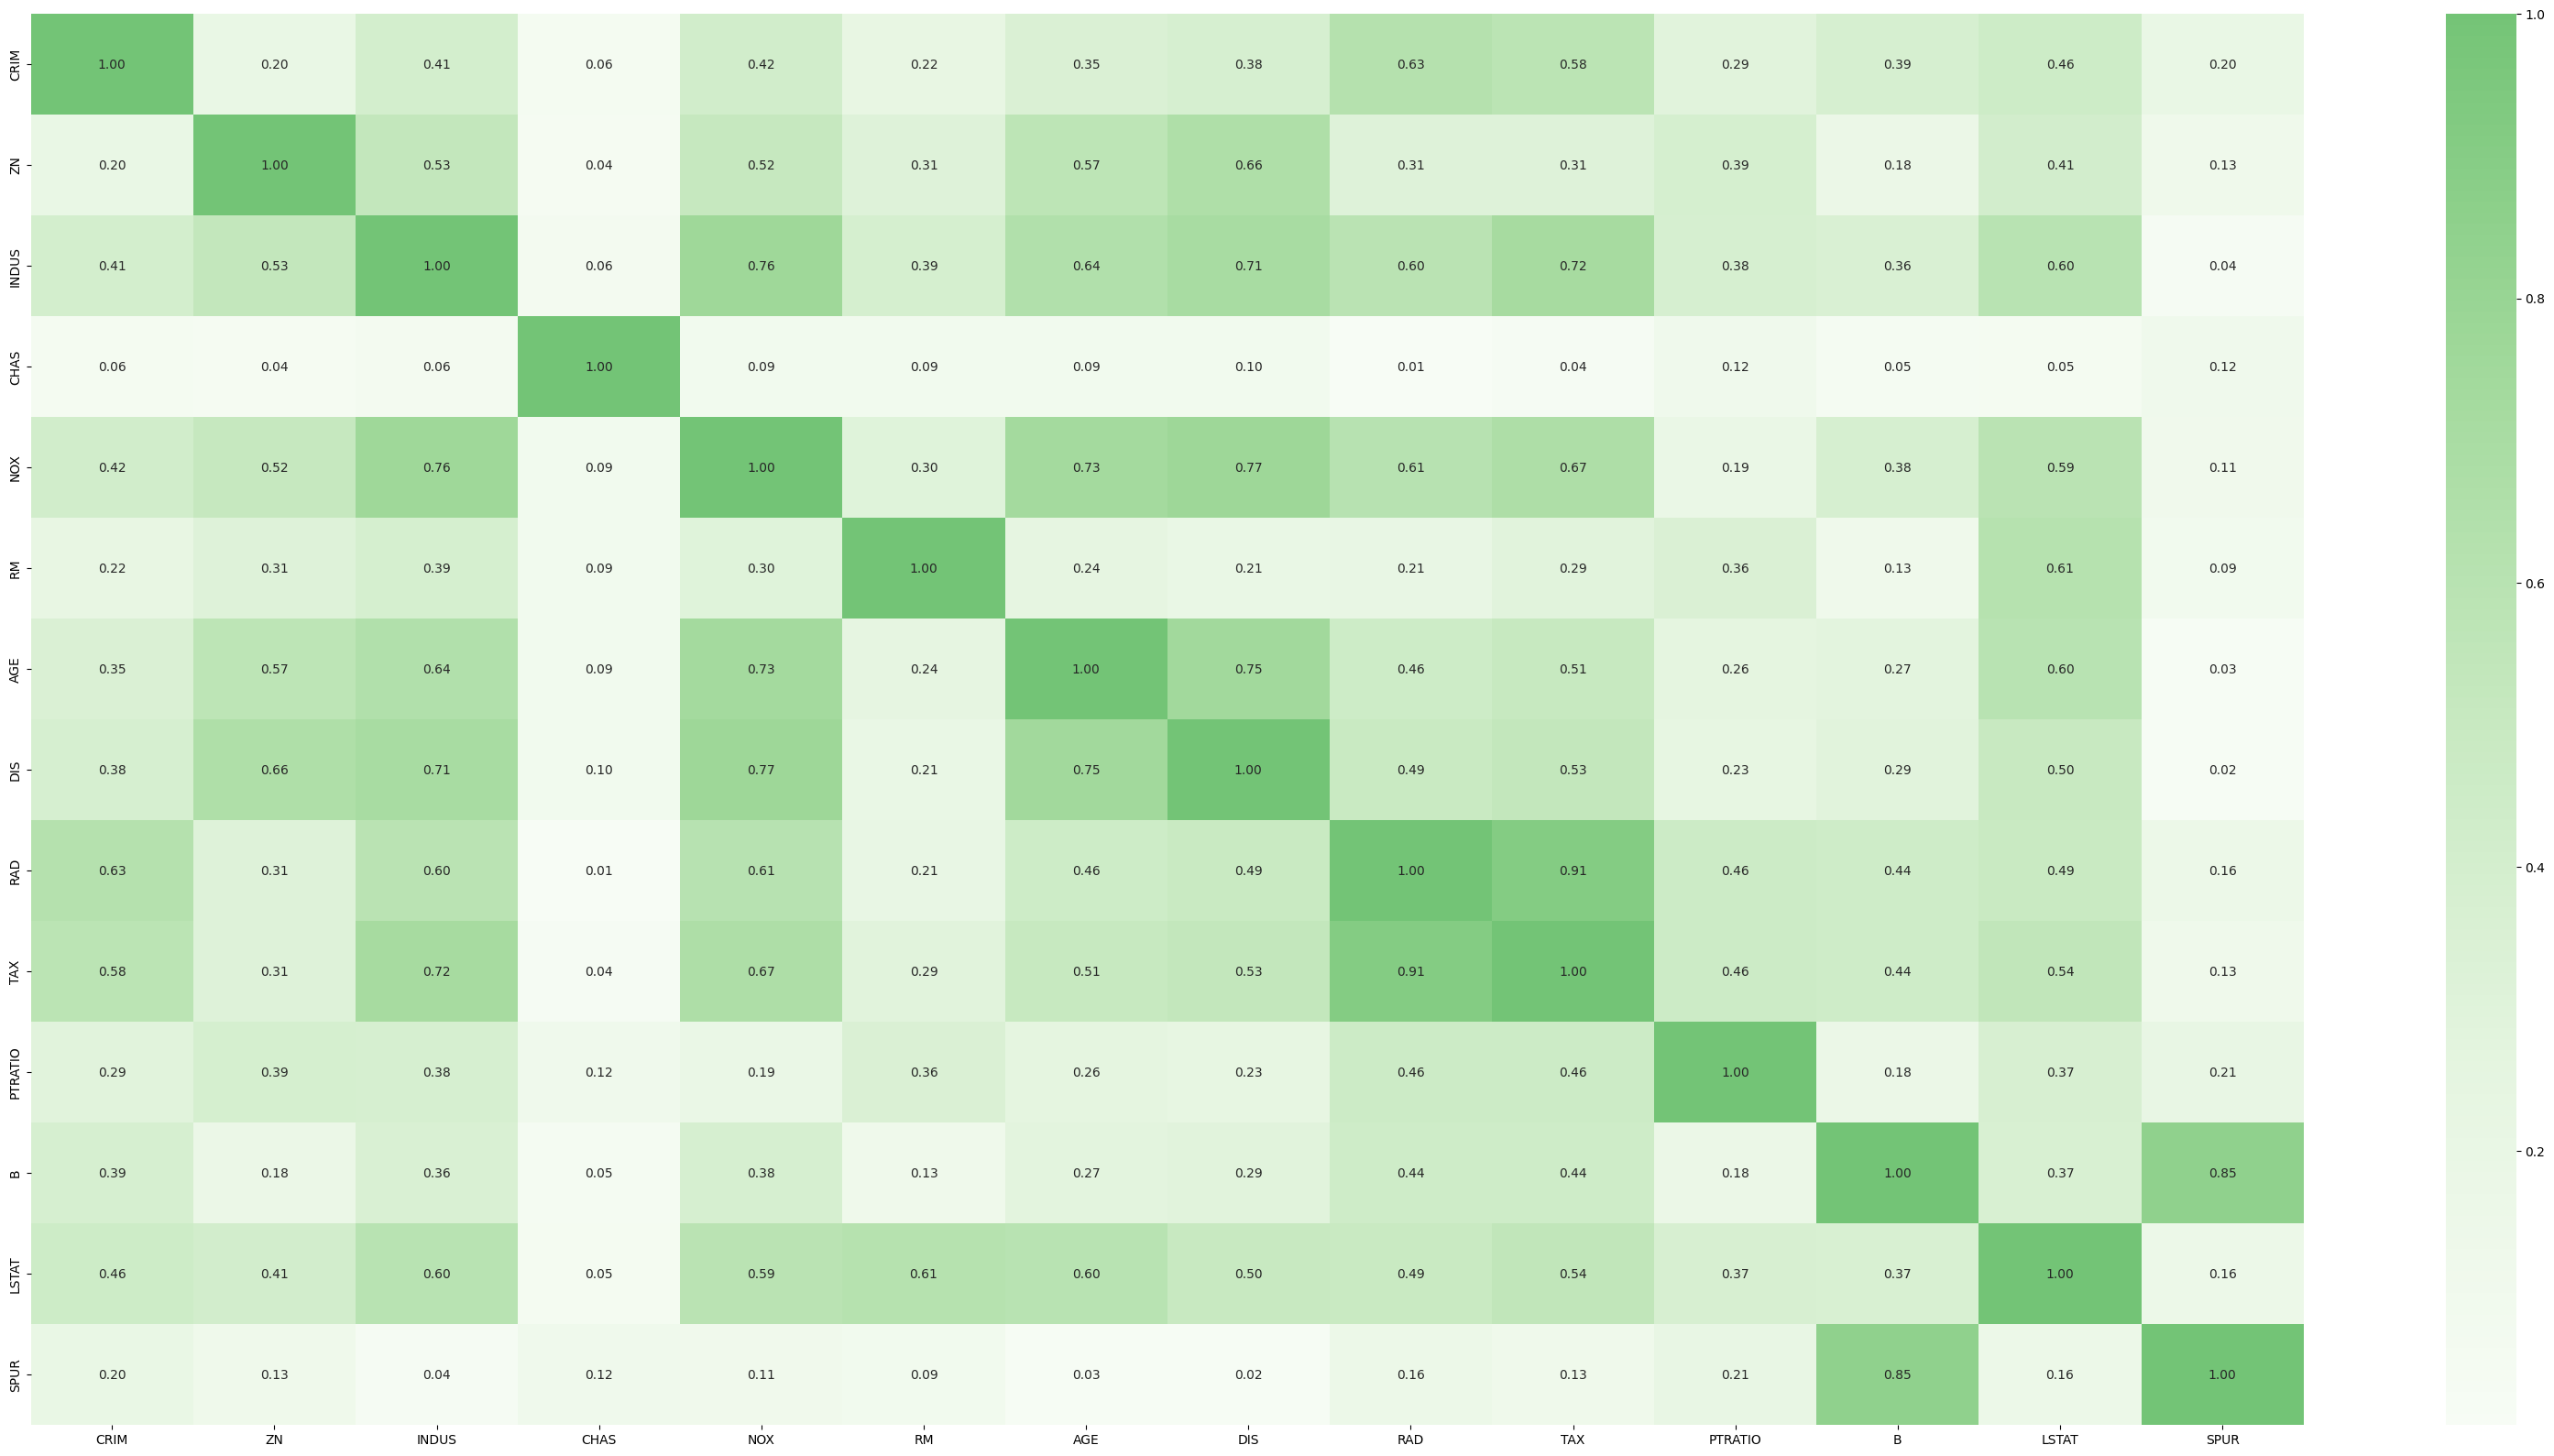

In [ ]:
plt.figure(figsize=(40, 20))
sns.heatmap(X2.corr().abs(),  annot=True, center=1,  fmt=".2f", cmap='Greens')

\

\

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

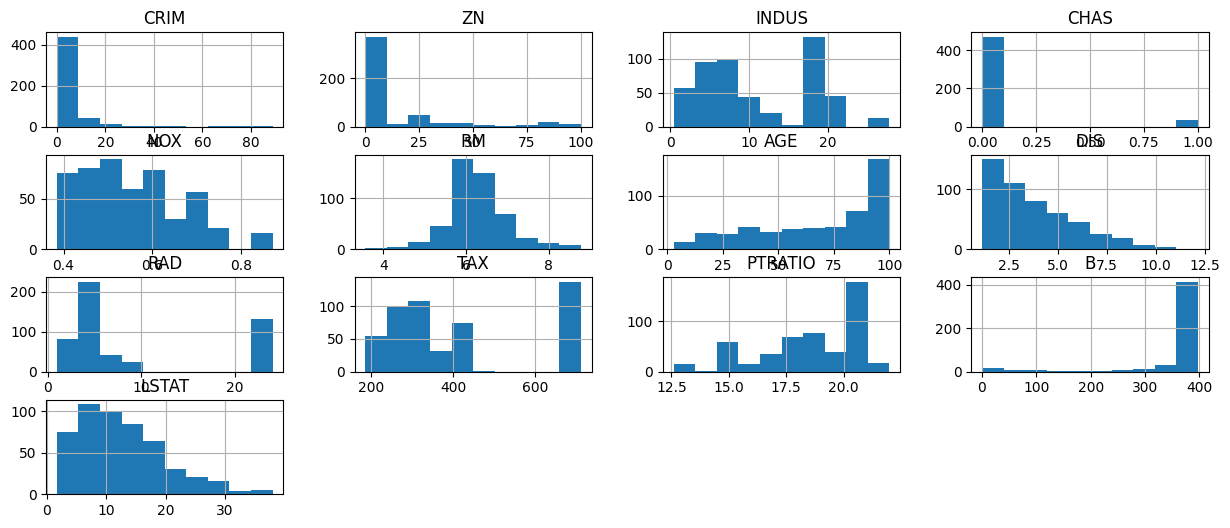

In [ ]:
X.hist()

<Axes: >

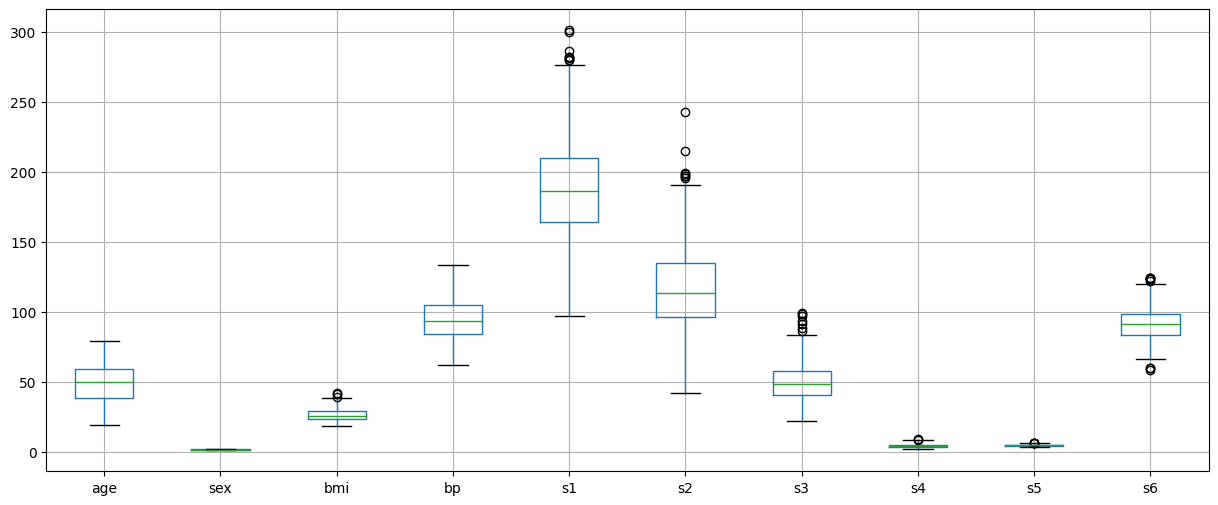

In [ ]:
X.boxplot()

<Axes: >

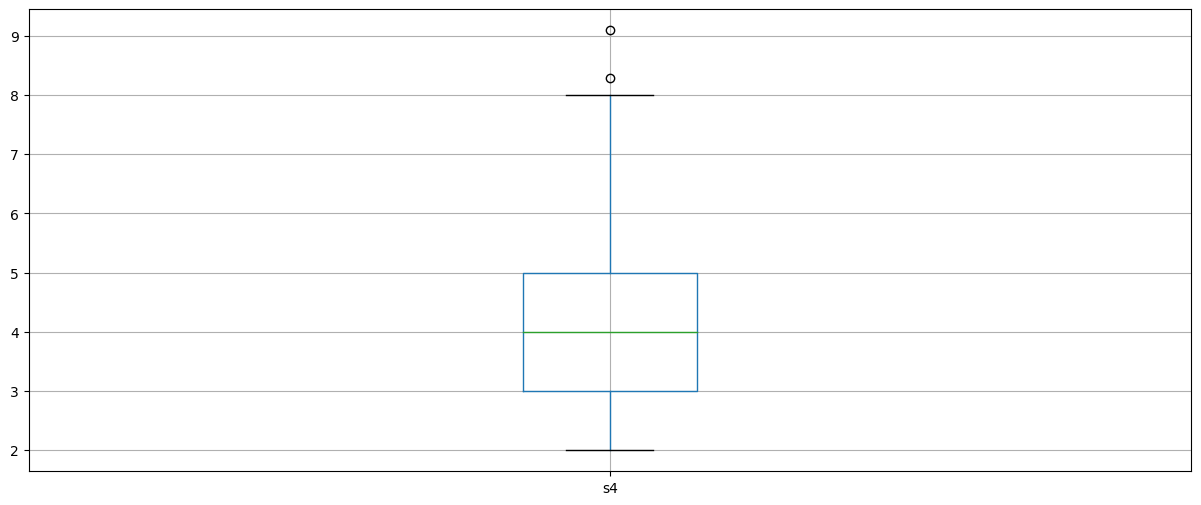

In [ ]:
X.boxplot("s4")

<Axes: >

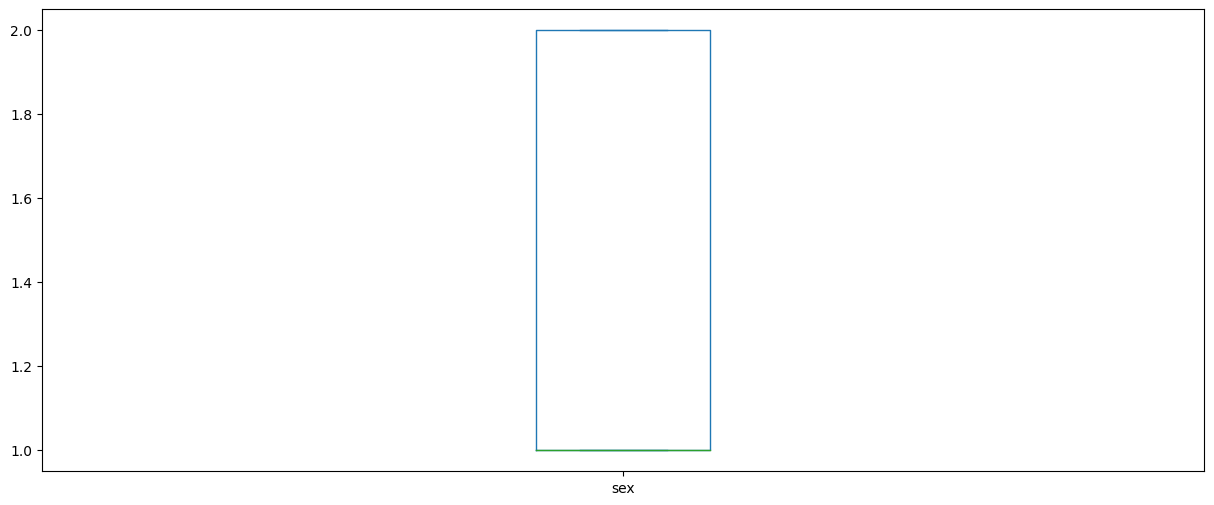

In [ ]:
X.sex.plot.box()

<Axes: xlabel='s1', ylabel='s2'>

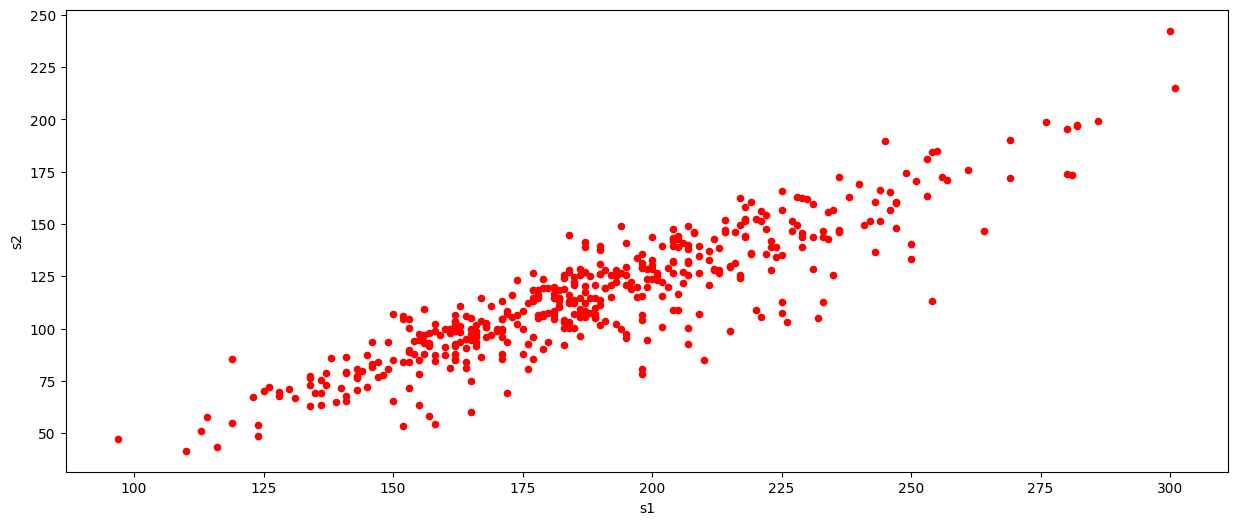

In [ ]:
X.plot.scatter(x='s1', y = 's2', color='r')

False


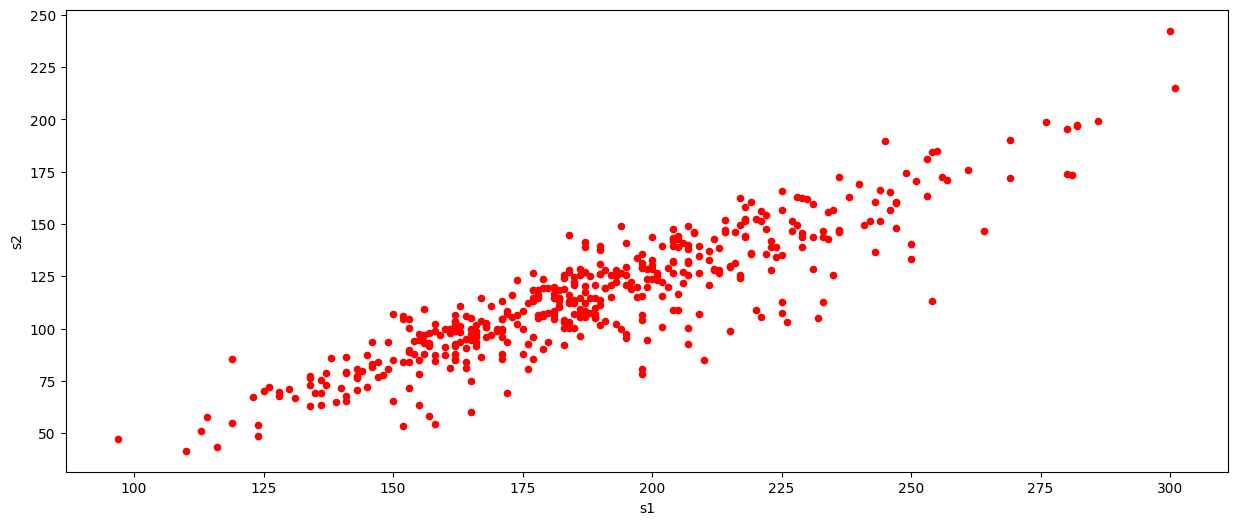

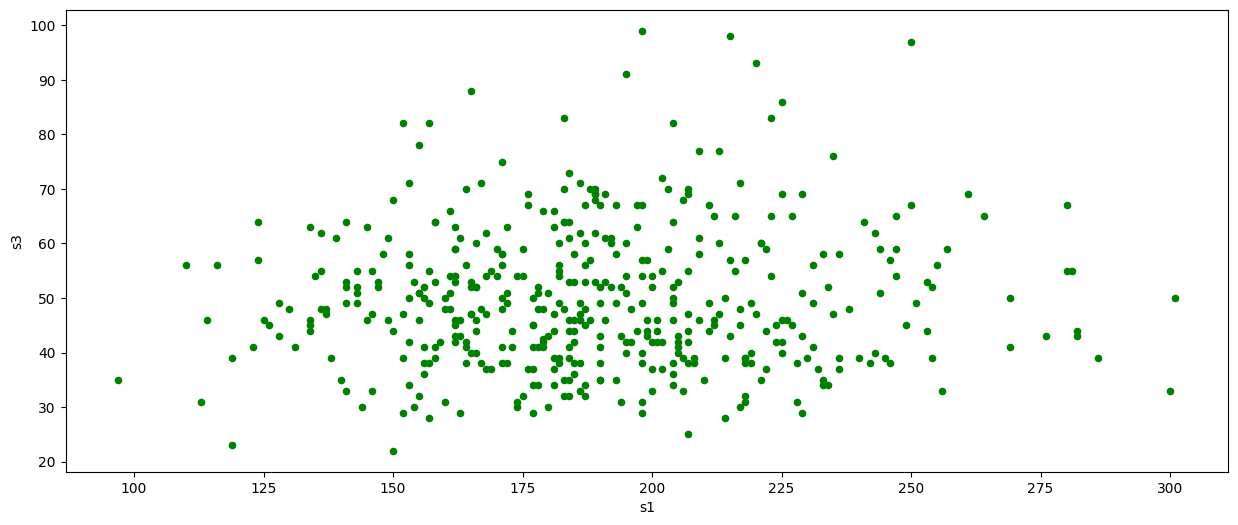

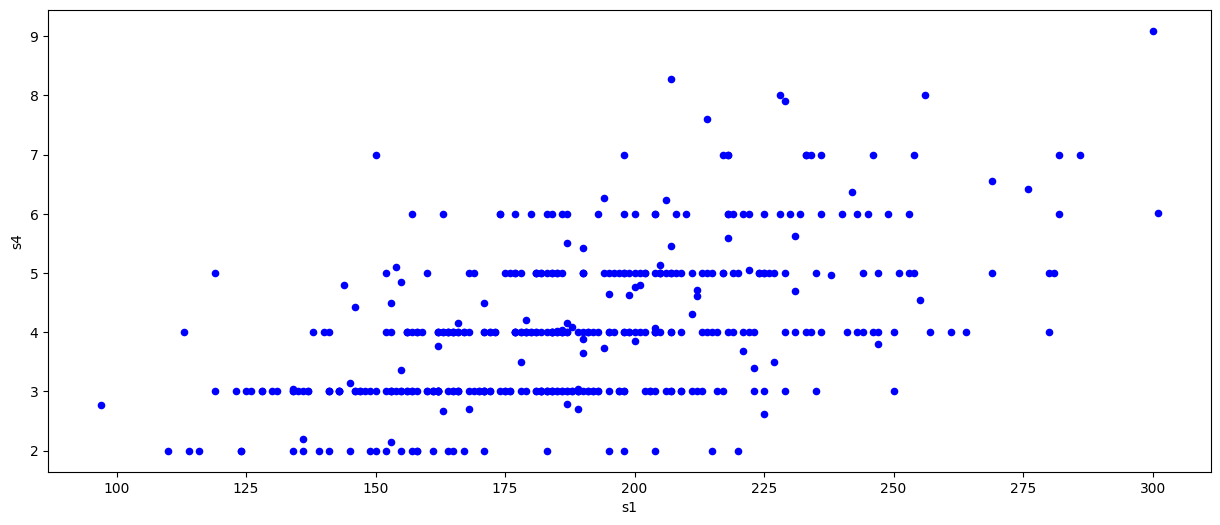

In [ ]:
ax1 = X.plot.scatter(x='s1', y = 's2', color='r')
ax2 = X.plot.scatter(x='s1', y = 's3', color='g')
ax3 = X.plot.scatter(x='s1', y = 's4', color='b')

print(ax1 == ax2 == ax3)

True


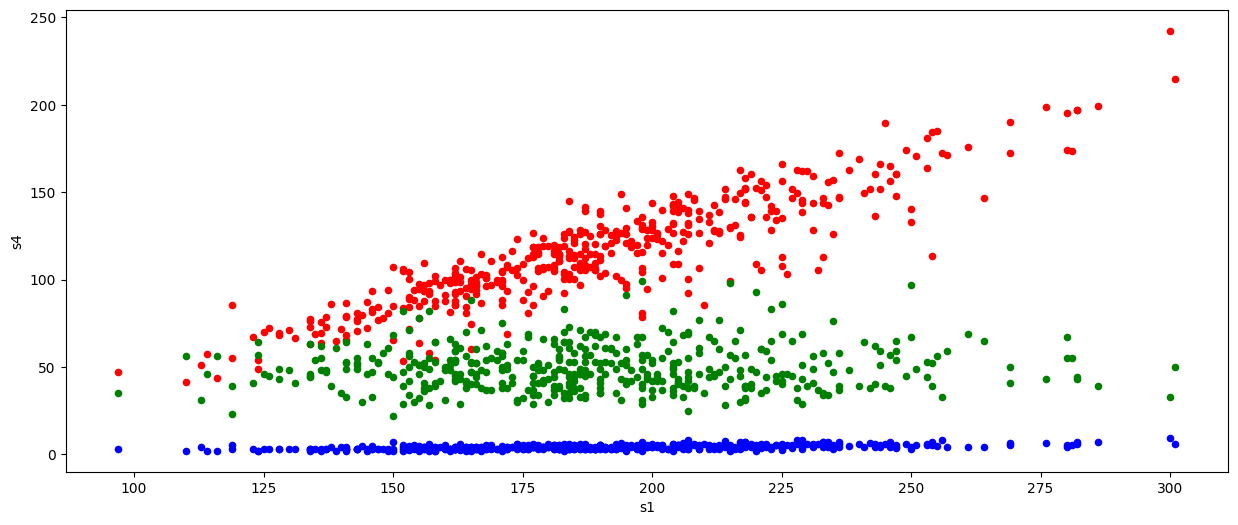

In [ ]:
ax1 = X.plot.scatter(x='s1', y = 's2', color='r')
ax2 = X.plot.scatter(x='s1', y = 's3', color='g', ax = ax1)
ax3 = X.plot.scatter(x='s1', y = 's4', color='b', ax = ax1)

print(ax1 == ax2 == ax3)

True


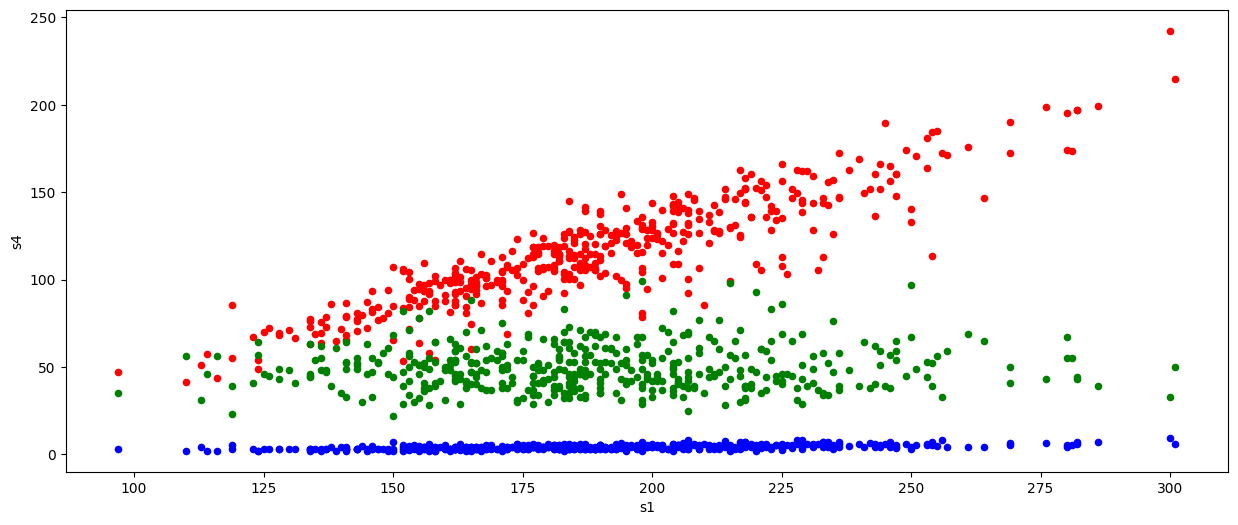

In [ ]:
ax1 = X.plot(kind='scatter', x='s1', y = 's2', color='r')
ax2 = X.plot(kind='scatter', x='s1', y = 's3', color='g', ax = ax1)
ax3 = X.plot(kind='scatter', x='s1', y = 's4', color='b', ax = ax1)

print(ax1 == ax2 == ax3)

\

\

In [ ]:
y.shape

(442,)

In [ ]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [ ]:
y.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

\

<Axes: >

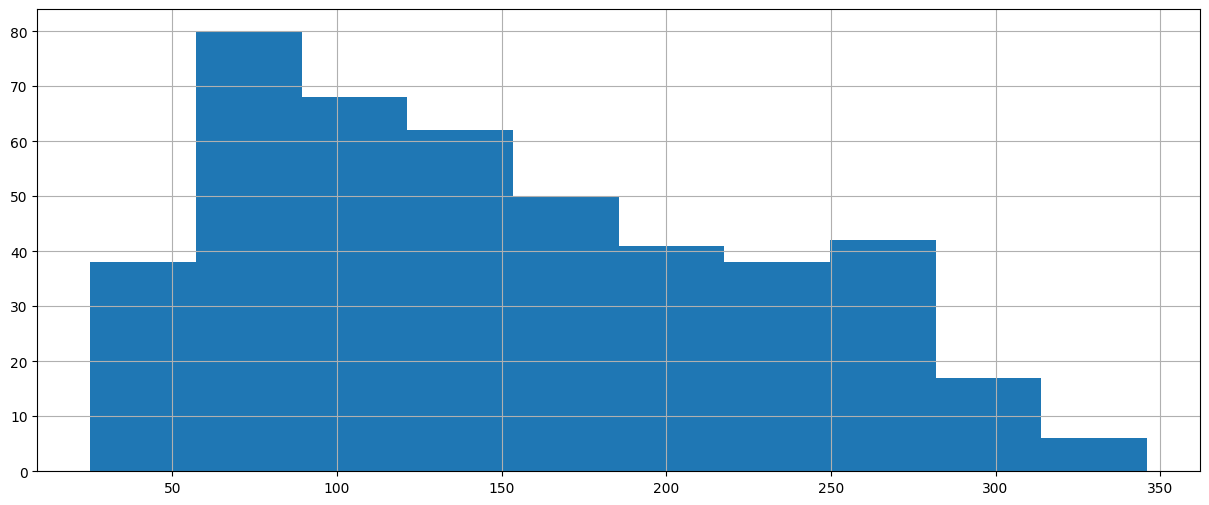

In [ ]:
y.hist()

<Axes: >

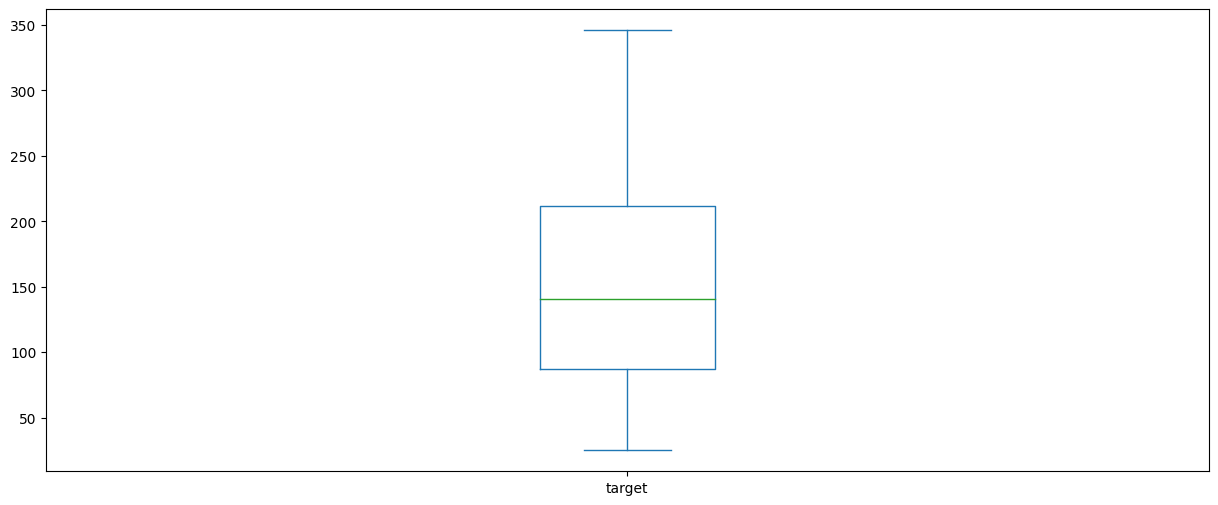

In [ ]:
y.plot.box()

<Axes: >

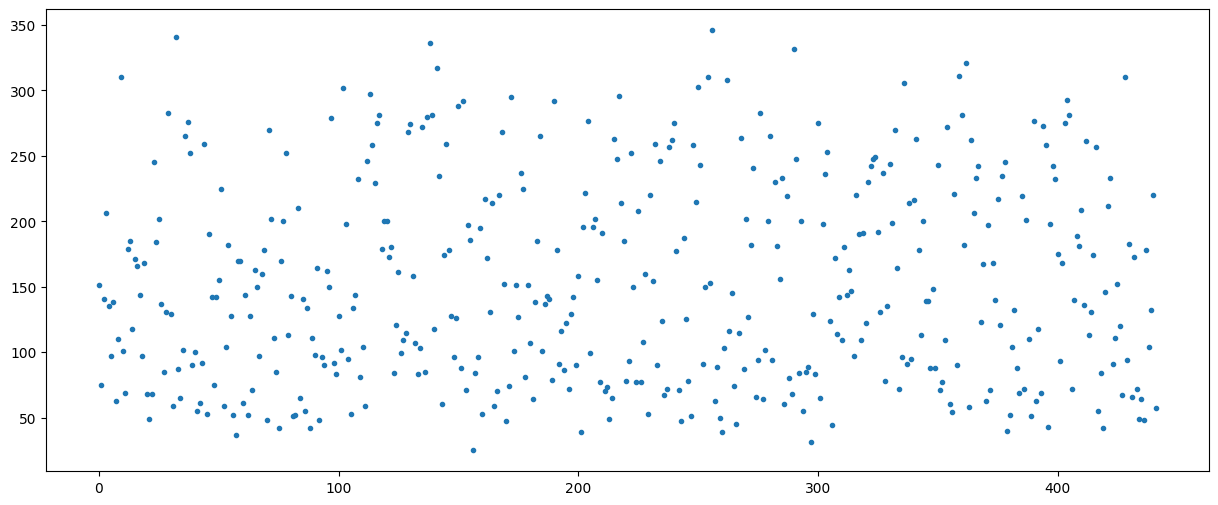

In [ ]:
y.plot(style='.')

\

\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



#dataset function (x^3 + x^2 + 5x)

In [ ]:
def geraDataset(start, step, end):
  E = int(end / step)
  S = int(start / step)
  return [ x / pow(step,-1) for x in range(S, E + 1) ]

In [ ]:
import pandas as pd
start = -5
step = .1
end   = 5
df = pd.DataFrame(data=geraDataset(start, step, end), columns=['x'])

In [ ]:
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

#  x³ + x² + 5*x
df['x1'] = df['x']**3
df['x2'] = df['x']**2
df['x3'] = (5*df['x'])
df['target'] = df['x1'] + df['x2'] + df['x3']

sc = StandardScaler()
df['xtemp'] = df['target']
df['xtemp'] = df['xtemp'] + df['x3']
df[['xtemp']] = sc.fit_transform(df[['xtemp']])


#df['xtemp'] =  df['target'] * df['xtemp']
df['x4'] = df.xtemp.apply(math.sin)
df['x4'] = df['x4']

#df['x4'] = df['x4'] + df['xtemp']


df['target_spur'] = df['x1'] + df['x2'] + df['x3'] + df['x4']


X = df.loc[:,['x1', 'x2', 'x3']]
X2 = df.loc[:,['x1', 'x2', 'x3', 'x4']]
y = df.loc[:,['target']]

In [ ]:
X.to_csv("/content/function_X.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
X2.to_csv("/content/function_X_with_noisy_feature.csv", header=True, index=False, sep=",", decimal=".")

In [ ]:
y.to_csv("/content/function_y.csv", header=True, index=False, sep=",", decimal=".")

\

In [ ]:
df.shape

(101, 8)

In [ ]:
df.sample(10)

x       x1     x2    x3   target       xtemp          x4  target_spur
44 -0.6   -0.216   0.36  -3.0   -2.856   -3.678691  100.511645    97.655645
57  0.7    0.343   0.49   3.5    4.333    4.810309   99.004790   103.337790
69  1.9    6.859   3.61   9.5   19.969   21.646435  100.337927   120.306927
90  4.0   64.000  16.00  20.0  100.000  104.173414   99.519823   199.519823
70  2.0    8.000   4.00  10.0   22.000   23.777513   99.023145   121.023145
27 -2.3  -12.167   5.29 -11.5  -18.377  -20.899774   99.112738    80.735738
10 -4.0  -64.000  16.00 -20.0  -68.000  -72.280282  100.023649    32.023649
23 -2.7  -19.683   7.29 -13.5  -25.893  -28.816152  100.515695    74.622695
29 -2.1   -9.261   4.41 -10.5  -15.351  -17.673725  100.923010    85.572010
2  -4.8 -110.592  23.04 -24.0 -111.552 -117.258913  100.852100   -10.699900

In [ ]:
df.describe()

x            x1          x2          x3      target         xtemp          x4  \
count  1.010000e+02  1.010000e+02  101.000000  101.000000  101.000000  1.010000e+02  101.000000   
mean   1.758769e-17  2.814031e-16    8.500000    0.000000    8.500000  1.758769e-17   -0.046665   
std    2.930017e+00  4.890314e+01    7.639426   14.650085   63.070093  1.004988e+00    0.626245   
min   -5.000000e+00 -1.250000e+02    0.000000  -25.000000 -125.000000 -2.067654e+00   -0.999629   
25%   -2.500000e+00 -1.562500e+01    1.690000  -12.500000  -21.875000 -5.593103e-01   -0.530602   
50%    0.000000e+00  0.000000e+00    6.250000    0.000000    0.000000 -1.108837e-01   -0.110657   
75%    2.500000e+00  1.562500e+01   14.440000   12.500000   34.375000  5.006072e-01    0.479958   
max    5.000000e+00  1.250000e+02   25.000000   25.000000  175.000000  2.498144e+00    0.999595   

       target_spur  
count   101.000000  
mean      8.453335  
std      63.650311  
min    -125.879085  
25%     -22.405602  
50%      -0.110657  
75%      34.854958  
max     175.599958

In [ ]:
df.corr()

x            x1            x2            x3    target     xtemp        x4  \
x            1.000000e+00  9.165750e-01 -3.936235e-16  1.000000e+00  0.942974  0.962153  0.985721   
x1           9.165750e-01  1.000000e+00 -1.947568e-16  9.165750e-01  0.988282  0.983381  0.893431   
x2          -3.936235e-16 -1.947568e-16  1.000000e+00 -1.015803e-16  0.121126  0.099163  0.033759   
x3           1.000000e+00  9.165750e-01 -1.015803e-16  1.000000e+00  0.942974  0.962153  0.985721   
target       9.429745e-01  9.882821e-01  1.211260e-01  9.429745e-01  1.000000  0.997995  0.925801   
xtemp        9.621534e-01  9.833813e-01  9.916279e-02  9.621534e-01  0.997995  1.000000  0.945379   
x4           9.857214e-01  8.934306e-01  3.375883e-02  9.857214e-01  0.925801  0.945379  1.000000   
target_spur  9.440769e-01  9.880636e-01  1.203540e-01  9.440769e-01  0.999993  0.998199  0.927201   

             target_spur  
x               0.944077  
x1              0.988064  
x2              0.120354  
x3              0.944077  
target          0.999993  
xtemp           0.998199  
x4              0.927201  
target_spur     1.000000

\

In [ ]:
X.shape

(101, 3)

In [ ]:
X2.shape

(101, 4)

In [ ]:
X.head(3)

x1     x2    x3
0 -125.000  25.00 -25.0
1 -117.649  24.01 -24.5
2 -110.592  23.04 -24.0

In [ ]:
X2.shape

(101, 4)

In [ ]:
y.shape

(101, 1)

In [ ]:
y.head(4)

target
0 -125.000
1 -118.139
2 -111.552
3 -105.233

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



# PoC Demonstration

\

In [ ]:
!pip install pyscinloopsr -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
df_646_fri_c3_500_10 = pd.read_csv('/content/646_fri_c3_500_10.tsv', sep='\t')
df_646_fri_c3_500_10_2 = df_646_fri_c3_500_10.iloc[:,0:10].copy()
df_646_fri_c3_500_10_2['SPUR'] = df_646_fri_c3_500_10.oz5 + df_646_fri_c3_500_10.oz6
df_646_fri_c3_500_10_2['target'] = df_646_fri_c3_500_10.target
X =  df_646_fri_c3_500_10_2.iloc[:,0:10].copy()
X2 = df_646_fri_c3_500_10_2.iloc[:,0:11].copy()
y =  df_646_fri_c3_500_10_2.iloc[:,11:12].copy()

\

\

## regressors

In [ ]:
from pyscinloopsr import before

<Figure size 4000x2000 with 0 Axes>

In [ ]:
a = before.regressors()

In [ ]:
print(a.runBasicRegressors(X, y))



Processing time of  SVR :  0:00:00.046659
Processing time of  SVR :  0:00:00.039463
Processing time of  SVR :  0:00:00.032922
Processing time of  SVR :  0:00:00.043233
Processing time of  SVR :  0:00:00.050547
Processing time of  SVR :  0:00:00.128098
Processing time of  SVR :  0:00:00.087270
Processing time of  SVR :  0:00:00.083719
Processing time of  SVR :  0:00:00.553387
Processing time of  SVR :  0:00:00.493556
Processing time of  SVR :  0:00:00.315455
Processing time of  SVR :  0:00:00.444046
Processing time of  SVR :  0:00:00.039426
Processing time of  SVR :  0:00:00.054650
Processing time of  SVR :  0:00:00.050765
Processing time of  SVR :  0:00:00.067172
Processing time of  SVR :  0:00:00.066028
Processing time of  SVR :  0:00:00.083649
Processing time of  SVR :  0:00:00.033982
Processing time of  SVR :  0:00:00.054020
Processing time of  SVR :  0:00:00.119291
Processing time of  SVR :  0:00:00.093991
Processing time of  SVR :  0:00:00.029168
Processing time of  SVR :  0:00:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.651047
Processing time of  MLPRegressor :  0:00:00.880056
Processing time of  MLPRegressor :  0:00:00.241685


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.481216


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.177066


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.912382


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:02.780472
Processing time of  MLPRegressor :  0:00:01.836288


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.684535


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.593070


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.897089


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.218277
Processing time of  MLPRegressor :  0:00:01.321945
Processing time of  SGDRegressor :  0:00:00.015802
Processing time of  SGDRegressor :  0:00:00.013067
Processing time of  SGDRegressor :  0:00:00.012096
Processing time of  RandomForestRegressor :  0:00:00.073246
Processing time of  RandomForestRegressor :  0:00:00.274480
Processing time of  RandomForestRegressor :  0:00:00.368244
Processing time of  RandomForestRegressor :  0:00:00.469847
Processing time of  RandomForestRegressor :  0:00:00.610728
Processing time of  RandomForestRegressor :  0:00:00.946432
Processing time of  RandomForestRegressor :  0:00:01.200565
Processing time of  RandomForestRegressor :  0:00:01.880109
Processing time of  RandomForestRegressor :  0:00:03.566242
Processing time of  RandomForestRegressor :  0:00:02.977626
Processing time of  RandomForestRegressor :  0:00:03.723097
Processing time of  RandomForestRegressor :  0:00:04.465051
Processing time of  Rando

\

In [ ]:
print(tableReturned)

+---------------------------+------+-------+-------+----------------+
|           Model           | MSE  | SCORE |   R2  |  TrainingTime  |
+---------------------------+------+-------+-------+----------------+
|            SVR            | 0.64 |  0.23 |  0.23 | 0:00:00.046659 |
|            SVR            | 0.64 |  0.23 |  0.23 | 0:00:00.039463 |
|            SVR            | 0.64 |  0.23 |  0.23 | 0:00:00.032922 |
|            SVR            | 0.64 |  0.23 |  0.23 | 0:00:00.043233 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.050547 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.128098 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.087270 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.083719 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.553387 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.493556 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.315455 |
|            SVR    

\

In [ ]:
dropList = ["oz1", "oz2"]
tableReturned = a.runBasicRegressors(X, y, dropList)


dropping:  oz1

dropping:  oz2


Processing time of  SVR :  0:00:00.025383
Processing time of  SVR :  0:00:00.024672
Processing time of  SVR :  0:00:00.026417
Processing time of  SVR :  0:00:00.024565
Processing time of  SVR :  0:00:00.034659
Processing time of  SVR :  0:00:00.038590
Processing time of  SVR :  0:00:00.037227
Processing time of  SVR :  0:00:00.035341
Processing time of  SVR :  0:00:00.138072
Processing time of  SVR :  0:00:00.131645
Processing time of  SVR :  0:00:00.135651
Processing time of  SVR :  0:00:00.130284
Processing time of  SVR :  0:00:00.022376
Processing time of  SVR :  0:00:00.024011
Processing time of  SVR :  0:00:00.022516
Processing time of  SVR :  0:00:00.026291
Processing time of  SVR :  0:00:00.026978
Processing time of  SVR :  0:00:00.026684
Processing time of  SVR :  0:00:00.039602
Processing time of  SVR :  0:00:00.035507
Processing time of  SVR :  0:00:00.051994
Processing time of  SVR :  0:00:00.054812
Processing time of  SVR :  0:00:00.032255


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.450501


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.027762
Processing time of  MLPRegressor :  0:00:00.309324


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.520960


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.961229


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:01.949869


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:03.236397
Processing time of  MLPRegressor :  0:00:01.841876


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.567932


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.289632


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.593807


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Processing time of  MLPRegressor :  0:00:00.922016
Processing time of  MLPRegressor :  0:00:01.803971
Processing time of  SGDRegressor :  0:00:00.013229
Processing time of  SGDRegressor :  0:00:00.011924
Processing time of  SGDRegressor :  0:00:00.012878
Processing time of  RandomForestRegressor :  0:00:00.075151
Processing time of  RandomForestRegressor :  0:00:00.236249
Processing time of  RandomForestRegressor :  0:00:00.322778
Processing time of  RandomForestRegressor :  0:00:00.432402
Processing time of  RandomForestRegressor :  0:00:00.519879
Processing time of  RandomForestRegressor :  0:00:00.815248
Processing time of  RandomForestRegressor :  0:00:01.072362
Processing time of  RandomForestRegressor :  0:00:02.114265
Processing time of  RandomForestRegressor :  0:00:02.854125
Processing time of  RandomForestRegressor :  0:00:02.604599
Processing time of  RandomForestRegressor :  0:00:03.211877
Processing time of  RandomForestRegressor :  0:00:03.964301
Processing time of  Rando

In [ ]:
print(tableReturned)

+---------------------------+------+-------+-------+----------------+
|           Model           | MSE  | SCORE |   R2  |  TrainingTime  |
+---------------------------+------+-------+-------+----------------+
|            SVR            | 0.66 |  0.21 |  0.21 | 0:00:00.025383 |
|            SVR            | 0.66 |  0.21 |  0.21 | 0:00:00.024672 |
|            SVR            | 0.66 |  0.21 |  0.21 | 0:00:00.026417 |
|            SVR            | 0.66 |  0.21 |  0.21 | 0:00:00.024565 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.034659 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.038590 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.037227 |
|            SVR            | 0.67 |  0.20 |  0.20 | 0:00:00.035341 |
|            SVR            | 0.67 |  0.19 |  0.19 | 0:00:00.138072 |
|            SVR            | 0.67 |  0.19 |  0.19 | 0:00:00.131645 |
|            SVR            | 0.67 |  0.19 |  0.19 | 0:00:00.135651 |
|            SVR    

\

##view

In [ ]:
from pyscinloopsr import before, sr

a = before.view(X)

[juliapkg] Locating Julia ~1.6.7, ~1.7, ~1.8, ~1.9, =1.10.0
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.0 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to have Julia
[juliapkg]   installed in multiple locations. It is recommended to install JuliaUp
[juliapkg]   (https://github.com/JuliaLang/juliaup) or Julia (https://julialang.org/downloads)
[juliapkg]   yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.0-linux-x86_64.tar.gz
             downloaded 98.5 MB of 160.8 MB
             download complete
[juliapkg] Verifying download
[juliapkg] Installing Julia 1.10.0 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install
[juliapkg] Using Julia 1.10.0 at /root/.julia/environments/pyjuliapkg/pyjuliapkg/install/bin/julia
[juliapkg] Using Julia pr

NameError: name 'X' is not defined

<Figure size 1500x1000 with 0 Axes>

In [ ]:
help(before)

Help on module pyscinloopsr.before in pyscinloopsr:

NAME
    pyscinloopsr.before - Module `before` for pre-analysis

CLASSES
    builtins.object
        regressors
        view
    
    class regressors(builtins.object)
     |  Class with a list of simplified call to a list of Regressors to build a reference on performance
     |  
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  runBasicRegressors(self, dfxbr, dfybr, featuresDrop=None)
     |      Method to fit the regressors
     |      
     |      Args: predictors DataFrame, target DataFrame, optional list of features names to drop
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
     |      list of weak references to the object (if define

In [ ]:
help(sr)

\

\

\

\

\

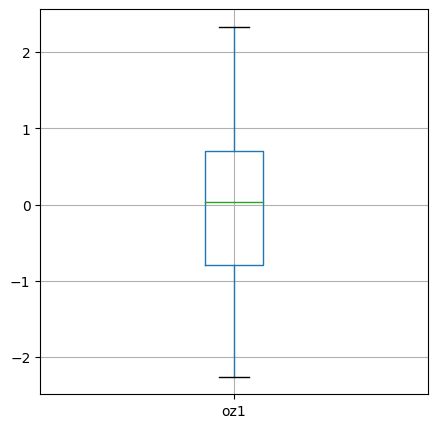

In [ ]:
from pyscinloopsr import before
a = before.view(X)
a.box("oz1")

<Figure size 500x500 with 0 Axes>

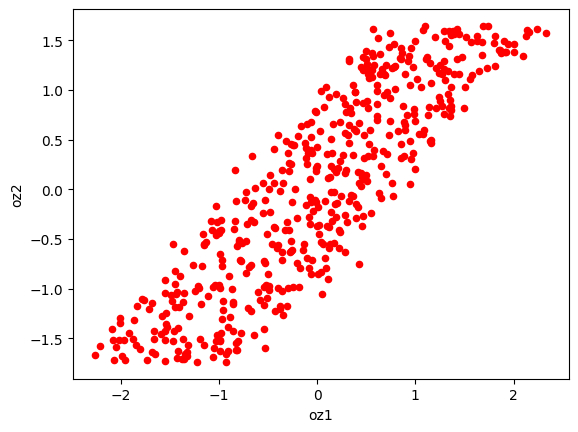

In [ ]:
a.scatter("oz1", "oz2")

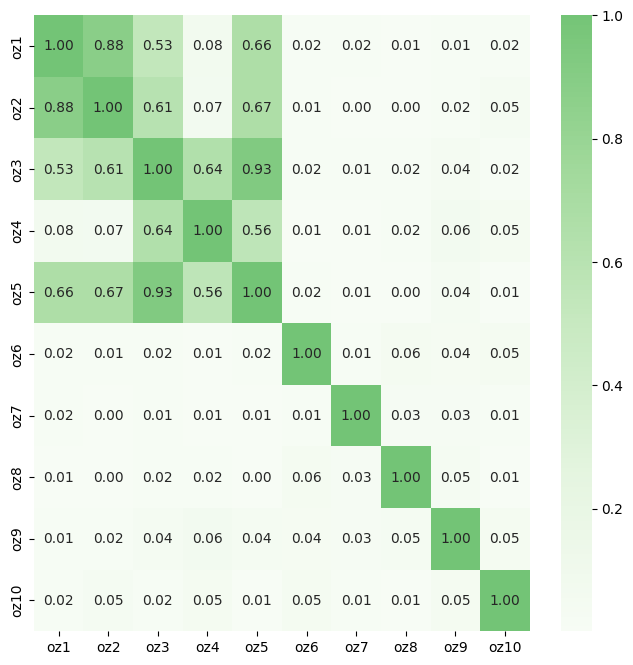

In [ ]:
a.correlation()

\

\

##SR

In [ ]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.5 MB/s eta 0:00:00


In [ ]:
        from pysr import PySRRegressor

        #seed = 42
        modelSR = PySRRegressor(
			    turbo=True,
          procs=16,
          #random_state=seed,
          niterations=60,
          population_size=100,
          populations=30,
			    binary_operators=["+", "*", "-", "/", "max"],
          unary_operators=["exp", "sin", "square", "cos", "log"],
			    # ^ Define operator for SymPy as well
			    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
			    # ^ Custom loss function (julia syntax)
  		  )

[juliapkg] Locating Julia ~1.6.7, ~1.7, ~1.8, ~1.9, =1.10.0
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.10.0 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to have Julia
[juliapkg]   installed in multiple locations. It is recommended to install JuliaUp
[juliapkg]   (https://github.com/JuliaLang/juliaup) or Julia (https://julialang.org/downloads)
[juliapkg]   yourself.
[juliapkg] Downloading Julia from https://julialang-s3.julialang.org/bin/linux/x64/1.10/julia-1.10.0-linux-x86_64.tar.gz
             download complete
[juliapkg] Verifying download
[juliapkg] Installing Julia 1.10.0 to /root/.julia/environments/pyjuliapkg/pyjuliapkg/install
[juliapkg] Using Julia 1.10.0 at /root/.julia/environments/pyjuliapkg/pyjuliapkg/install/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapk

\

\

\

In [ ]:
from pyscinloopsr import sr

a = sr.pysr(modelSR)

<Figure size 1500x1000 with 0 Axes>

\

\

\

In [ ]:
a.runPySR(X, y)

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1889: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.730e+04
Head worker occupation: 50.8%. This is high, and will prevent efficient resource usage. Increase `ncycles_per_iteration` to reduce load on head worker.
Progress: 16 / 1800 total iterations (0.889%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           8.632e-01  7.971e+00  y = sin(oz4)
3           7.773e-01  1.048e-01  y = oz4 * 0.41479
4           7.739e-01  4.421e-03  y = cos(1.0679) * oz4
5           7.739e-01  2.104e-05  y = sin(square(0.69709)) * oz4
6           7.325e-01  5.490e-02  y = sin(oz1 + -1.3801) * oz2
7           6.637e-01  9.860e-02  y = sin(oz4 + sin(-0.7222 / oz2))
8           6.253e-01  5.962e-02  y = sin(sin(oz4) + sin(-0.7222 / oz2))
9           5.773e-01  7.999e-02  y = (oz2 * ((oz5 * oz2) + -1.3801)) / 1.3132
10          4.583e-01  2.307e-01  y = (sin(oz2) * ((oz5 * oz2) + -1.3801)) / 1.3132
11          4.

\

In [ ]:
a.model.equations_

complexity      loss     score  \
0            1  0.998000  0.000000   
1            2  0.863163  0.145149   
2            3  0.773821  0.109263   
3            4  0.650798  0.173142   
4            5  0.646379  0.006812   
5            6  0.471486  0.315497   
6            7  0.453429  0.039051   
7            8  0.324073  0.335869   
8            9  0.322547  0.004721   
9           10  0.243217  0.282294   
10          12  0.216074  0.059167   
11          13  0.198916  0.082737   
12          14  0.168597  0.165375   
13          15  0.141123  0.177878   
14          16  0.135858  0.038018   
15          17  0.123442  0.095839   
16          18  0.114941  0.071352   
17          19  0.110130  0.042764   
18          20  0.105612  0.041888   

                                             equation  \
0                                        -1.613109e-6   
1                                            sin(oz4)   
2                                      oz4 * 0.473934   
3                               sin(oz2 * -2.3628166)   
4                          sin(sin(oz2 * -2.3782563))   
5                       sin(-1.2747446 * (oz2 + oz1))   
6                           sin(oz4) - sin(oz1 + oz2)   
7                  (oz5 * 0.5564835) - sin(oz1 + oz2)   
8             sin(oz4) - sin(oz1 + (oz2 * 1.4652544))   
9   sin((oz2 * -1.4755094) - oz1) - (oz4 * -0.4856...   
10  sin((-1.510756 * oz2) - oz1) + (oz4 / (2.60460...   
11  (log(max(1.6532311, oz5)) * oz4) + sin((-1.388...   
12  ((oz4 / 2.585153) - sin(oz2 + ((oz2 + 0.440144...   
13  ((oz4 / 2.4180083) - sin(oz1 + (oz2 / 0.660319...   
14  exp(sin(oz1) * 0.5810815) * ((oz4 / 2.444246) ...   
15  ((oz4 / 2.4794316) - sin(((oz2 + -0.13646396) ...   
16  exp(oz2 * 0.3798771) * ((oz4 / 2.4873786) - si...   
17  ((oz4 / 2.4873786) - sin((oz2 + sin(sin(oz2 - ...   
18  ((oz4 / 2.4873786) - sin((oz2 + sin(sin(oz2 - ...   

                                         sympy_format  \
0                                -1.61310900000000e-6   
1                                            sin(oz4)   
2                                        0.473934*oz4   
3                                 -sin(2.3628166*oz2)   
4                            -sin(sin(2.3782563*oz2))   
5                 -sin(1.2747446*oz1 + 1.2747446*oz2)   
6                           sin(oz4) - sin(oz1 + oz2)   
7                      0.5564835*oz5 - sin(oz1 + oz2)   
8                 sin(oz4) - sin(oz1 + 1.4652544*oz2)   
9           0.48566115*oz4 - sin(oz1 + 1.4755094*oz2)   
10     oz4/(2.604602 - oz2) - sin(oz1 + 1.510756*oz2)   
11  oz4*log(Piecewise((oz5, oz5 > 1.6532311), (1.6...   
12  0.520175827117389*oz4 - 1.3447341*sin(oz1*(oz2...   
13  (0.413563510100441*oz4 - sin(oz1 + 1.514418857...   
14  (0.409124122531038*oz4 - sin(oz1 + 1.519103624...   
15  (0.403318244391174*oz4 - sin(oz1 + 1.662467965...   
16  (0.402029670915397*oz4 - sin(oz1 + oz2 + sin(o...   
17  (0.402029670915397*oz4 - sin(oz1 + oz2 + sin(s...   
18  (0.402029670915397*oz4 - sin(oz1 + oz2 + sin(s...   

                                        lambda_format  
0            PySRFunction(X=>-0.00000161310900000000)  
1                           PySRFunction(X=>sin(oz4))  
2                       PySRFunction(X=>0.473934*oz4)  
3                PySRFunction(X=>-sin(2.3628166*oz2))  
4           PySRFunction(X=>-sin(sin(2.3782563*oz2)))  
5   PySRFunction(X=>-sin(1.2747446*oz1 + 1.2747446...  
6          PySRFunction(X=>sin(oz4) - sin(oz1 + oz2))  
7     PySRFunction(X=>0.5564835*oz5 - sin(oz1 + oz2))  
8   PySRFunction(X=>sin(oz4) - sin(oz1 + 1.4652544...  
9   PySRFunction(X=>0.48566115*oz4 - sin(oz1 + 1.4...  
10  PySRFunction(X=>oz4/(2.604602 - oz2) - sin(oz1...  
11  PySRFunction(X=>oz4*log(Piecewise((oz5, oz5 > ...  
12  PySRFunction(X=>0.520175827117389*oz4 - 1.3447...  
13  PySRFunction(X=>(0.413563510100441*oz4 - sin(o...  
14  PySRFunction(X=>(0.409124122531038*oz4 - sin(o...  
15  PySRFunction(X=>(0.403318244391174*oz4 - sin(o...  
16  PySRF

In [ ]:
print(a.model)

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                       -1.613109e-6   
	1         0.145149                                           sin(oz4)   
	2         0.109263                                     oz4 * 0.473934   
	3         0.173142                              sin(oz2 * -2.3628166)   
	4         0.006812                         sin(sin(oz2 * -2.3782563))   
	5         0.315497                      sin(-1.2747446 * (oz2 + oz1))   
	6         0.039051                          sin(oz4) - sin(oz1 + oz2)   
	7         0.335869                 (oz5 * 0.5564835) - sin(oz1 + oz2)   
	8         0.004721            sin(oz4) - sin(oz1 + (oz2 * 1.4652544))   
	9         0.282294  sin((oz2 * -1.4755094) - oz1) - (oz4 * -0.4856...   
	10        0.059167  sin((-1.510756 * oz2) - oz1) + (oz4 / (2.60460...   
	11        0.082737  (log(max(1.6532311, oz5)) * oz4) + sin((-1.388...   
	12      

\

In [ ]:
a.model.score(X, y)

0.8585943143300201

\

In [ ]:
a.model.model_selection = "accuracy"

In [ ]:
a.model.score(X, y)

0.8941766324893856

In [ ]:
a.model.sympy()

(0.402029670915397*oz4 - sin(oz1 + oz2 + sin(sin(oz2 - 0.45663536))))*exp(0.57921124*sin(oz1))

\

\

In [ ]:
a.exportModel("/content/")

\

In [ ]:
import joblib
modelPysr = joblib.load('/content/20240427034323.joblib')

\

\

In [ ]:
X = X2.copy()

a.runPySR(X, y, ["SPUR"])


dropping:  SPUR
Compiling Julia backend...


/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1889: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. You should run PySR for more `niterations` to ensure it can find the correct variables, or, alternatively, do a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed SIMDTypes ──────────────────────── v0.1.0
   Installed CpuId ──────────────────────────── v0.3.1
   Installed LayoutPo


Expressions evaluated per second: 1.490e+04
Head worker occupation: 21.2%
Progress: 9 / 1800 total iterations (0.500%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
2           8.632e-01  7.971e+00  y = sin(oz4)
3           8.306e-01  3.841e-02  y = sin(sin(oz4))
4           7.158e-01  1.488e-01  y = sin(oz2 / -0.36873)
5           6.965e-01  2.728e-02  y = sin(sin(oz2 / -0.36873))
6           6.834e-01  1.906e-02  y = sin((oz2 / -0.36873) + 0.29682)
7           6.511e-01  4.841e-02  y = sin(sin(oz1 + oz2) * -0.71645)
9           4.810e-01  1.514e-01  y = sin(sin(oz2 + (oz1 / 0.60884)) * -1.302)
11          4.743e-01  6.991e-03  y = sin(sin(sin(oz4)) + (sin(oz2 + oz1) * -0.71645))
12          3.834e-01  2.129e-01  y = sin(sin(oz4) + (sin(oz2 + (oz1 / 0.60884)) / -0.96584))
13          3.669e-01  4.397e-02  y = sin(sin(sin(oz4)) + (-0.96584 * sin(oz2 + (oz1 / 0.60884))...
     

\

In [ ]:
a.exportModel("/content/")

\

\

In [ ]:
a.score()

0.8585943669008081


In [ ]:
a.printEquationFormats()

equation:
 (sin((-1.5145022 * oz2) - oz1) + (oz4 * 0.41337493)) / exp(-0.38008907 * oz2) 

latex:
 \left(0.413 oz_{4} - \sin{\left(oz_{1} + 1.51 oz_{2} \right)}\right) e^{0.380 oz_{2}} 

sympy:
 (0.41337493*oz4 - sin(oz1 + 1.5145022*oz2))*exp(0.38008907*oz2) 



In [ ]:
a.setModelToAccuracy()

In [ ]:
a.score()

0.8918621582997264


In [ ]:
a.printEquationFormats()

equation:
 0.11464141 + ((sin(((-1.6060766 * oz2) + 0.21163966) - oz1) + (oz4 * 0.39292902)) / exp(sin(oz1) * -0.6307073)) 

latex:
 \left(0.393 oz_{4} - \sin{\left(oz_{1} + 1.61 oz_{2} - 0.212 \right)}\right) e^{0.631 \sin{\left(oz_{1} \right)}} + 0.115 

sympy:
 (0.39292902*oz4 - sin(oz1 + 1.6060766*oz2 - 0.21163966))*exp(0.6307073*sin(oz1)) + 0.11464141 



In [ ]:
a.setModelToBest()

\

\

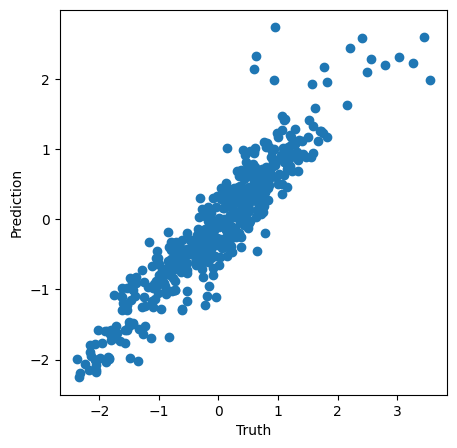

In [ ]:
a.compare()

<Figure size 800x800 with 0 Axes>

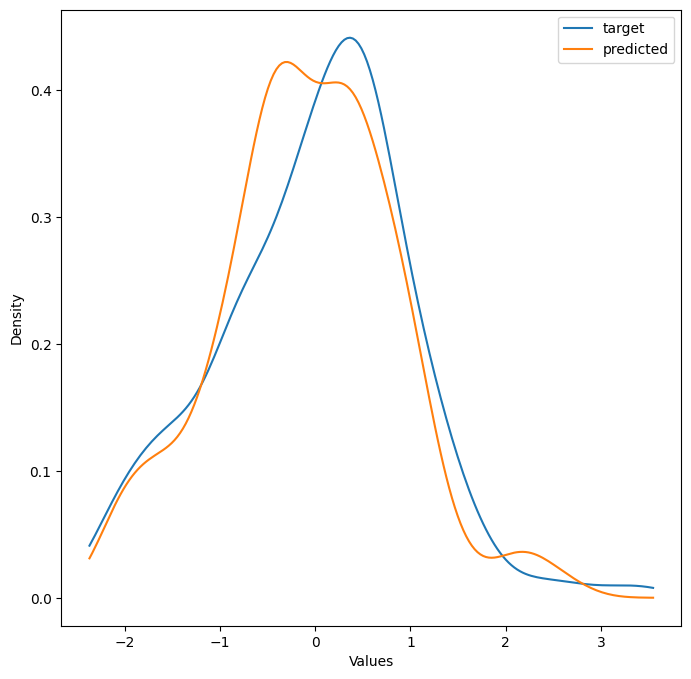

In [ ]:
a.compareKde()

\

\

\

In [ ]:
a.dfxn.head(1)

oz1       oz2      oz3      oz4       oz5       oz6      oz7      oz8  \
0  0.679684  0.952877 -0.77519 -1.73306 -0.646589  0.034433  1.04178 -0.95916   

        oz9      oz10  
0  1.428423 -1.138218

In [ ]:
a.model.predict(np.array([0.679684,	0.952877,	-0.77519,	-1.73306,	-0.646589,	0.034433,	1.04178,	-0.95916,	1.428423,	-1.138218]).reshape(1, -1))

array([-2.25217362])

In [ ]:
a.model.predict(np.array(a.dfxn.iloc[0,:]).reshape(1, -1))

array([-2.25217317])

\

\

In [ ]:
a.predictCase([0.679684,	0.952877,	-0.77519,	-1.73306,	-0.646589,	0.034433,	1.04178,	-0.95916,	1.428423,	-1.138218])

[-2.25217362]


In [ ]:
a.predictCase([0.67,	0.95,	-0.77,	-1.7,	-0.6,	0.03,	1.04,	-0.95,	1.42,	-1.13])

[-2.24054758]


In [ ]:
a.predictCase([1.67,	0.9,	-0.77,	-1.7,	-0.6,	0.03,	1.04,	-0.91,	1.42,	-0.91])

[-1.14187672]


\

\

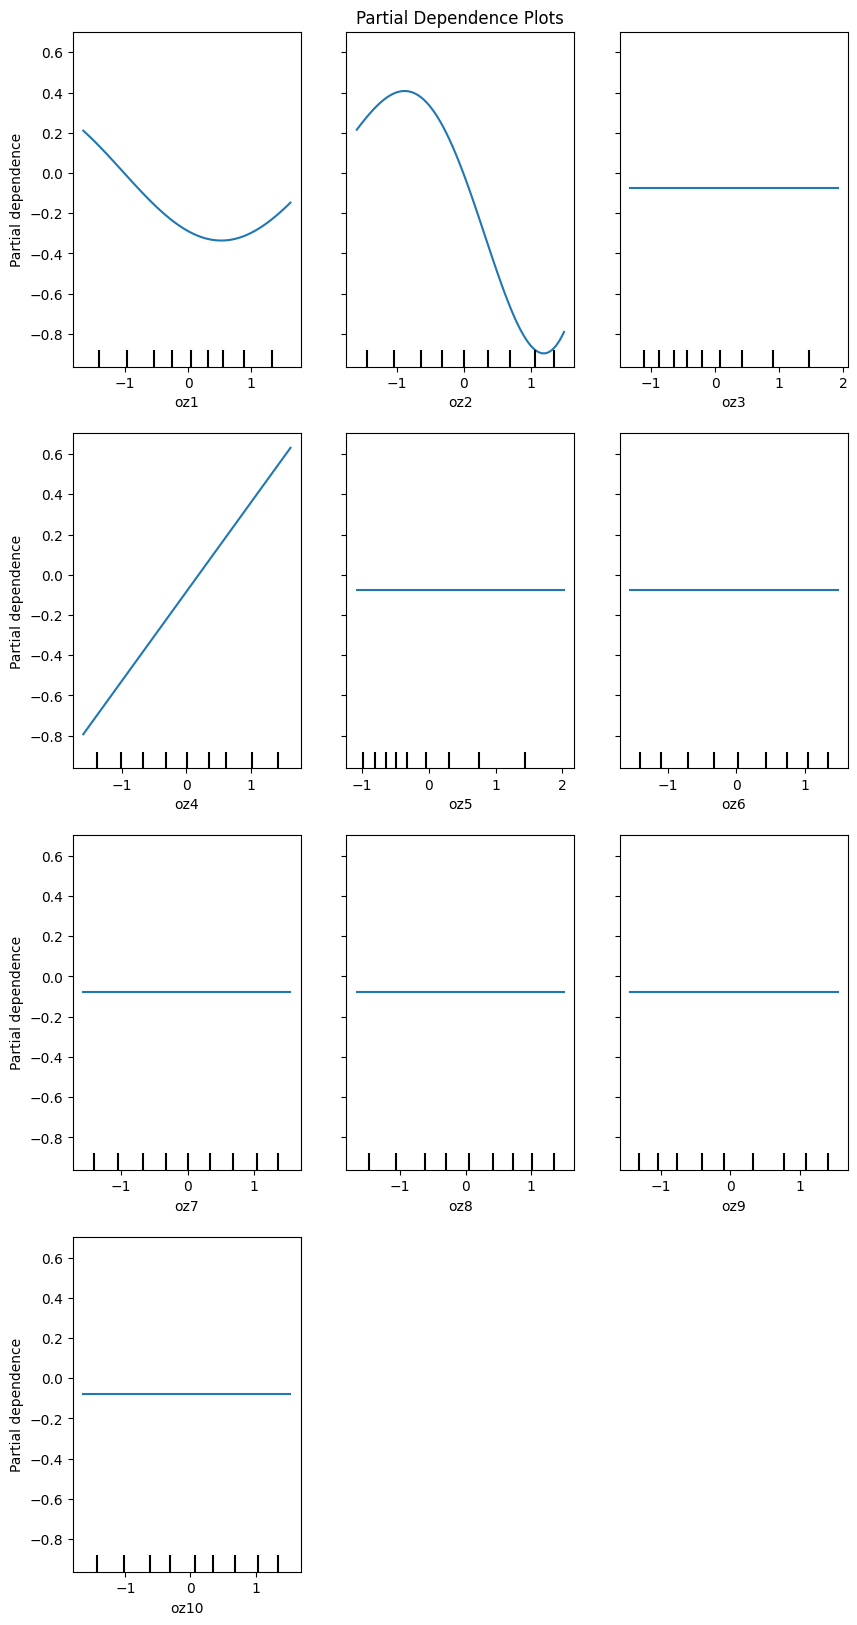

In [ ]:
a.pdp()

\

\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



# inner 4-fold grid search of Random Forest optimization within an outer 5-fold cross-validation loop [BOSTON]

## Outer CV Inner CV and Scaling

\

### RF Boston (X)

In [ ]:
# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()

# Outer cross-validation loop
#for train_index, test_index in outer_cv.split(X):
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)

for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)

# Calculate mean accuracy across outer folds for ALL
#mean_accuracy_ALL = np.mean(outer_cv_scores)
#print("\n\n\n\nmean_accuracy_ALL: ", mean_accuracy_ALL, "\n\n")

# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")




\

In [ ]:
outer_cv_scores

array([[0.86040021, 0.86023682],
       [0.87040846, 0.87036348],
       [0.87664165, 0.87658283],
       [0.90470512, 0.90506409],
       [0.83048391, 0.83046645]])

In [ ]:
outer_cv_scores_train

array([[0.97665061, 0.97663183],
       [0.9758286 , 0.97580371],
       [0.97850637, 0.97850535],
       [0.97675935, 0.97676826],
       [0.9799364 , 0.97993927]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.8685353031015373

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9775329750045426

\

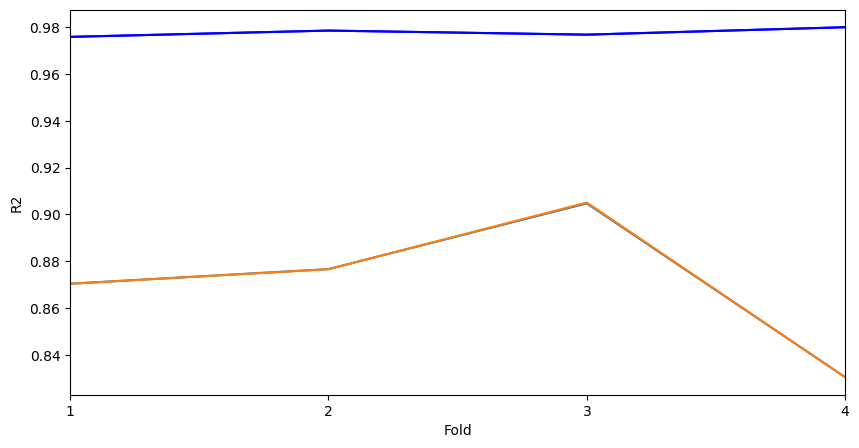

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 13 Features using RandomForestRegressor'}, xlabel='feature importance'>

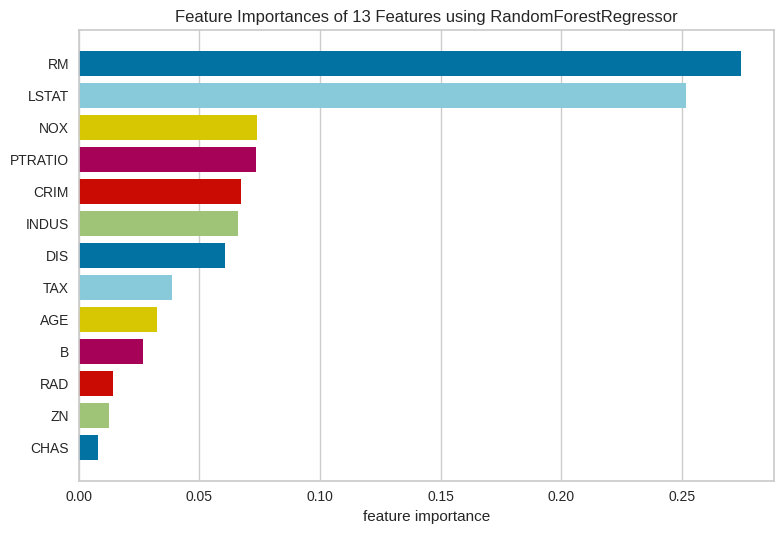

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0      24.0  25.363650
1      21.6  22.548764
2      34.7  34.589226
3      33.4  34.274939
4      36.2  34.859165
5      28.7  27.850679
6      22.9  21.491259
7      27.1  22.721210
8      16.5  17.433475
9      18.9  19.227400
10     15.0  18.005400
11     18.9  20.098979
12     21.7  21.233153
13     20.4  20.236609
14     18.2  18.942255
15     19.9  20.209678
16     23.1  21.879672
17     17.5  17.988122
18     20.2  19.251171
19     18.2  19.202565
20     13.6  14.169858
21     19.6  18.775766
22     15.2  15.973201
23     14.5  15.024323
24     15.6  16.379250
25     13.9  14.983182
26     16.6  17.177135
27     14.8  15.129568
28     18.4  18.878445
29     21.0  20.499386
30     12.7  13.747741
31     14.5  16.480634
32     13.2  14.392953
33     13.1  14.058222
34     13.5  14.136146
35     18.9  20.785336
36     20.0  20.788905
37     21.0  21.326971
38     24.7  22.606256
39     30.8  30.066853
40     34.9  34.600390
41     26.6  27.606553
42     25.3  24.719623
43     24.7  24.340944
44     21.2  21.817042
45     19.3  20.296097
46     20.0  20.317124
47     16.6  18.369152
48     14.4  16.412214
49     19.4  19.468167
50     19.7  20.454839
51     20.5  21.673530
52     25.0  25.245343
53     23.4  22.427468
54     18.9  19.163016
55     35.4  34.674941
56     24.7  24.351885
57     31.6  32.045081
58     23.3  23.307331
59     19.6  20.478549
60     18.7  19.339506
61     16.0  17.939022
62     22.2  22.941048
63     25.0  24.778673
64     33.0  32.374658
65     23.5  24.534803
66     19.4  20.238491
67     22.0  21.325404
68     17.4  18.981033
69     20.9  20.963977
70     24.2  23.891372
71     21.7  21.744855
72     22.8  23.151555
73     23.4  23.577373
74     24.1  23.874008
75     21.4  22.347987
76     20.0  20.918792
77     20.8  21.332052
78     21.2  21.347858
79     20.3  21.263808
80     28.0  27.017731
81     23.9  24.408178
82     24.8  24.090151
83     22.9  23.219689
84     23.9  23.220985
85     26.6  26.248199
86     22.5  21.647576
87     22.2  22.655625
88     23.6  26.462640
89     28.7  28.958803
90     22.6  23.108119
91     22.0  22.959085
92     22.9  23.367164
93     25.0  24.375323
94     20.6  21.628407
95     28.4  27.538854
96     21.4  22.477481
97     38.7  39.458188
98     43.8  42.755443
99     33.2  32.760662
100    27.5  25.426998
101    26.5  25.739074
102    18.6  19.204455
103    19.3  19.797617
104    20.1  20.099807
105    19.5  19.071936
106    19.5  19.082854
107    20.4  20.016961
108    19.8  20.101958
109    19.4  19.354648
110    21.7  21.192297
111    22.8  22.454023
112    18.8  19.207498
113    18.7  19.089937
114    18.5  20.138947
115    18.3  18.997266
116    21.2  20.752370
117    19.2  20.100704
118    20.4  19.756155
119    19.3  20.127209
120    22.0  21.332708
121    20.3  20.621435
122    20.5  19.986815
123    17.3  17.586781
124    18.8  19.250423
125    21.4  20.330241
126    15.7  16.495855
127    16.2  16.201083
128    18.0  17.661907
129    14.3  15.476356
130    19.2  19.245554
131    19.6  19.602162
132    23.0  20.848327
133    18.4  17.931894
134    15.6  15.872191
135    18.1  17.780786
136    17.4  17.048139
137    17.1  17.790585
138    13.3  14.647905
139    17.8  16.699178
140    14.0  14.898736
141    14.4  14.950458
142    13.4  14.590008
143    15.6  15.017727
144    11.8  13.404054
145    13.8  14.685164
146    15.6  16.027825
147    14.6  14.769151
148    17.8  16.483115
149    15.4  15.405855
150    21.5  20.399208
151    19.6  19.127233
152    15.3  17.407332
153    19.4  18.107456
154    17.0  17.494817
155    15.6  16.308006
156    13.1  14.607382
157    41.3  38.192170
158    24.3  24.466098
159    23.3  23.924729
160    27.0  26.392974
161    50.0  48.305358
162    50.0  48.993325
163    50.0  48.877356
164    22.7  21.746902
165    25.0  23.421219
166    50.0  48.860457
167    23.8  21.761535
168    23.8  22.473981
169    22.3  22.064369
170    17.4  19.088733
171    19.1  20.317869
172    23.1  22.112601
173

In [ ]:
import pandas as pd

realXpredicted.to_csv("random_forest_240407_03_realXpredicted.csv", sep=",", header=True, index=False, decimal=".")

In [ ]:
xAxis = np.linspace(1, 60, num=60)



<Figure size 2000x1000 with 0 Axes>

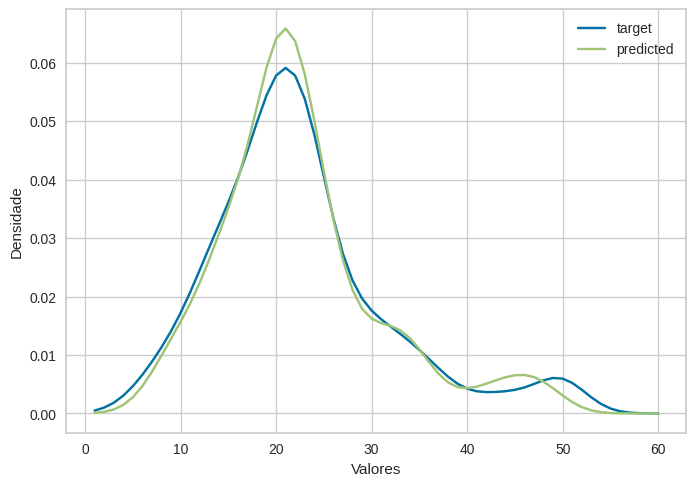

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\

\
###◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



### RF Boston (X with noisy feature)

In [ ]:
X.shape

(506, 14)

In [ ]:
X2.shape

(506, 14)

In [ ]:
X = X2.copy()

In [ ]:
X.shape

(506, 14)

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None

counterSPURtopTen = 0
counterSPURtopFive = 0
count=0
start = datetime.now()

# Outer cross-validation loop
#for train_index, test_index in outer_cv.split(X):
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)

for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")



        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")



        model_checkFI = best_rf
        xTest_checkFI = X_test_scaled
        yTest_checkFI = y_test_outer
        importances_checkFI = model_checkFI.feature_importances_
        featureNames_checkFI = X.columns
        forestImportances_checkFI = pd.Series(importances_checkFI, index=featureNames_checkFI)
        std_checkFI = np.std([tree.feature_importances_ for tree in model_checkFI.estimators_], axis=0)
        result_checkFI = permutation_importance(model_checkFI, xTest_checkFI, yTest_checkFI, n_repeats=10, random_state=42, n_jobs=2)
        forestImportances_checkFI = pd.Series(result_checkFI.importances_mean, index=featureNames_checkFI)
        forestImportances_sorted_checkFI = forestImportances_checkFI.copy()
        forestImportances_sorted_checkFI = forestImportances_sorted_checkFI.sort_values(ascending=False)
        forestImportances_sorted_checkFI = list(forestImportances_sorted_checkFI.index)
        indexSPUR = forestImportances_sorted_checkFI.index("SPUR")
        if indexSPUR<5:
          counterSPURtopFive = counterSPURtopFive + 1
        elif indexSPUR<10:
          counterSPURtopTen = counterSPURtopTen + 1



        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")


print("\n\n\nSPUR top 5: ", counterSPURtopFive)
print("SPUR top 10: ", counterSPURtopTen+counterSPURtopFive)
print("\n\n\n")




\

\

In [ ]:
outer_cv_scores

array([[0.86625813, 0.86629089],
       [0.86553873, 0.86568576],
       [0.87969863, 0.87958323],
       [0.9036162 , 0.90405265],
       [0.82208205, 0.82174789]])

In [ ]:
outer_cv_scores_train

array([[0.97665061, 0.97663183],
       [0.9758286 , 0.97580371],
       [0.97850637, 0.97850535],
       [0.97675935, 0.97676826],
       [0.9799364 , 0.97993927]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.8674554151553181

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9775329750045426

\

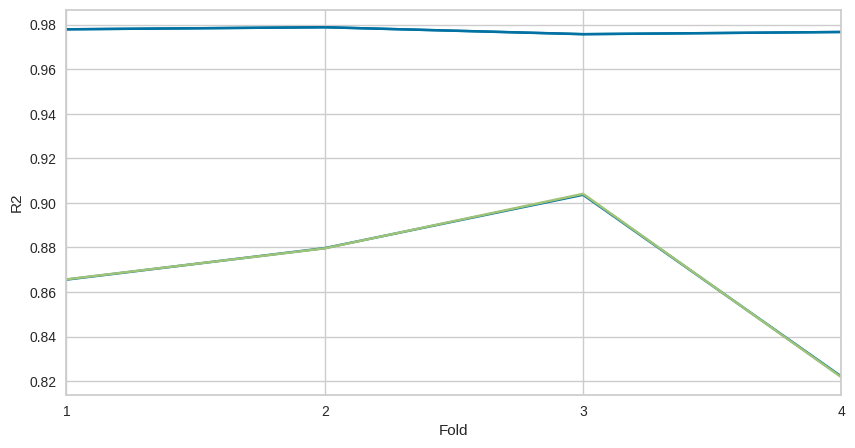

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 14 Features using RandomForestRegressor'}, xlabel='feature importance'>

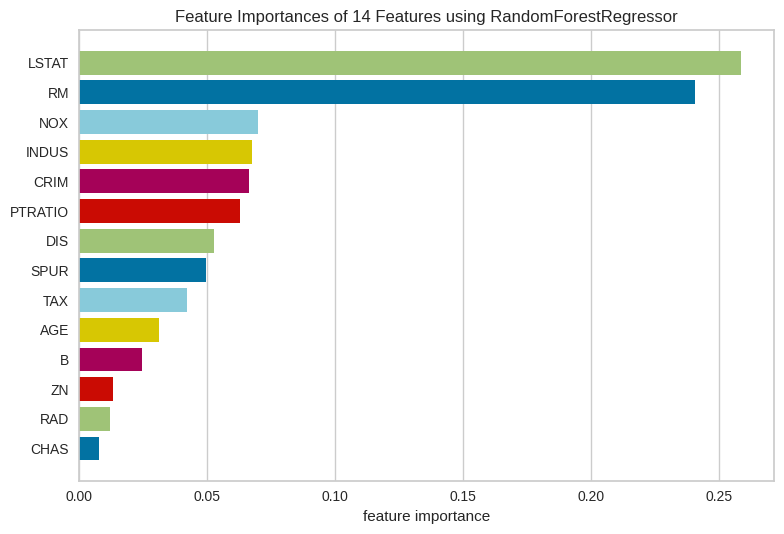

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0      24.0  25.711408
1      21.6  22.398104
2      34.7  34.545992
3      33.4  33.797091
4      36.2  34.823689
5      28.7  27.955088
6      22.9  21.797915
7      27.1  23.100140
8      16.5  17.670860
9      18.9  19.251506
10     15.0  18.145314
11     18.9  20.137169
12     21.7  21.176991
13     20.4  20.262558
14     18.2  18.947558
15     19.9  20.249392
16     23.1  21.804150
17     17.5  18.211433
18     20.2  19.294541
19     18.2  19.072004
20     13.6  14.183426
21     19.6  18.859363
22     15.2  16.327707
23     14.5  15.261650
24     15.6  16.561439
25     13.9  14.962848
26     16.6  17.243542
27     14.8  15.241691
28     18.4  19.021977
29     21.0  20.610349
30     12.7  13.833793
31     14.5  16.393766
32     13.2  14.593387
33     13.1  14.002213
34     13.5  14.308796
35     18.9  20.679790
36     20.0  20.842180
37     21.0  21.338918
38     24.7  22.480256
39     30.8  30.436854
40     34.9  34.748829
41     26.6  27.213037
42     25.3  24.566115
43     24.7  24.327315
44     21.2  21.804270
45     19.3  20.366534
46     20.0  20.392868
47     16.6  18.204122
48     14.4  16.695265
49     19.4  19.493768
50     19.7  20.572985
51     20.5  21.894327
52     25.0  25.130542
53     23.4  22.366804
54     18.9  19.574247
55     35.4  34.812707
56     24.7  24.261567
57     31.6  32.403535
58     23.3  23.279042
59     19.6  20.509362
60     18.7  19.500671
61     16.0  17.771585
62     22.2  22.880708
63     25.0  24.457102
64     33.0  31.933749
65     23.5  24.476105
66     19.4  20.451908
67     22.0  21.448266
68     17.4  19.001310
69     20.9  21.067752
70     24.2  23.813755
71     21.7  21.791711
72     22.8  23.140283
73     23.4  23.492955
74     24.1  23.734477
75     21.4  22.128992
76     20.0  20.659814
77     20.8  21.235567
78     21.2  21.255949
79     20.3  21.239475
80     28.0  26.979619
81     23.9  24.461102
82     24.8  23.984540
83     22.9  23.206025
84     23.9  23.074748
85     26.6  25.967150
86     22.5  21.557927
87     22.2  22.554200
88     23.6  26.019366
89     28.7  28.552773
90     22.6  23.008124
91     22.0  22.923553
92     22.9  23.307687
93     25.0  24.418526
94     20.6  21.409628
95     28.4  27.600015
96     21.4  22.663070
97     38.7  38.852154
98     43.8  42.208198
99     33.2  32.470320
100    27.5  25.404320
101    26.5  25.598908
102    18.6  18.884046
103    19.3  19.877041
104    20.1  20.069146
105    19.5  19.164204
106    19.5  18.926466
107    20.4  19.976110
108    19.8  20.244971
109    19.4  19.433774
110    21.7  21.163895
111    22.8  22.378961
112    18.8  19.315668
113    18.7  19.181404
114    18.5  20.097250
115    18.3  18.850673
116    21.2  20.780175
117    19.2  20.012306
118    20.4  19.733488
119    19.3  20.065860
120    22.0  21.176306
121    20.3  20.460525
122    20.5  19.732475
123    17.3  17.628752
124    18.8  19.175473
125    21.4  20.383263
126    15.7  16.306990
127    16.2  16.279160
128    18.0  17.722727
129    14.3  15.686279
130    19.2  19.346036
131    19.6  19.707668
132    23.0  20.873646
133    18.4  18.083413
134    15.6  15.827153
135    18.1  17.826710
136    17.4  17.333319
137    17.1  17.868747
138    13.3  14.673502
139    17.8  16.750218
140    14.0  15.193729
141    14.4  14.526929
142    13.4  14.732961
143    15.6  14.989182
144    11.8  13.793317
145    13.8  14.719930
146    15.6  15.903727
147    14.6  14.717805
148    17.8  16.679630
149    15.4  15.815435
150    21.5  20.133633
151    19.6  19.080854
152    15.3  17.733805
153    19.4  18.323099
154    17.0  17.807020
155    15.6  16.218174
156    13.1  14.321952
157    41.3  37.799495
158    24.3  24.343912
159    23.3  23.888877
160    27.0  26.475467
161    50.0  48.042196
162    50.0  49.128630
163    50.0  49.121963
164    22.7  21.815112
165    25.0  23.404406
166    50.0  48.517296
167    23.8  21.825446
168    23.8  22.584328
169    22.3  21.983569
170    17.4  18.938806
171    19.1  20.315480
172    23.1  22.141783
173

In [ ]:
import pandas as pd

realXpredicted.to_csv("random_forest_240407_X2_Bostom_01_realXpredicted.csv", sep=",", header=True, index=False, decimal=".")

In [ ]:
xAxis = np.linspace(1, 60, num=60)



<Figure size 2000x1000 with 0 Axes>

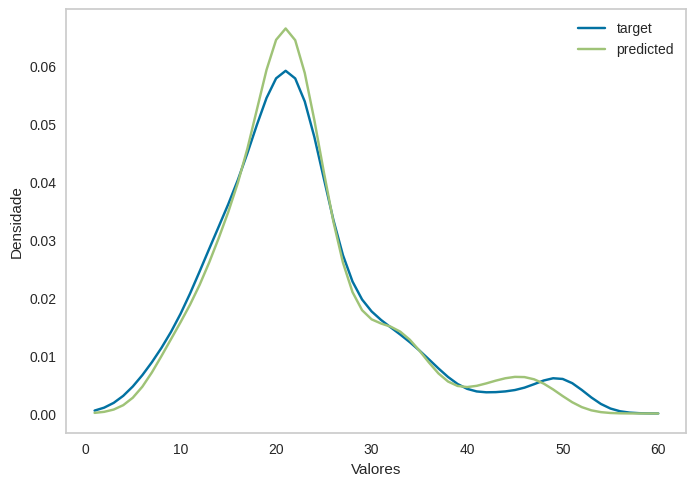

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



# inner 4-fold grid search of Random Forest optimization within an outer 5-fold cross-validation loop [666_FRI]

## Outer CV Inner CV and Scaling

\

### RF 666_FRI (X)

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)

#for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):
#    train_index = outer_cv_xtrain_indexes_ref[iterator]
#    test_index  = outer_cv_xtest_indexes_ref[iterator]
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)

# Calculate mean accuracy across outer folds for ALL
#mean_accuracy_ALL = np.mean(outer_cv_scores)
#print("\n\n\n\nmean_accuracy_ALL: ", mean_accuracy_ALL, "\n\n")

# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")



\

In [ ]:
outer_cv_scores

array([[0.85219488, 0.85219488],
       [0.85009704, 0.85009704],
       [0.83456535, 0.83456535],
       [0.80028514, 0.80028514],
       [0.8289805 , 0.8289805 ]])

In [ ]:
outer_cv_scores_train

array([[0.97078891, 0.97078891],
       [0.96990194, 0.96990194],
       [0.96998764, 0.96998764],
       [0.97137798, 0.97137798],
       [0.96654019, 0.96654019]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.8332245827110061

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9697193323367561

\

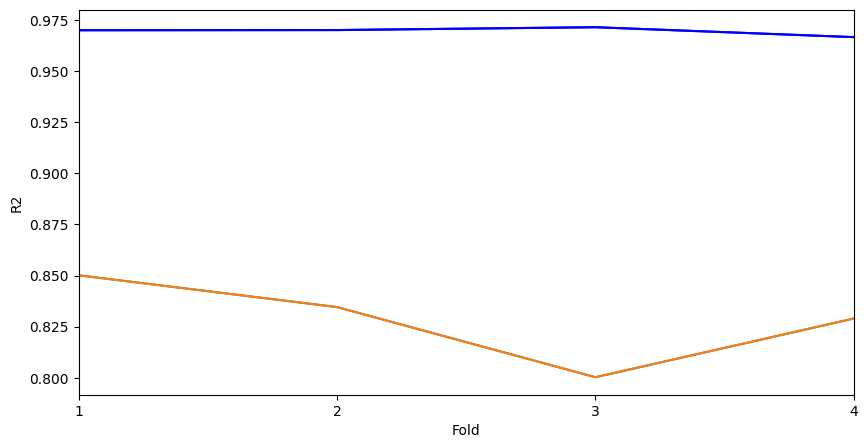

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

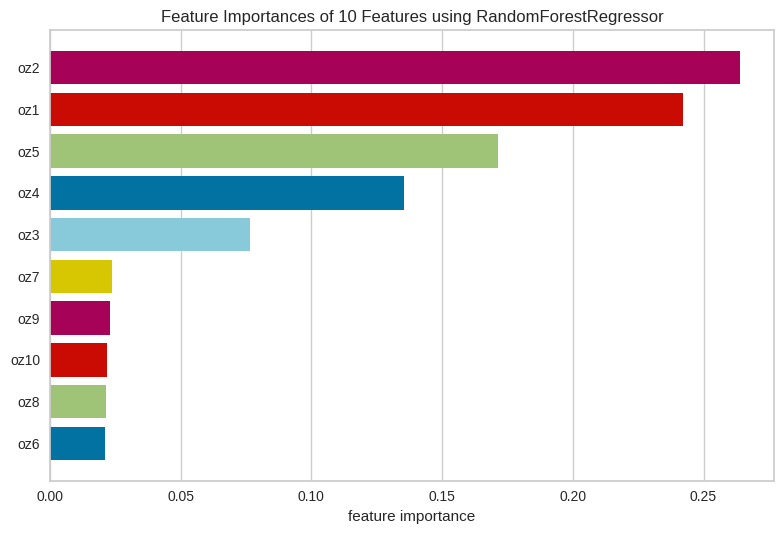

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0   -2.344501  -1.999722
1    0.318339   0.286592
2    0.412499   0.374619
3   -0.143536  -0.145491
4    0.028061  -0.172511
5   -0.780270  -0.946918
6   -0.129644  -0.180647
7   -1.253659  -1.154448
8    0.207132   0.285180
9   -0.844768  -0.864637
10   1.150540   0.918170
11  -0.631479  -0.798095
12  -0.168945   0.074205
13   0.344918   0.532720
14   0.755742   0.658588
15  -0.231725  -0.336168
16  -0.173924  -0.035908
17  -0.635377  -0.385331
18  -0.130057  -0.018766
19  -1.238097  -1.260217
20   0.515115   0.412357
21   3.273694   3.055876
22   1.149995   0.814514
23   0.411301   0.402841
24  -0.099235  -0.090731
25  -0.569553  -0.521553
26   0.002895  -0.062643
27  -0.357043  -0.306499
28   0.751666   0.581984
29  -2.369098  -2.003079
30   0.209434  -0.121724
31  -0.943397  -0.707631
32   1.314232   1.171907
33  -0.877115  -0.956585
34   1.099121   0.761432
35   1.053976   0.936492
36  -0.610938  -0.519854
37   0.625440   0.838608
38  -0.127163  -0.051835
39   0.643479   0.265791
40  -2.073505  -1.725708
41   0.633889   0.394232
42   0.741684   0.538353
43   0.150447   0.176248
44   1.190535   0.930604
45  -0.336495  -0.264659
46   0.412118   0.237769
47   0.015344   0.041547
48  -1.398142  -1.102046
49   1.116089   1.129991
50   0.993621   0.987198
51   0.689804   0.496110
52   0.942562   1.275345
53   0.962842   0.786063
54   0.570263   0.554808
55   0.563542   0.481075
56  -0.536580  -0.588390
57   0.386753   0.075603
58   0.348618   0.335724
59  -0.377691  -0.453698
60  -0.054943  -0.150385
61   1.044573   0.741943
62   0.091156   0.156112
63   1.199569   0.862702
64  -0.589471  -0.551456
65   0.897884   0.919407
66   0.916366   0.613491
67  -0.604263  -0.482348
68   0.507577   0.545338
69   2.487200   2.340578
70  -1.455752  -1.260402
71   0.945157   0.702110
72   0.466770   0.334144
73   0.423134   0.373394
74   0.276037   0.264088
75  -0.211748  -0.295672
76  -0.475179  -0.579261
77  -0.034874  -0.080813
78  -0.332452  -0.092379
79  -0.723190  -0.662855
80  -1.233746  -0.995979
81   0.660958   0.472585
82   0.293851   0.165939
83  -0.182070  -0.282829
84   1.318643   1.133174
85   1.146795   0.755425
86   0.043335   0.119835
87  -0.736467  -0.710754
88  -0.591363  -0.512473
89   1.069340   0.772991
90  -1.004986  -0.847071
91   0.662040   0.432636
92   2.569283   2.365492
93  -1.478509  -1.387005
94  -2.155473  -1.831035
95   0.074986   0.076939
96   0.925344   0.981517
97   1.267170   1.064793
98  -0.888497  -1.048599
99  -1.009798  -0.771510
100 -2.048284  -1.952241
101  0.732812   0.543848
102 -0.074793  -0.090888
103  0.491879   0.375916
104 -0.022997   0.084682
105  0.405918   0.272728
106 -1.292320  -1.087753
107  0.326423   0.356889
108 -1.388850  -1.184496
109  0.621157   0.580022
110  0.404508   0.266351
111  0.037018   0.232037
112  1.292685   1.209858
113  0.112719   0.206155
114  0.837080   0.706153
115  0.496558   0.399854
116  0.516393   0.369729
117 -0.309040  -0.165883
118 -0.240864  -0.065741
119 -0.306623  -0.102076
120 -1.842866  -1.681491
121 -1.507331  -1.422786
122 -0.344645  -0.164161
123 -1.121942  -1.127415
124 -1.852410  -1.668038
125 -0.180969  -0.485407
126  0.352809   0.336484
127  0.095996   0.483498
128 -0.971335  -0.843747
129  0.906434   0.722664
130 -0.253925  -0.099323
131  1.171909   1.038422
132 -1.013952  -0.873439
133  0.234135   0.242071
134 -1.076333  -0.930670
135 -0.804425  -0.586189
136  0.253305   0.287187
137 -1.430925  -1.116642
138 -1.036136  -0.717874
139  0.255136   0.247511
140 -0.265276  -0.338920
141  0.303803   0.235875
142  1.617809   1.410927
143 -0.184234  -0.206906
144  1.770739   1.613764
145 -0.106270   0.000933
146  1.058833   0.882322
147  0.157241  -0.041849
148  0.774660   0.683505
149  1.330619   1.226160
150  0.621103   0.530860
151 -1.997098  -1.687699
152 -1.564819  -1.622147
153 -0.368428  -0.296213
154  0.205977   0.172058
155 -0.520692  -0.563402
156 -2.072738  -1.829607
157  2.213629   2.067046
158 -0.269979  -0.570878
159 -0.

In [ ]:
realXpredicted.target.max()

3.547152042388916

In [ ]:
realXpredicted.target.min()

-2.369097948074341

In [ ]:
realXpredicted.predicted.max()

3.24382736325264

In [ ]:
realXpredicted.predicted.min()

-2.1170026226289305

In [ ]:
import pandas as pd

realXpredicted.to_csv("random_forest_666fri_X_240414_01_realXpredicted.csv", sep=",", header=True, index=False, decimal=".")

In [ ]:
xAxis = np.linspace(-2.5, 3.6, num=100)



<Figure size 2000x1000 with 0 Axes>

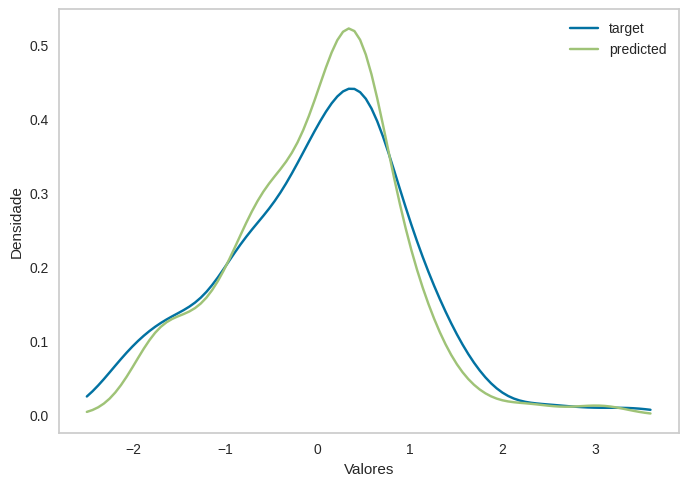

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\
###◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



### RF 666_FRI (X with noisy feature)

In [ ]:
X.shape

(500, 10)

In [ ]:
X2.shape

(500, 11)

In [ ]:
X = X2.copy()

In [ ]:
X.shape

(500, 11)

In [ ]:

# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler



seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None

counterSPURtopTen = 0
counterSPURtopFive = 0
count=0
start = datetime.now()

# Outer cross-validation loop
#for train_index, test_index in outer_cv.split(X):
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)

for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")



        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")



        model_checkFI = best_rf
        xTest_checkFI = X_test_scaled
        yTest_checkFI = y_test_outer
        importances_checkFI = model_checkFI.feature_importances_
        featureNames_checkFI = X.columns
        forestImportances_checkFI = pd.Series(importances_checkFI, index=featureNames_checkFI)
        std_checkFI = np.std([tree.feature_importances_ for tree in model_checkFI.estimators_], axis=0)
        result_checkFI = permutation_importance(model_checkFI, xTest_checkFI, yTest_checkFI, n_repeats=10, random_state=42, n_jobs=2)
        forestImportances_checkFI = pd.Series(result_checkFI.importances_mean, index=featureNames_checkFI)
        forestImportances_sorted_checkFI = forestImportances_checkFI.copy()
        forestImportances_sorted_checkFI = forestImportances_sorted_checkFI.sort_values(ascending=False)
        forestImportances_sorted_checkFI = list(forestImportances_sorted_checkFI.index)
        indexSPUR = forestImportances_sorted_checkFI.index("SPUR")
        if indexSPUR<5:
          counterSPURtopFive = counterSPURtopFive + 1
        elif indexSPUR<10:
          counterSPURtopTen = counterSPURtopTen + 1



        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")


print("\n\n\nSPUR top 5: ", counterSPURtopFive)
print("SPUR top 10: ", counterSPURtopTen+counterSPURtopFive)
print("\n\n\n")



In [ ]:
outer_cv_scores

array([[0.83744736, 0.83744736],
       [0.83663217, 0.83663217],
       [0.81303859, 0.81303859],
       [0.77454147, 0.77454147],
       [0.81144577, 0.81144577]])

In [ ]:
outer_cv_scores_train

array([[0.9697371 , 0.9697371 ],
       [0.96446061, 0.96446061],
       [0.96999174, 0.96999174],
       [0.9683689 , 0.9683689 ],
       [0.96559758, 0.96559758]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.814621073264942

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.967631187209123

\

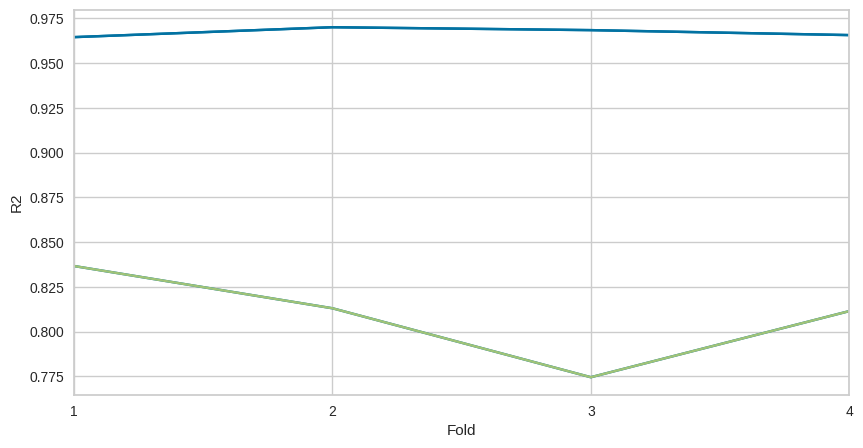

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 11 Features using RandomForestRegressor'}, xlabel='feature importance'>

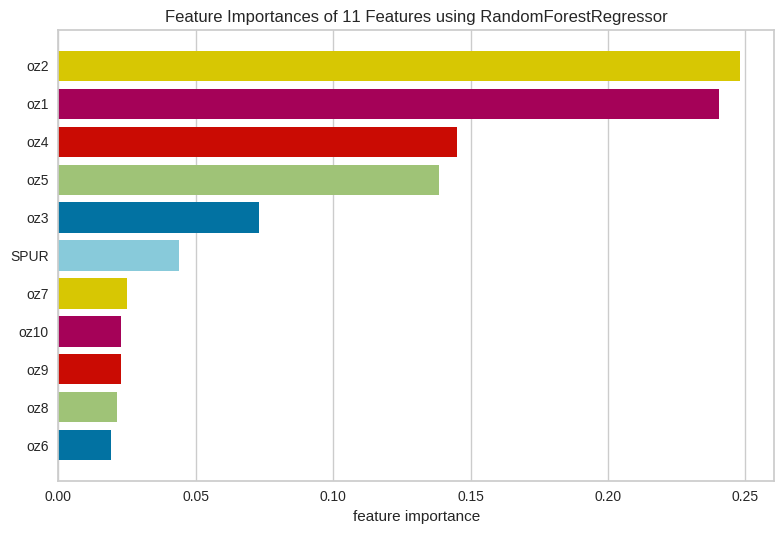

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0   -2.344501  -1.983515
1    0.318339   0.298143
2    0.412499   0.379286
3   -0.143536  -0.147831
4    0.028061  -0.092686
5   -0.780270  -0.947445
6   -0.129644  -0.193239
7   -1.253659  -1.118108
8    0.207132   0.292602
9   -0.844768  -0.866119
10   1.150540   0.836085
11  -0.631479  -0.764048
12  -0.168945  -0.038181
13   0.344918   0.542127
14   0.755742   0.667943
15  -0.231725  -0.364986
16  -0.173924  -0.070396
17  -0.635377  -0.361431
18  -0.130057  -0.030392
19  -1.238097  -1.274496
20   0.515115   0.377340
21   3.273694   3.122876
22   1.149995   0.855184
23   0.411301   0.406100
24  -0.099235  -0.103069
25  -0.569553  -0.481102
26   0.002895  -0.005255
27  -0.357043  -0.293058
28   0.751666   0.544811
29  -2.369098  -2.031184
30   0.209434  -0.131523
31  -0.943397  -0.730255
32   1.314232   1.199311
33  -0.877115  -0.900176
34   1.099121   0.803123
35   1.053976   0.936861
36  -0.610938  -0.536803
37   0.625440   0.840201
38  -0.127163  -0.082682
39   0.643479   0.246114
40  -2.073505  -1.719813
41   0.633889   0.396340
42   0.741684   0.537774
43   0.150447   0.124057
44   1.190535   0.925502
45  -0.336495  -0.304986
46   0.412118   0.247580
47   0.015344   0.044948
48  -1.398142  -1.076886
49   1.116089   1.092996
50   0.993621   0.855677
51   0.689804   0.443895
52   0.942562   1.239020
53   0.962842   0.777493
54   0.570263   0.567587
55   0.563542   0.423917
56  -0.536580  -0.547650
57   0.386753   0.072419
58   0.348618   0.354280
59  -0.377691  -0.469202
60  -0.054943  -0.139466
61   1.044573   0.807742
62   0.091156   0.109364
63   1.199569   0.821862
64  -0.589471  -0.485402
65   0.897884   0.876002
66   0.916366   0.623321
67  -0.604263  -0.517392
68   0.507577   0.524244
69   2.487200   2.463718
70  -1.455752  -1.254640
71   0.945157   0.690189
72   0.466770   0.344152
73   0.423134   0.330991
74   0.276037   0.235804
75  -0.211748  -0.327553
76  -0.475179  -0.578274
77  -0.034874  -0.195642
78  -0.332452  -0.091258
79  -0.723190  -0.683925
80  -1.233746  -1.077205
81   0.660958   0.483881
82   0.293851   0.128987
83  -0.182070  -0.224925
84   1.318643   1.112972
85   1.146795   0.780021
86   0.043335   0.109327
87  -0.736467  -0.682043
88  -0.591363  -0.462340
89   1.069340   0.693024
90  -1.004986  -0.794321
91   0.662040   0.463138
92   2.569283   2.342080
93  -1.478509  -1.316140
94  -2.155473  -1.855399
95   0.074986   0.079473
96   0.925344   0.954736
97   1.267170   1.081760
98  -0.888497  -1.025386
99  -1.009798  -0.691935
100 -2.048284  -1.862580
101  0.732812   0.509404
102 -0.074793  -0.010376
103  0.491879   0.347433
104 -0.022997   0.099616
105  0.405918   0.266438
106 -1.292320  -0.995870
107  0.326423   0.354868
108 -1.388850  -1.237540
109  0.621157   0.544342
110  0.404508   0.277443
111  0.037018   0.216641
112  1.292685   1.168990
113  0.112719   0.152459
114  0.837080   0.699307
115  0.496558   0.357357
116  0.516393   0.400881
117 -0.309040  -0.180585
118 -0.240864  -0.079877
119 -0.306623  -0.063325
120 -1.842866  -1.681633
121 -1.507331  -1.358920
122 -0.344645  -0.145230
123 -1.121942  -1.012900
124 -1.852410  -1.631420
125 -0.180969  -0.576532
126  0.352809   0.385386
127  0.095996   0.312358
128 -0.971335  -0.802582
129  0.906434   0.690959
130 -0.253925  -0.115904
131  1.171909   1.054541
132 -1.013952  -0.804636
133  0.234135   0.219154
134 -1.076333  -0.902519
135 -0.804425  -0.579995
136  0.253305   0.299505
137 -1.430925  -1.133422
138 -1.036136  -0.638381
139  0.255136   0.254617
140 -0.265276  -0.267009
141  0.303803   0.224154
142  1.617809   1.302923
143 -0.184234  -0.145278
144  1.770739   1.597318
145 -0.106270  -0.073556
146  1.058833   0.893182
147  0.157241   0.003082
148  0.774660   0.645046
149  1.330619   1.180171
150  0.621103   0.547922
151 -1.997098  -1.629961
152 -1.564819  -1.629058
153 -0.368428  -0.328730
154  0.205977   0.206118
155 -0.520692  -0.562424
156 -2.072738  -1.796388
157  2.213629   2.075465
158 -0.269979  -0.565043
159 -0.

In [ ]:
import pandas as pd

realXpredicted.to_csv("random_forest_666fri_X2_240414_01_realXpredicted.csv", sep=",", header=True, index=False, decimal=".")

In [ ]:
realXpredicted.target.max()

3.547152042388916

In [ ]:
realXpredicted.target.min()

-2.369097948074341

In [ ]:
realXpredicted.predicted.max()

3.1869399269136944

In [ ]:
realXpredicted.predicted.min()

-2.031184117489966

In [ ]:
xAxis = np.linspace(-2.4, 3.6, num=100)



<Figure size 2000x1000 with 0 Axes>

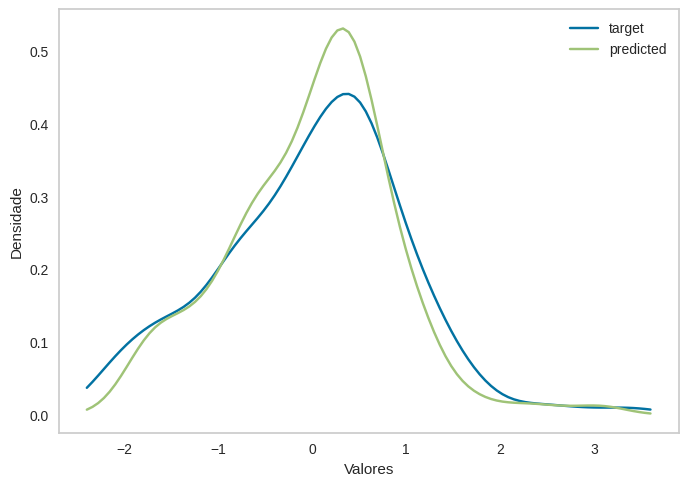

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



\

# inner 4-fold grid search of Random Forest optimization within an outer 5-fold cross-validation loop [rmftsa_ladata]

## Outer CV Inner CV and Scaling

\

### RF rmftsa_ladata (X)

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error'],
    'max_features': ['sqrt', 'log2', 0.5],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None

counterSPURtopTen = 0
counterSPURtopFive = 0
count=0
start = datetime.now()

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)

#for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):
#    train_index = outer_cv_xtrain_indexes_ref[iterator]
#    test_index  = outer_cv_xtest_indexes_ref[iterator]
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True)  # , random_state=seed

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 72
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /720\n")
        print("Tempo dos 72: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")



        model_checkFI = best_rf
        xTest_checkFI = X_test_scaled
        yTest_checkFI = y_test_outer
        importances_checkFI = model_checkFI.feature_importances_
        featureNames_checkFI = X.columns
        forestImportances_checkFI = pd.Series(importances_checkFI, index=featureNames_checkFI)
        std_checkFI = np.std([tree.feature_importances_ for tree in model_checkFI.estimators_], axis=0)
        result_checkFI = permutation_importance(model_checkFI, xTest_checkFI, yTest_checkFI, n_repeats=10, random_state=42, n_jobs=2)
        forestImportances_checkFI = pd.Series(result_checkFI.importances_mean, index=featureNames_checkFI)
        forestImportances_sorted_checkFI = forestImportances_checkFI.copy()
        forestImportances_sorted_checkFI = forestImportances_sorted_checkFI.sort_values(ascending=False)
        forestImportances_sorted_checkFI = list(forestImportances_sorted_checkFI.index)
        indexSPUR = forestImportances_sorted_checkFI.index("SPUR")
        if indexSPUR<5:
          counterSPURtopFive = counterSPURtopFive + 1
        elif indexSPUR<10:
          counterSPURtopTen = counterSPURtopTen + 1






        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          #tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
#tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")


print("\n\n\nSPUR top 5: ", counterSPURtopFive)
print("SPUR top 10: ", counterSPURtopTen+counterSPURtopFive)
print("\n\n\n")



In [ ]:
outer_cv_scores

array([[0.58862531, 0.58859963],
       [0.36840244, 0.36820369],
       [0.60748179, 0.60748913],
       [0.51952253, 0.52717634],
       [0.66434999, 0.66427399]])

In [ ]:
outer_cv_scores_train

array([[0.9202398 , 0.92020651],
       [0.93369043, 0.93369514],
       [0.92301834, 0.923048  ],
       [0.92683697, 0.92344013],
       [0.91787117, 0.91786148]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.550412484802201

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9239907955111437

\

In [ ]:

outer_cv_scores[:,1]

array([0.58859963, 0.36820369, 0.60748913, 0.52717634, 0.66427399])

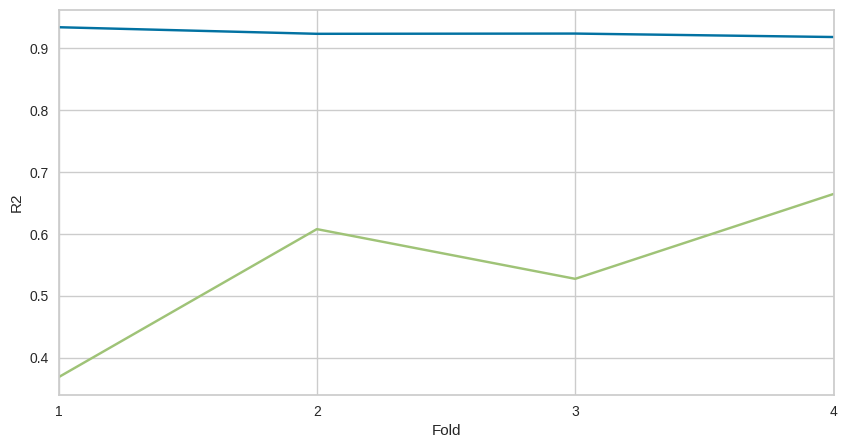

In [ ]:
plt.figure(figsize=(10,5))


ax1 = plt.plot(outer_cv_scores[:,1], "g-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train[:,1], "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

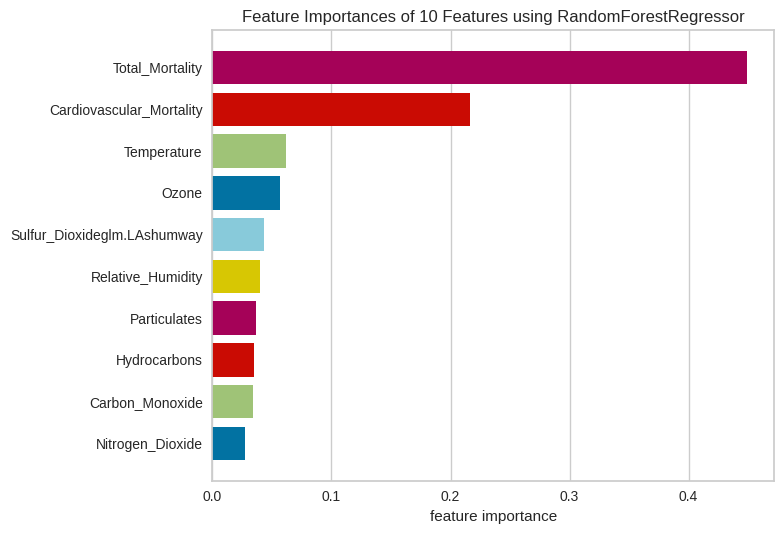

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0    11.900000  10.580200
1    10.750000  11.560378
2     9.330000   9.158848
3     9.540000   9.481034
4     8.270000   8.252359
5     7.550000   9.287649
6     9.120000   8.783168
7     7.760000   8.024571
8     7.470000   8.386688
9     7.440000   7.673084
10    8.910000   8.927628
11    9.730000   8.688563
12    9.860000   9.426018
13    8.040000   7.600753
14   10.730000   9.825504
15    6.730000   6.539228
16    7.770000   8.125332
17    8.230000   7.935063
18   10.310000   8.752093
19   10.280000   9.763674
20    9.080000   8.058755
21    5.460000   6.833110
22    5.350000   6.525550
23    5.640000   6.748394
24    7.830000   7.721644
25    9.200000   8.011730
26    5.810000   6.359228
27    6.750000   7.030435
28    8.330000   7.958086
29    8.410000   7.802812
30    6.530000   7.041787
31    8.210000   8.347765
32    7.750000   7.681628
33    7.760000   7.687205
34    7.160000   7.618528
35    7.470000   7.803397
36    9.630000   9.104149
37    7.560000   8.050935
38    6.930000   7.970678
39    6.780000   7.778058
40    5.530000   7.011753
41   10.510000   9.558669
42    8.320000   8.573766
43    9.180000  10.076310
44    8.790000  10.008473
45    8.310000  10.299047
46   12.390000  14.321368
47   12.420000  12.836659
48   14.080000  14.095434
49   13.930000  12.664180
50   12.150000  11.916958
51   12.630000  12.767857
52   11.030000  10.886307
53   10.840000  11.698973
54    9.260000  11.126630
55   11.780000  11.176979
56   16.049999  14.960573
57   12.120000  11.242203
58   10.050000  10.214694
59    8.380000   8.121840
60    6.940000   7.362263
61    8.320000   8.053950
62    6.660000   7.484743
63    7.780000   7.801246
64    6.940000   7.542827
65    6.750000   7.013378
66    6.560000   7.134474
67    6.120000   7.437648
68    6.810000   7.610267
69    6.450000   6.881386
70    6.810000   7.151549
71    7.100000   7.113535
72    7.460000   7.469843
73    7.370000   7.859288
74    6.540000   6.651819
75    7.870000   7.732871
76    9.190000  10.345196
77    7.800000   7.740898
78    6.940000   6.563167
79    6.140000   7.162067
80    7.380000   7.228022
81    8.030000   8.510515
82    8.770000   8.025993
83    4.570000   6.400174
84    8.890000   8.493518
85    9.250000   9.652359
86    8.190000   7.658175
87    9.110000   8.993010
88    9.030000   8.731849
89    9.180000  10.290611
90    6.870000   7.514060
91    7.300000   8.036866
92    6.110000   7.061108
93    6.830000   7.987966
94    9.820000   9.943936
95    9.130000   9.588930
96   12.090000  13.690629
97   13.590000  13.939834
98   13.190000  13.376489
99   15.440000  14.606229
100  13.570000  13.517069
101  16.410000  14.851279
102  11.270000  11.746550
103  13.520000  13.439447
104  14.860000  14.476994
105   9.240000   9.453694
106   9.180000   8.361364
107   7.930000   7.868526
108   9.750000   9.240923
109   8.470000   7.781604
110   7.620000   7.406686
111   7.570000   7.321301
112   5.490000   6.742579
113   7.150000   7.775606
114   7.650000   7.577535
115   8.360000   7.861867
116   7.520000   8.008584
117   7.350000   7.341097
118   6.390000   7.775902
119   5.860000   6.408333
120   7.490000   7.361301
121   5.230000   5.910359
122   7.320000   7.550356
123   6.460000   7.143161
124   7.890000   7.635157
125   7.240000   7.414629
126   9.080000   8.397356
127   6.490000   7.683987
128  10.200000   9.118978
129   6.720000   6.835446
130   5.890000   6.558590
131   5.280000   6.335094
132   8.170000   7.409707
133   5.710000   6.549147
134   5.570000   6.588147
135   6.030000   7.089914
136   4.560000   5.934222
137   7.560000   7.039871
138   4.820000   5.760565
139   8.110000   7.964541
140   6.770000   7.378444
141   8.750000   8.551629
142   6.720000   7.851647
143   7.970000   8.085596
144   8.070000   8.687664
145   9.140000   8.880586
146   6.120000   7.227888
147  10.720000  10.595074
148  11.740000  12.314944
149  13.760000  13.480990
150  17.780001  19.811601
151  26.240000  23.313000
152  30.430000  25.175019
153 

In [ ]:
realXpredicted.target.max()

30.43000030517578

In [ ]:
realXpredicted.target.min()

4.150000095367432

In [ ]:
realXpredicted.predicted.max()

25.175018708705903

In [ ]:
realXpredicted.predicted.min()

5.405187246665503

In [ ]:
realXpredicted.target.max()

30.43000030517578

In [ ]:
realXpredicted.target.min()

4.150000095367432

In [ ]:
realXpredicted.predicted.max()

25.175018708705903

In [ ]:
realXpredicted.predicted.min()

5.405187246665503

In [ ]:
xAxis = np.linspace(4, 31, num=100)



<Figure size 2000x1000 with 0 Axes>

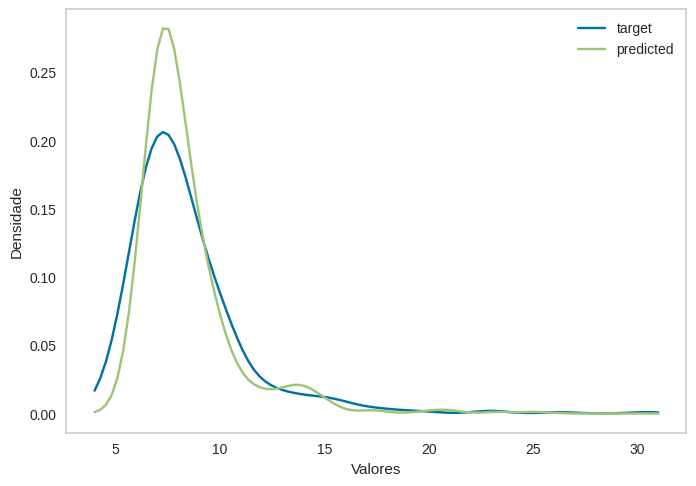

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

### RF rmftsa_ladata (X with noisy feature)

In [ ]:
X.shape

(508, 10)

In [ ]:
X2.shape

(508, 11)

In [ ]:
X = X2.copy()

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}


# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None

counterSPURtopTen = 0
counterSPURtopFive = 0
count=0
start = datetime.now()

# Outer cross-validation loop
#for train_index, test_index in outer_cv.split(X):
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)

for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):
    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]
    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True)  # , random_state=seed

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 72
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /720\n")
        print("Tempo dos 72: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")



        model_checkFI = best_rf
        xTest_checkFI = X_test_scaled
        yTest_checkFI = y_test_outer
        importances_checkFI = model_checkFI.feature_importances_
        featureNames_checkFI = X.columns
        forestImportances_checkFI = pd.Series(importances_checkFI, index=featureNames_checkFI)
        std_checkFI = np.std([tree.feature_importances_ for tree in model_checkFI.estimators_], axis=0)
        result_checkFI = permutation_importance(model_checkFI, xTest_checkFI, yTest_checkFI, n_repeats=10, random_state=42, n_jobs=2)
        forestImportances_checkFI = pd.Series(result_checkFI.importances_mean, index=featureNames_checkFI)
        forestImportances_sorted_checkFI = forestImportances_checkFI.copy()
        forestImportances_sorted_checkFI = forestImportances_sorted_checkFI.sort_values(ascending=False)
        forestImportances_sorted_checkFI = list(forestImportances_sorted_checkFI.index)
        indexSPUR = forestImportances_sorted_checkFI.index("SPUR")
        if indexSPUR<5:
          counterSPURtopFive = counterSPURtopFive + 1
        elif indexSPUR<10:
          counterSPURtopTen = counterSPURtopTen + 1




        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          #tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)



# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
#tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")


print("\n\n\nSPUR top 5: ", counterSPURtopFive)
print("SPUR top 10: ", counterSPURtopTen+counterSPURtopFive)
print("\n\n\n")




In [ ]:
outer_cv_scores

array([[0.56685094, 0.56676603],
       [0.3549585 , 0.34473285],
       [0.59605834, 0.59606776],
       [0.52813947, 0.52730008],
       [0.61950654, 0.61892633]])

In [ ]:
outer_cv_scores_train

array([[0.91690687, 0.91696321],
       [0.93011233, 0.92464592],
       [0.9171463 , 0.91716043],
       [0.92019134, 0.92008723],
       [0.91274667, 0.91266608]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.5319306839325536

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9188626386607052

\

\

In [ ]:

outer_cv_scores[:,0]

array([0.56685094, 0.3549585 , 0.59605834, 0.52813947, 0.61950654])

In [ ]:

outer_cv_scores_train[:,0]

array([0.91690687, 0.93011233, 0.9171463 , 0.92019134, 0.91274667])

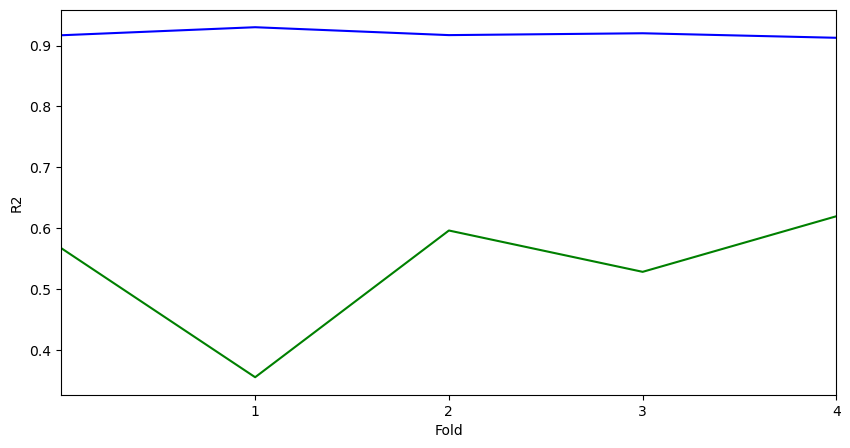

In [ ]:
plt.figure(figsize=(10,5))


ax1 = plt.plot(outer_cv_scores[:,0], "g-", label='Teste')
ax2 = plt.plot(outer_cv_scores_train[:,0], "b-", label='Treino')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(0, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

C:\Users\perei\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Feature Importances of 11 Features using RandomForestRegressor'}, xlabel='feature importance'>

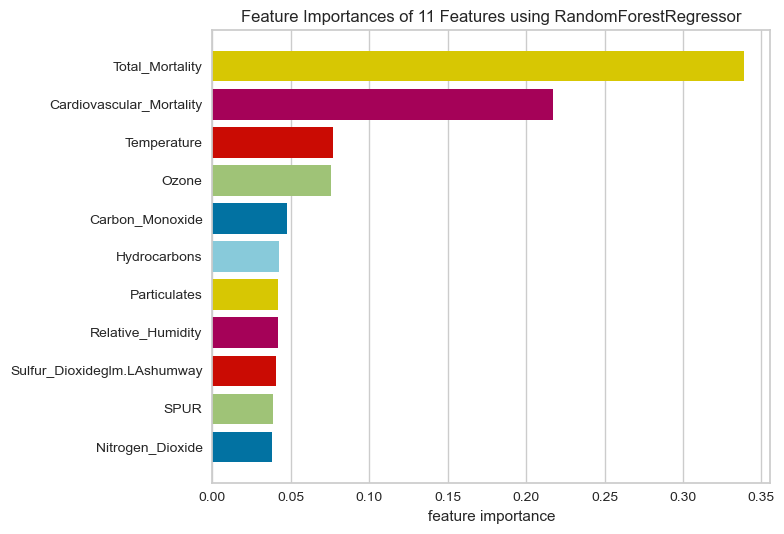

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target  predicted
0    11.900000  10.644870
1    10.750000  11.565241
2     9.330000   9.015295
3     9.540000   9.415310
4     8.270000   8.228235
5     7.550000   9.157426
6     9.120000   8.642543
7     7.760000   7.966749
8     7.470000   8.128917
9     7.440000   7.632662
10    8.910000   8.767882
11    9.730000   8.657223
12    9.860000   9.420056
13    8.040000   7.584683
14   10.730000   9.863103
15    6.730000   6.719332
16    7.770000   7.974317
17    8.230000   7.836211
18   10.310000   8.461049
19   10.280000   9.674159
20    9.080000   7.866557
21    5.460000   6.816058
22    5.350000   6.672509
23    5.640000   6.842255
24    7.830000   7.715706
25    9.200000   7.927822
26    5.810000   6.553831
27    6.750000   6.990906
28    8.330000   7.797324
29    8.410000   7.785653
30    6.530000   7.136767
31    8.210000   8.311888
32    7.750000   7.674257
33    7.760000   7.556459
34    7.160000   7.550090
35    7.470000   7.845231
36    9.630000   9.366022
37    7.560000   8.269341
38    6.930000   7.849062
39    6.780000   7.724067
40    5.530000   6.977252
41   10.510000   9.555353
42    8.320000   8.475787
43    9.180000  10.049451
44    8.790000   9.770714
45    8.310000  10.429604
46   12.390000  14.162627
47   12.420000  12.770116
48   14.080000  13.916584
49   13.930000  12.732157
50   12.150000  11.924900
51   12.630000  12.780270
52   11.030000  11.023129
53   10.840000  11.477636
54    9.260000  10.934360
55   11.780000  11.070749
56   16.049999  14.520738
57   12.120000  11.285396
58   10.050000  10.187017
59    8.380000   8.034948
60    6.940000   7.371742
61    8.320000   8.183595
62    6.660000   7.544480
63    7.780000   7.843668
64    6.940000   7.420729
65    6.750000   7.090673
66    6.560000   7.082775
67    6.120000   7.465550
68    6.810000   7.469228
69    6.450000   6.996811
70    6.810000   7.105805
71    7.100000   7.065365
72    7.460000   7.452552
73    7.370000   7.769986
74    6.540000   6.660176
75    7.870000   7.739065
76    9.190000  10.360265
77    7.800000   7.778466
78    6.940000   6.626400
79    6.140000   7.136473
80    7.380000   7.203533
81    8.030000   8.535467
82    8.770000   7.947156
83    4.570000   6.491363
84    8.890000   8.252918
85    9.250000   9.658516
86    8.190000   7.717836
87    9.110000   9.015213
88    9.030000   8.942090
89    9.180000  10.263103
90    6.870000   7.273244
91    7.300000   8.182204
92    6.110000   7.195228
93    6.830000   8.079348
94    9.820000   9.965904
95    9.130000   9.631017
96   12.090000  13.106227
97   13.590000  14.059903
98   13.190000  13.379836
99   15.440000  14.686098
100  13.570000  13.659702
101  16.410000  14.605141
102  11.270000  11.674371
103  13.520000  13.506819
104  14.860000  14.208067
105   9.240000   9.453142
106   9.180000   8.489094
107   7.930000   8.117664
108   9.750000   9.181018
109   8.470000   7.689801
110   7.620000   7.562770
111   7.570000   7.446077
112   5.490000   6.686278
113   7.150000   7.790339
114   7.650000   7.619301
115   8.360000   7.893488
116   7.520000   7.871818
117   7.350000   7.301139
118   6.390000   7.663860
119   5.860000   6.497765
120   7.490000   7.519988
121   5.230000   5.828523
122   7.320000   7.516375
123   6.460000   7.062551
124   7.890000   7.550323
125   7.240000   7.339824
126   9.080000   8.422340
127   6.490000   7.481117
128  10.200000   9.077618
129   6.720000   6.785500
130   5.890000   6.653862
131   5.280000   6.284847
132   8.170000   7.477710
133   5.710000   6.409798
134   5.570000   6.722979
135   6.030000   7.036053
136   4.560000   5.985842
137   7.560000   7.214413
138   4.820000   6.098488
139   8.110000   7.982136
140   6.770000   7.384692
141   8.750000   8.529049
142   6.720000   7.820580
143   7.970000   8.155114
144   8.070000   8.691402
145   9.140000   8.778177
146   6.120000   7.683712
147  10.720000  10.451664
148  11.740000  12.376508
149  13.760000  13.820053
150  17.780001  19.507738
151  26.240000  22.905209
152  30.430000  25.754723
153 

In [ ]:
realXpredicted.target.max()

30.43000030517578

In [ ]:
realXpredicted.target.min()

4.150000095367432

In [ ]:
realXpredicted.predicted.max()

25.75472258639487

In [ ]:
realXpredicted.predicted.min()

5.385078011294778

\

In [ ]:
xAxis = np.linspace(4, 31, num=100)



<Figure size 2000x1000 with 0 Axes>

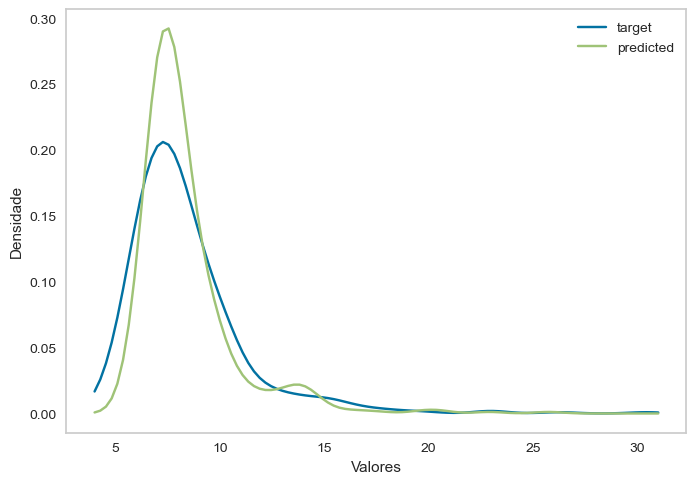

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



\

# inner 4-fold grid search of Random Forest optimization within an outer 5-fold cross-validation loop [function]

## Outer CV Inner CV and Scaling

\

### RF function (X)

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()

# Outer cross-validation loop
for train_index, test_index in outer_cv.split(X):
    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)

#for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):
#    train_index = outer_cv_xtrain_indexes_ref[iterator]
#    test_index  = outer_cv_xtest_indexes_ref[iterator]
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")




\

In [ ]:
outer_cv_scores

array([[0.90514978, 0.90514211],
       [0.99592644, 0.99613665],
       [0.99451163, 0.99476633],
       [0.89412071, 0.89587798],
       [0.96956552, 0.96967269]])

In [ ]:
outer_cv_scores_train

array([[0.99765996, 0.99766316],
       [0.99427218, 0.99429074],
       [0.99523908, 0.99536405],
       [0.99432837, 0.99432384],
       [0.99201368, 0.9920409 ]])

\

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.9520869843757935

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9947195961911899

\

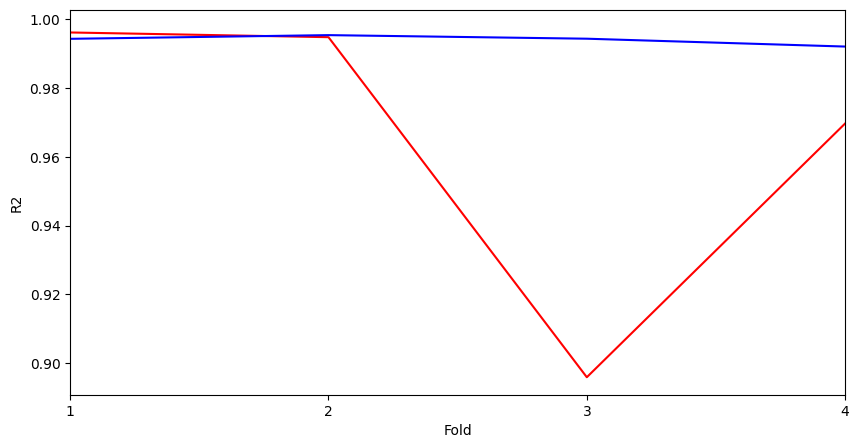

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores[:,1], "r-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train[:,1], "b-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<Axes: title={'center': 'Feature Importances of 3 Features using RandomForestRegressor'}, xlabel='feature importance'>

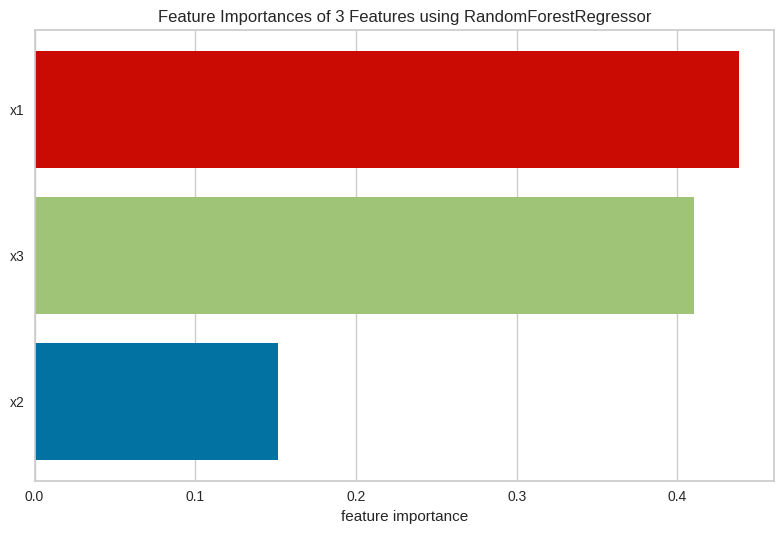

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target   predicted
0   -125.000 -103.331930
1   -118.139 -109.378331
2   -111.552 -107.110687
3   -105.233 -102.475451
4    -99.176  -97.460374
5    -93.375  -90.881848
6    -87.824  -85.867606
7    -82.517  -81.674784
8    -77.448  -76.541374
9    -72.611  -72.102451
10   -68.000  -67.508991
11   -63.609  -63.365729
12   -59.432  -58.834314
13   -55.463  -54.772016
14   -51.696  -51.199506
15   -48.125  -47.291041
16   -44.744  -44.356844
17   -41.547  -41.192702
18   -38.528  -38.526014
19   -35.681  -35.415926
20   -33.000  -32.510597
21   -30.479  -29.641031
22   -28.112  -27.211818
23   -25.893  -24.960137
24   -23.816  -22.924464
25   -21.875  -21.162690
26   -20.064  -19.692845
27   -18.377  -17.778975
28   -16.808  -16.331566
29   -15.351  -14.881183
30   -14.000  -13.647613
31   -12.749  -12.545953
32   -11.592  -11.362446
33   -10.523  -10.334729
34    -9.536   -9.353047
35    -8.625   -8.327241
36    -7.784   -7.657997
37    -7.007   -6.769590
38    -6.288   -6.144148
39    -5.621   -5.450501
40    -5.000   -4.797709
41    -4.419   -4.204690
42    -3.872   -3.740696
43    -3.353   -3.211671
44    -2.856   -2.688456
45    -2.375   -2.169459
46    -1.904   -1.736520
47    -1.437   -1.215601
48    -0.968   -0.739102
49    -0.491   -0.401342
50     0.000   -0.092180
51     0.511    0.302765
52     1.048    0.780424
53     1.617    1.335286
54     2.224    1.939064
55     2.875    2.558867
56     3.576    3.206376
57     4.333    4.041800
58     5.152    4.805612
59     6.039    5.671179
60     7.000    6.540891
61     8.041    7.580623
62     9.168    8.567962
63    10.387    9.914279
64    11.704   11.198362
65    13.125   12.581942
66    14.656   14.047208
67    16.303   15.743152
68    18.072   17.270679
69    19.969   19.219957
70    22.000   21.241887
71    24.171   23.127651
72    26.488   25.187852
73    28.957   27.846690
74    31.584   29.894577
75    34.375   32.133750
76    37.336   35.072707
77    40.473   38.675984
78    43.792   41.899779
79    47.299   45.894831
80    51.000   48.768676
81    54.901   52.678691
82    59.008   57.347876
83    63.327   62.253292
84    67.864   66.887724
85    72.625   71.739005
86    77.616   76.264717
87    82.843   81.154219
88    88.312   86.559300
89    94.029   92.762904
90   100.000   98.200671
91   106.231  103.841876
92   112.728  110.675820
93   119.497  117.236716
94   126.544  123.593645
95   133.875  130.632886
96   141.496  137.200012
97   149.413  144.518861
98   157.632  149.917174
99   166.159  152.690780
100  175.000  149.200670

In [ ]:
realXpredicted.target.max()

175.0

In [ ]:
realXpredicted.target.min()

-125.0

In [ ]:
realXpredicted.predicted.max()

152.69078000000135

In [ ]:
realXpredicted.predicted.min()

-109.37833099999914

In [ ]:
xAxis = np.linspace(-125, 175, num=300)



<Figure size 2000x1000 with 0 Axes>

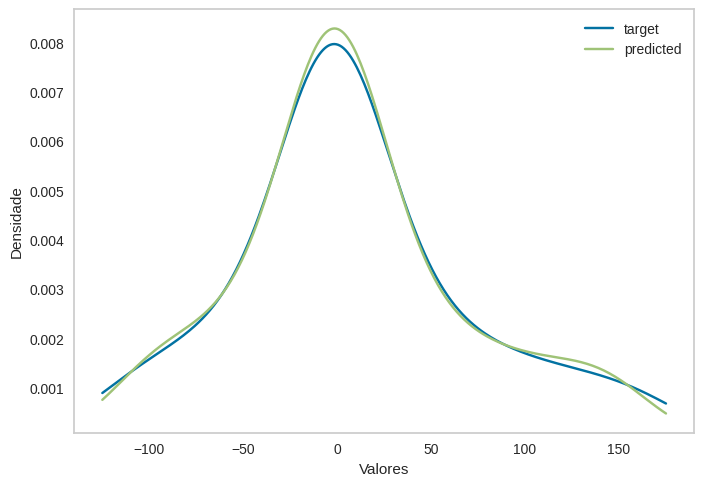

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\

### RF function (X with noisy feature)

In [ ]:
X.shape

(101, 3)

In [ ]:
X2.shape

(101, 4)

In [ ]:
X = X2.copy()

In [ ]:


# Import necessary libraries
import numpy as np
import copy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler




seed=42




# Define hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 300, 1000],
    'max_depth': [5, 10],
    'bootstrap': [True],
    'criterion': ['squared_error', 'friedman_mse'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [42],
    'n_jobs': [-1],
    'verbose': [0]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    "NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)

# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


counterSPURtopTen = 0
counterSPURtopFive = 0
count=0
start = datetime.now()

# Outer cross-validation loop
#for train_index, test_index in outer_cv.split(X):
#    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
#    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
#    outer_cv_xtrain_indexes.append(train_index)
#    outer_cv_xtest_indexes.append(test_index)
#    outer_cv_ytrain_indexes.append(train_index)
#    outer_cv_ytest_indexes.append(test_index)

for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):
    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]
    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)



    # Initialize list to store inner CV results for each scaling method
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)

        # Initialize Random Forest Regressor
        rf = RandomForestRegressor()

        then = datetime.now()

        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)

        now = datetime.now()
        count = count + 128
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /1,280\n")
        print("Tempo dos 128: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")


        # Obtain best model from grid search
        best_rf = grid_search.best_estimator_

        print("\n\n", best_rf.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")


        model_checkFI = best_rf
        xTest_checkFI = X_test_scaled
        yTest_checkFI = y_test_outer
        importances_checkFI = model_checkFI.feature_importances_
        featureNames_checkFI = X.columns
        forestImportances_checkFI = pd.Series(importances_checkFI, index=featureNames_checkFI)
        std_checkFI = np.std([tree.feature_importances_ for tree in model_checkFI.estimators_], axis=0)
        result_checkFI = permutation_importance(model_checkFI, xTest_checkFI, yTest_checkFI, n_repeats=10, random_state=42, n_jobs=2)
        forestImportances_checkFI = pd.Series(result_checkFI.importances_mean, index=featureNames_checkFI)
        forestImportances_sorted_checkFI = forestImportances_checkFI.copy()
        forestImportances_sorted_checkFI = forestImportances_sorted_checkFI.sort_values(ascending=False)
        forestImportances_sorted_checkFI = list(forestImportances_sorted_checkFI.index)
        indexSPUR = forestImportances_sorted_checkFI.index("x4")
        if indexSPUR<5:
          counterSPURtopFive = counterSPURtopFive + 1
        elif indexSPUR<10:
          counterSPURtopTen = counterSPURtopTen + 1




        # Evaluate best model on outer fold test set
        outer_cv_score = best_rf.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_rf.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_rf.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_rf)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")

    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)


stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")


print("\n\n\nSPUR top 5: ", counterSPURtopFive)
print("SPUR top 10: ", counterSPURtopTen+counterSPURtopFive)
print("\n\n\n")



In [ ]:
outer_cv_scores

array([[0.99612992, 0.99612765],
       [0.99926015, 0.99930007],
       [0.99839336, 0.9984036 ],
       [0.99127747, 0.99158966],
       [0.99748628, 0.99750426]])

In [ ]:
outer_cv_scores_train

array([[0.99966487, 0.99966646],
       [0.99938344, 0.99939263],
       [0.99925218, 0.99927703],
       [0.99922953, 0.99921769],
       [0.99876978, 0.99877654]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.9965472419380543

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9992630145487741

\

\

In [ ]:
# coluna do RobustScaler que foi melhor
outer_cv_scores[:,1]

array([0.99612765, 0.99930007, 0.9984036 , 0.99158966, 0.99750426])

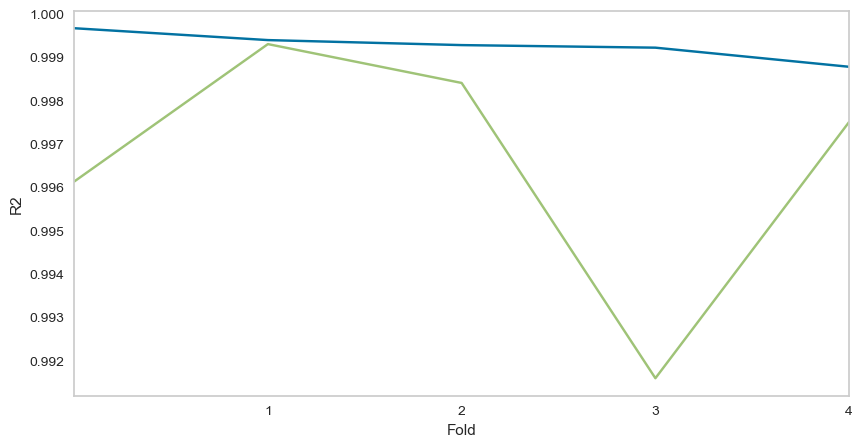

In [ ]:
plt.figure(figsize=(10,5))


ax1 = plt.plot(outer_cv_scores[:,1], "g-", label='Teste')
ax2 = plt.plot(outer_cv_scores_train[:,1], "b-", label='Treino')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
# Hide grid lines
ax.grid(False)
ax.set_xlim(0, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

C:\Users\perei\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


<AxesSubplot:title={'center':'Feature Importances of 4 Features using RandomForestRegressor'}, xlabel='feature importance'>

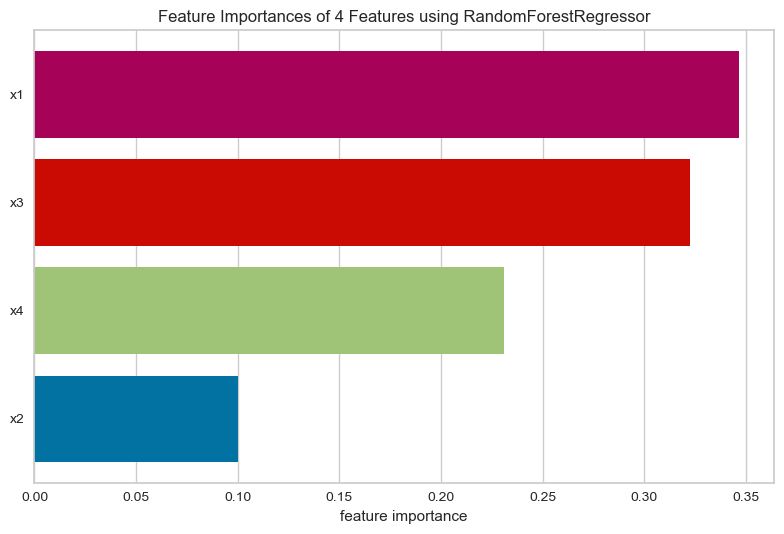

In [ ]:
from yellowbrick.model_selection import FeatureImportances

visualizer = FeatureImportances(the_best_model, relative=False)
visualizer.fit(X, y)
visualizer.score(X, y)
visualizer.show("feature_importance.jpg")

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

In [ ]:
realXpredicted

target   predicted
0   -125.000 -120.583493
1   -118.139 -116.704773
2   -111.552 -110.115157
3   -105.233 -103.786423
4    -99.176  -98.397693
5    -93.375  -93.227147
6    -87.824  -87.290537
7    -82.517  -83.280003
8    -77.448  -77.527933
9    -72.611  -72.836627
10   -68.000  -68.377280
11   -63.609  -63.429727
12   -59.432  -59.914793
13   -55.463  -55.650263
14   -51.696  -51.886237
15   -48.125  -48.267043
16   -44.744  -44.750150
17   -41.547  -41.576557
18   -38.528  -38.231513
19   -35.681  -35.263070
20   -33.000  -32.616273
21   -30.479  -30.177497
22   -28.112  -27.888847
23   -25.893  -25.769560
24   -23.816  -23.650853
25   -21.875  -21.701043
26   -20.064  -19.939723
27   -18.377  -18.196743
28   -16.808  -16.697910
29   -15.351  -15.244663
30   -14.000  -13.834603
31   -12.749  -12.643740
32   -11.592  -11.505007
33   -10.523  -10.502247
34    -9.536   -9.477130
35    -8.625   -8.571650
36    -7.784   -7.704900
37    -7.007   -6.879737
38    -6.288   -6.180317
39    -5.621   -5.572893
40    -5.000   -4.914473
41    -4.419   -4.364013
42    -3.872   -3.824650
43    -3.353   -3.295777
44    -2.856   -2.827217
45    -2.375   -2.311130
46    -1.904   -1.814880
47    -1.437   -1.336743
48    -0.968   -0.883693
49    -0.491   -0.475343
50     0.000   -0.101907
51     0.511    0.357683
52     1.048    0.897200
53     1.617    1.431150
54     2.224    2.030857
55     2.875    2.659280
56     3.576    3.405860
57     4.333    4.213640
58     5.152    4.966593
59     6.039    5.849590
60     7.000    6.854713
61     8.041    7.866993
62     9.168    8.989820
63    10.387   10.036860
64    11.704   11.443307
65    13.125   12.798087
66    14.656   14.293233
67    16.303   15.951807
68    18.072   17.625120
69    19.969   19.566713
70    22.000   21.557773
71    24.171   23.759533
72    26.488   26.037487
73    28.957   28.512133
74    31.584   31.037467
75    34.375   33.880130
76    37.336   36.742050
77    40.473   39.724353
78    43.792   43.558150
79    47.299   46.899370
80    51.000   50.432837
81    54.901   53.812010
82    59.008   58.739610
83    63.327   62.850040
84    67.864   67.464647
85    72.625   72.127757
86    77.616   77.403973
87    82.843   82.341443
88    88.312   87.387830
89    94.029   93.701157
90   100.000   99.203737
91   106.231  104.950307
92   112.728  111.708473
93   119.497  117.590567
94   126.544  125.344673
95   133.875  132.283423
96   141.496  139.763013
97   149.413  147.538637
98   157.632  155.755203
99   166.159  164.651617
100  175.000  167.959340

In [ ]:
realXpredicted.target.max()

175.0

In [ ]:
realXpredicted.target.min()

-125.0

In [ ]:
realXpredicted.predicted.max()

167.95933999999994

In [ ]:
realXpredicted.predicted.min()

-120.58349333333332

\

In [ ]:
xAxis = np.linspace(-125, 175, num=300)



<Figure size 2000x1000 with 0 Axes>

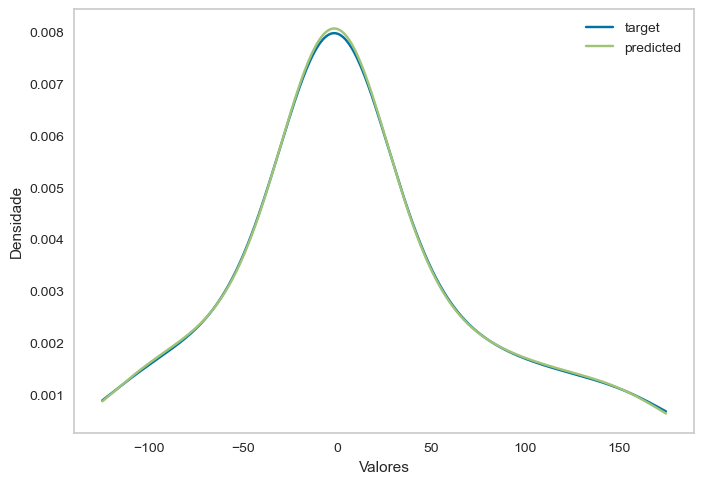

In [ ]:
plt.figure(figsize=(20,10))
ax = realXpredicted.plot.kde(ind=xAxis)
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.grid(False)
plt.show()

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\



# inner 4-fold grid search of PySR optimization within an outer 5-fold cross-validation loop [BOSTON]

\

In [ ]:
!pip install pysr

\

\

## Boston (X)

In [ ]:

import copy
from sklearn.model_selection import KFold, GridSearchCV




seed=42




param_grid_sr = {
    'niterations': [40, 60],
    'population_size': [33, 100],
    'populations': [30],
    'maxsize': [10],
    'procs': [16],
    'turbo': [True]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    #"NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)



# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()




for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)


    # Initialize list to store inner CV results
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []

    now = datetime.now()


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)


        from pysr import PySRRegressor
	    	# 8 minutes   4 minutes
        model = PySRRegressor(
			    procs=16,
			    turbo=True,
          random_state=seed,
			    binary_operators=["+", "*", "-", "/", "max"],
			    unary_operators=["exp", "sin"] ,
			    complexity_of_operators ={"sin": 10000, "exp": 1},
			    #extra_sympy_mappings={"inv": lambda x: 1 / x},
			    # ^ Define operator for SymPy as well
			    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
			    # ^ Custom loss function (julia syntax)
  		  )


        then = datetime.now()


        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_sr, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)


        now = datetime.now()
        count = count + 16
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /80\n")
        print("Tempo dos 16: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")




        # Obtain best model from grid search
        best_sr = grid_search.best_estimator_

        print("\n\n", best_sr.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_sr.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_sr.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_sr.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_sr)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")




    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)






stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)



# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")



\

\

In [ ]:
best_sr = the_best_model

In [ ]:
print(best_sr)

PySRRegressor.equations_ = [
	   pick     score                                             equation       loss  complexity
	0        0.000000                                            22.531721  84.419530           1
	1        0.391144                                    35.185345 - LSTAT  38.609943           3
	2  >>>>  0.113547                       11.834214 + (94.85093 / LSTAT)  30.766188           5
	3        0.113523            max(13.239397, (RM / 0.18522362) - LSTAT)  24.517082           7
	4        0.000002       max(exp(2.5841272), (RM / 0.18522362) - LSTAT)  24.517033           8
	5        0.050725       max(8.838701 / NOX, (RM / 0.18531427) - LSTAT)  23.304432           9
	6        0.002526  max((RM / exp(-1.6777062)) - LSTAT, 8.838701 / NOX)  23.245640          10
]


\

In [ ]:
best_sr.equations

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1125: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


complexity       loss     score                                             equation  \
0           1  84.419530  0.000000                                            22.531721   
1           3  38.609943  0.391144                                    35.185345 - LSTAT   
2           5  30.766188  0.113547                       11.834214 + (94.85093 / LSTAT)   
3           7  24.517082  0.113523            max(13.239397, (RM / 0.18522362) - LSTAT)   
4           8  24.517033  0.000002       max(exp(2.5841272), (RM / 0.18522362) - LSTAT)   
5           9  23.304432  0.050725       max(8.838701 / NOX, (RM / 0.18531427) - LSTAT)   
6          10  23.245640  0.002526  max((RM / exp(-1.6777062)) - LSTAT, 8.838701 / NOX)   

                                                                                                         sympy_format  \
0                                                                                                    22.5317210000000   
1                                                                                                   35.185345 - LSTAT   
2                                                                                          11.834214 + 94.85093/LSTAT   
3              Piecewise((-LSTAT + 5.39887947336306*RM, LSTAT - 5.39887947336306*RM < -13.239397), (13.239397, True))   
4  Piecewise((-LSTAT + 5.39887947336306*RM, LSTAT - 5.39887947336306*RM < -13.251717941634), (13.251717941634, True))   
5        Piecewise((-LSTAT + 5.39623850877755*RM, 8.838701/NOX < -LSTAT + 5.39623850877755*RM), (8.838701/NOX, True))   
6        Piecewise((8.838701/NOX, 8.838701/NOX > -LSTAT + 5.35326256353474*RM), (-LSTAT + 5.35326256353474*RM, True))   

                                                                                                                         lambda_format  
0                                                                                                    PySRFunction(X=>22.5317210000000)  
1                                                                                                   PySRFunction(X=>35.185345 - LSTAT)  
2                                                                                          PySRFunction(X=>11.834214 + 94.85093/LSTAT)  
3              PySRFunction(X=>Piecewise((-LSTAT + 5.39887947336306*RM, LSTAT - 5.39887947336306*RM < -13.239397), (13.239397, True)))  
4  PySRFunction(X=>Piecewise((-LSTAT + 5.39887947336306*RM, LSTAT - 5.39887947336306*RM < -13.251717941634), (13.251717941634, True)))  
5        PySRFunction(X=>Piecewise((-LSTAT + 5.39623850877755*RM, 8.838701/NOX < -LSTAT + 5.39623850877755*RM), (8.838701/NOX, True)))  
6        PySRFunction(X=>Piecewise((8.838701/NOX, 8.838701/NOX > -LSTAT + 5.35326256353474*RM), (-LSTAT + 5.35326256353474*RM, True)))

\

\

In [ ]:
best_sr.model_selection = "accuracy"

In [ ]:
best_sr.score(X,y)

0.7246415328903124

\

\

\

\

In [ ]:
outer_cv_scores

array([[0.66751669],
       [0.59985021],
       [0.72631814],
       [0.69835288],
       [0.55990171]])

In [ ]:
inner_cv_scores

[0.5599017119356857]

In [ ]:
outer_cv_scores_train

array([[0.66712705],
       [0.68313467],
       [0.63935559],
       [0.64601171],
       [0.6890123 ]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.6503879267118121

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.6649282628304359

\

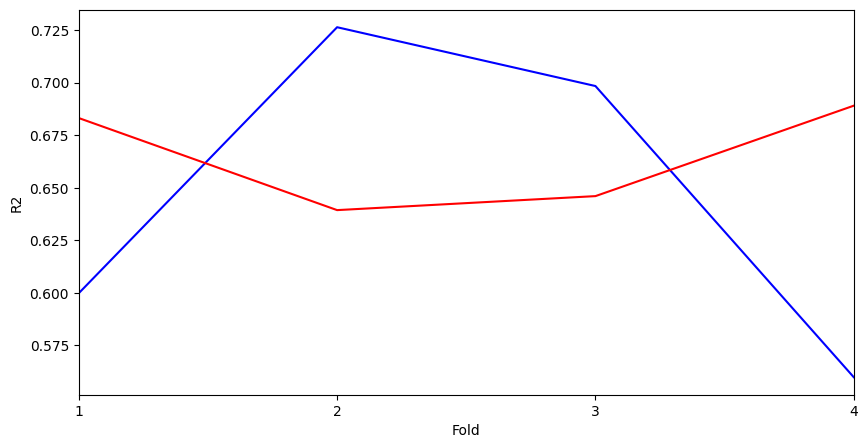

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "b-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "r-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

realXpredicted

target  predicted
0      24.0  30.880585
1      21.6  22.211777
2      34.7  35.370425
3      33.4  44.096435
4      36.2  29.629886
5      28.7  30.039767
6      22.9  19.465021
7      27.1  16.787265
8      16.5  15.003306
9      18.9  17.381052
10     15.0  16.472401
11     18.9  18.981986
12     21.7  17.871829
13     20.4  23.317377
14     18.2  21.078944
15     19.9  23.032671
16     23.1  26.249249
17     17.5  18.299853
18     20.2  19.948066
19     18.2  20.242984
20     13.6  16.346627
21     19.6  18.692560
22     15.2  16.901037
23     14.5  16.605388
24     15.6  17.653289
25     13.9  17.579273
26     16.6  18.238733
27     14.8  17.323272
28     18.4  19.244443
29     21.0  19.751654
30     12.7  16.031158
31     14.5  19.108058
32     13.2  15.257200
33     13.1  17.003202
34     13.5  16.497485
35     18.9  21.632864
36     20.0  20.147179
37     21.0  22.649599
38     24.7  21.197583
39     30.8  33.790448
40     34.9  59.738724
41     26.6  31.431514
42     25.3  28.159675
43     24.7  24.582995
44     21.2  21.766249
45     19.3  21.124217
46     20.0  18.537460
47     16.6  16.879476
48     14.4  14.912790
49     19.4  17.689210
50     19.7  18.886328
51     20.5  21.892637
52     25.0  29.798405
53     23.4  23.085807
54     18.9  18.243061
55     35.4  31.553742
56     24.7  28.272850
57     31.6  35.847108
58     23.3  25.660880
59     19.6  22.121734
60     18.7  19.047212
61     16.0  18.402838
62     22.2  25.927963
63     25.0  21.818522
64     33.0  23.616938
65     23.5  32.144906
66     19.4  21.097000
67     22.0  23.544205
68     17.4  19.080274
69     20.9  22.624991
70     24.2  25.948936
71     21.7  21.434511
72     22.8  29.017353
73     23.4  24.413913
74     24.1  25.824027
75     21.4  22.443938
76     20.0  19.758268
77     20.8  21.069942
78     21.2  19.520675
79     20.3  22.257393
80     28.0  29.764447
81     23.9  24.971462
82     24.8  25.948936
83     22.9  24.464165
84     23.9  21.693978
85     26.6  26.359624
86     22.5  19.209870
87     22.2  23.072476
88     23.6  29.079838
89     28.7  28.474728
90     22.6  22.600494
91     22.0  23.401401
92     22.9  23.458102
93     25.0  27.108116
94     20.6  20.790865
95     28.4  26.097512
96     21.4  20.198494
97     38.7  34.364126
98     43.8  38.403102
99     33.2  27.157466
100    27.5  21.903315
101    26.5  24.200698
102    18.6  20.757161
103    19.3  18.891575
104    20.1  19.526909
105    19.5  17.593226
106    19.5  16.917329
107    20.4  18.566005
108    19.8  19.564526
109    19.4  17.933952
110    21.7  19.130439
111    22.8  21.169935
112    18.8  17.685598
113    18.7  17.384298
114    18.5  20.910858
115    18.3  17.852674
116    21.2  19.712198
117    19.2  21.043042
118    20.4  18.005387
119    19.3  18.803423
120    22.0  18.434835
121    20.3  18.481091
122    20.5  17.124283
123    17.3  15.567033
124    18.8  17.229603
125    21.4  18.238733
126    15.7  15.313705
127    16.2  17.352011
128    18.0  17.997367
129    14.3  17.006020
130    19.2  19.362066
131    19.6  19.570831
132    23.0  20.363974
133    18.4  18.144988
134    15.6  17.313759
135    18.1  17.426840
136    17.4  17.446695
137    17.1  18.335306
138    13.3  16.283132
139    17.8  16.972401
140    14.0  15.760163
141    14.4  14.590707
142    13.4  15.370789
143    15.6  15.424332
144    11.8  15.072552
145    13.8  15.246118
146    15.6  17.530967
147    14.6  15.046233
148    17.8  15.183470
149    15.4  16.256169
150    21.5  18.561230
151    19.6  18.976603
152    15.3  19.660198
153    19.4  17.841239
154    17.0  18.107424
155    15.6  18.149189
156    13.1  17.710975
157    41.3  32.498905
158    24.3  26.585525
159    23.3  24.669252
160    27.0  29.079838
161    50.0  66.661341
162    50.0  61.235740
163    50.0  40.403771
164    22.7  19.982919
165    25.0  21.503014
166    50.0  37.469600
167    23.8  19.647305
168    23.8  20.379343
169    22.3  20.213271
170    17.4  18.407390
171    19.1  19.718747
172    23.1  18.291051
173

\

\

<Figure size 4000x2000 with 0 Axes>

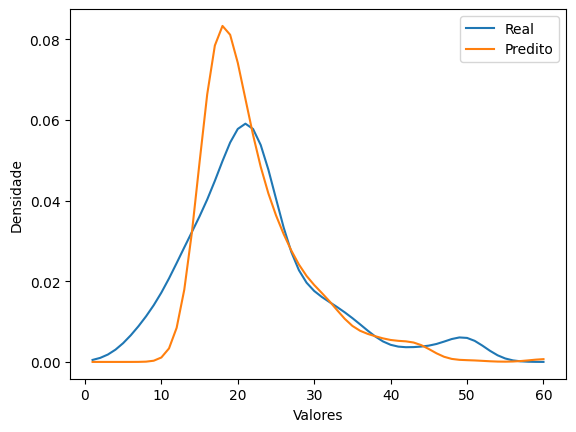

In [ ]:

xAxis = np.linspace(1, 60, num=60)
plt.figure(figsize=(40,20))
ax = realXpredicted.plot.kde(ind=xAxis)
ax.legend(['Real', 'Predito'])
plt.xlabel("Valores")
plt.ylabel("Densidade")
ax.grid(False)
plt.show()




\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\


\

# inner 4-fold grid search of PySR optimization within an outer 5-fold cross-validation loop [666_FRI]

\

In [ ]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 kB 1.7 MB/s eta 0:00:00


\

\

## 666_FRI (X)

In [ ]:

import copy
from sklearn.model_selection import KFold, GridSearchCV




seed=42




param_grid_sr = {
    'niterations': [40, 60],
    'population_size': [33, 100],
    'populations': [30],
    'maxsize': [20],
    'procs': [16],
    'turbo': [True]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    #"NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)



# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()




for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)


    # Initialize list to store inner CV results
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []

    now = datetime.now()


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)


        from pysr import PySRRegressor
	    	# 8 minutes   4 minutes
        model = PySRRegressor(
			    procs=16,
			    turbo=True,
          random_state=seed,
			    binary_operators=["+", "*", "-", "/", "max"],
          unary_operators=["exp", "sin", "square", "cos", "log"],
			    #extra_sympy_mappings={"inv": lambda x: 1 / x},
			    # ^ Define operator for SymPy as well
			    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
			    # ^ Custom loss function (julia syntax)
  		  )


        then = datetime.now()


        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_sr, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)


        now = datetime.now()
        count = count + 16
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /80\n")
        print("Tempo dos 16: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")




        # Obtain best model from grid search
        best_sr = grid_search.best_estimator_

        print("\n\n", best_sr.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_sr.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_sr.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_sr.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_sr)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")




    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)






stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")




\

In [ ]:
best_sr = the_best_model

In [ ]:
best_sr.equations

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1125: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


complexity      loss     score  \
0            1  0.998000  0.000000   
1            2  0.863163  0.145149   
2            3  0.773821  0.109263   
3            4  0.650798  0.173142   
4            5  0.646379  0.006812   
5            6  0.471486  0.315497   
6            7  0.453429  0.039051   
7            8  0.324073  0.335869   
8            9  0.322547  0.004721   
9           10  0.243387  0.281597   
10          11  0.213919  0.129054   
11          12  0.193252  0.101600   
12          13  0.170092  0.127659   
13          14  0.170072  0.000115   
14          15  0.161976  0.048774   
15          16  0.139094  0.152297   
16          17  0.129969  0.067857   
17          18  0.117062  0.104593   
18          19  0.107036  0.089541   
19          20  0.107027  0.000081   

                                                                                                        equation  \
0                                                                                                  -4.9025994e-6   
1                                                                                                       sin(oz4)   
2                                                                                               0.47392976 * oz4   
3                                                                                          sin(-2.3627083 * oz2)   
4                                                                                     sin(sin(oz2 * -2.3783624))   
5                                                                                  sin(-1.2747446 * (oz1 + oz2))   
6                                                                                      sin(oz4) - sin(oz2 + oz1)   
7                                                                             (0.5565047 * oz5) - sin(oz2 + oz1)   
8                                                                        sin(oz4) - sin((oz2 / 0.6825059) + oz1)   
9                                                               (oz4 * 0.4788969) - sin((oz2 + oz1) / 0.7970398)   
10                                                     max(oz5, 0.5261917) - square(sin(oz2 + oz1) + 0.51245934)   
11                                                      max(oz5, cos(oz2)) - square(sin(oz1 + oz2) + 0.52885157)   
12                                           (0.87926894 + (oz5 * 0.600371)) - square(sin(oz2 + oz1) + 0.600371)   
13                                    (0.87926894 + (0.600371 * oz5)) - square(sin(oz2 + oz1) + sin(0.64692605))   
14                                        max(sin(max(cos(oz2), oz4)), oz5) - square(0.5262501 + sin(oz2 + oz1))   
15                        ((oz4 / 2.435221) + sin((oz1 + oz2) * -1.2856383)) * ((oz2 * 0.40299287) - -1.0461152)   
16                   max(0.52144396, max(oz5, oz4)) - max(sin(oz2 + oz1) / 0.44316477, square(oz2 * 0.52144396))   
17        ((oz2 * 0.48125556) - -1.0427253) * ((oz4 / 2.4354713) + sin(((oz1 + oz2) * -1.4065825) + 0.31065807))   
18       ((sin(oz1) * 0.64571) - -1.0427253) * (sin(((oz1 + oz2) * -1.4065825) + 0.3257439) + (oz4 / 2.4354713))   
19  ((sin(oz1) * 0.64571) - -1.0427253) * (sin(((oz1 + oz2) * -1.4065825) + sin(0.3257439)) + (oz4 / 2.4354713))   

                                                                                                                                                                                                                                                                 sympy_format  \
0                                                                                                                                                                                                                                                        -4.90259940000000e-6   
1                                                                                                                                                                                                                             

\

In [ ]:
best_sr.score(X,y)

0.8606269546993977

\

In [ ]:
best_sr.model_selection = "accuracy"

In [ ]:
best_sr.score(X,y)

0.8927585730675544

\

\

\

\

In [ ]:
outer_cv_scores

array([[0.86279948],
       [0.89521229],
       [0.82208693],
       [0.84292081],
       [0.83484498]])

In [ ]:
outer_cv_scores_train

array([[0.86573651],
       [0.87471882],
       [0.85464309],
       [0.86844481],
       [0.87629132]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.8515728967636577

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.8679669097093079

\

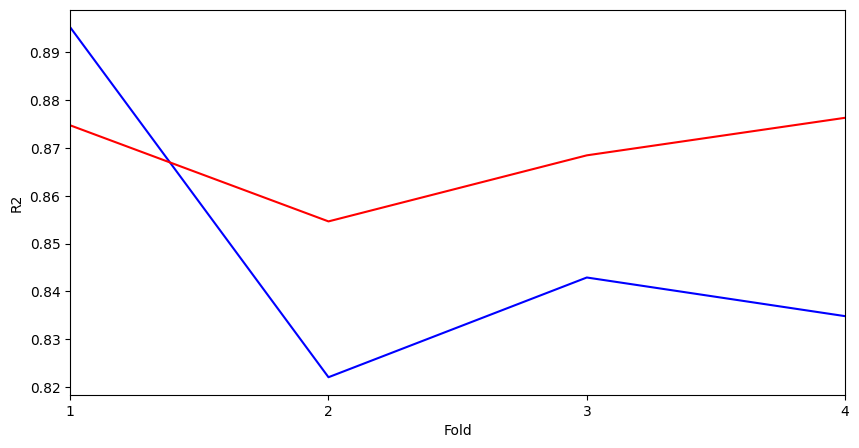

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "b-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "r-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

realXpredicted

target  predicted
0   -2.344501  -2.253060
1    0.318339   0.201678
2    0.412499   0.262640
3   -0.143536  -0.202588
4    0.028061   0.015232
5   -0.780270  -1.108348
6   -0.129644  -0.438156
7   -1.253659  -1.177451
8    0.207132  -0.477038
9   -0.844768  -0.805053
10   1.150540   0.688080
11  -0.631479  -0.822314
12  -0.168945   0.193162
13   0.344918   0.669557
14   0.755742   0.224267
15  -0.231725  -1.063614
16  -0.173924  -0.478044
17  -0.635377  -0.548268
18  -0.130057  -0.134400
19  -1.238097  -1.555007
20   0.515115   0.035503
21   3.273694   2.224741
22   1.149995   0.381664
23   0.411301   0.306417
24  -0.099235   0.182944
25  -0.569553  -0.463647
26   0.002895  -0.352795
27  -0.357043  -0.234160
28   0.751666   0.524208
29  -2.369098  -1.952000
30   0.209434   0.281386
31  -0.943397  -0.632759
32   1.314232   0.921281
33  -0.877115  -0.758405
34   1.099121   0.862572
35   1.053976   0.951012
36  -0.610938  -0.553348
37   0.625440   2.085585
38  -0.127163  -0.415681
39   0.643479   0.346278
40  -2.073505  -2.018913
41   0.633889   0.324980
42   0.741684   0.474712
43   0.150447  -0.185532
44   1.190535   0.964843
45  -0.336495  -0.564233
46   0.412118  -0.220349
47   0.015344  -0.061660
48  -1.398142  -1.090863
49   1.116089   0.896129
50   0.993621   0.414081
51   0.689804   0.299241
52   0.942562   2.444745
53   0.962842   0.786522
54   0.570263   0.694623
55   0.563542   0.431743
56  -0.536580  -0.433539
57   0.386753   0.190726
58   0.348618   0.631055
59  -0.377691  -0.530797
60  -0.054943  -0.426348
61   1.044573   0.840072
62   0.091156  -0.296190
63   1.199569   1.139927
64  -0.589471  -0.446519
65   0.897884   0.921795
66   0.916366   0.767642
67  -0.604263  -1.286954
68   0.507577   0.112752
69   2.487200   2.117790
70  -1.455752  -0.969871
71   0.945157   0.860900
72   0.466770  -0.034698
73   0.423134   0.488833
74   0.276037   0.015520
75  -0.211748  -0.419109
76  -0.475179  -0.070397
77  -0.034874  -0.929731
78  -0.332452  -0.001298
79  -0.723190  -1.054256
80  -1.233746  -1.268199
81   0.660958   0.251931
82   0.293851  -0.453062
83  -0.182070  -0.532221
84   1.318643   0.806536
85   1.146795   0.704968
86   0.043335   0.309553
87  -0.736467  -0.934270
88  -0.591363  -0.498877
89   1.069340   1.067723
90  -1.004986  -0.838988
91   0.662040   0.326581
92   2.569283   2.237972
93  -1.478509  -1.907636
94  -2.155473  -1.991764
95   0.074986   0.187348
96   0.925344   1.849716
97   1.267170   1.072492
98  -0.888497  -1.218482
99  -1.009798  -0.754809
100 -2.048284  -2.023958
101  0.732812   0.891262
102 -0.074793  -0.111779
103  0.491879  -0.060895
104 -0.022997  -0.038274
105  0.405918   0.118618
106 -1.292320  -0.726108
107  0.326423   0.122401
108 -1.388850  -0.718110
109  0.621157   0.429392
110  0.404508   0.346636
111  0.037018   0.437974
112  1.292685   1.281135
113  0.112719   0.006180
114  0.837080   0.663743
115  0.496558   0.186514
116  0.516393  -0.167737
117 -0.309040  -0.445367
118 -0.240864  -0.016044
119 -0.306623   0.231676
120 -1.842866  -1.997333
121 -1.507331  -1.613874
122 -0.344645  -0.152074
123 -1.121942  -1.225160
124 -1.852410  -2.001395
125 -0.180969  -0.083856
126  0.352809   0.199194
127  0.095996  -0.049857
128 -0.971335  -1.433142
129  0.906434   0.875516
130 -0.253925  -0.242305
131  1.171909   0.835484
132 -1.013952  -1.173892
133  0.234135  -0.544751
134 -1.076333  -0.899543
135 -0.804425  -0.730296
136  0.253305   0.236657
137 -1.430925  -1.057953
138 -1.036136  -0.360575
139  0.255136   0.431588
140 -0.265276  -0.903461
141  0.303803  -0.339330
142  1.617809   1.719736
143 -0.184234  -0.092379
144  1.770739   2.074725
145 -0.106270  -0.267090
146  1.058833   0.290860
147  0.157241  -0.443743
148  0.774660   0.575513
149  1.330619   1.029016
150  0.621103   1.094541
151 -1.997098  -1.981307
152 -1.564819  -1.429314
153 -0.368428  -0.342027
154  0.205977  -0.073039
155 -0.520692  -1.144444
156 -2.072738  -1.747024
157  2.213629   2.504500
158 -0.269979  -0.561704
159 -0.

\

<Figure size 4000x2000 with 0 Axes>

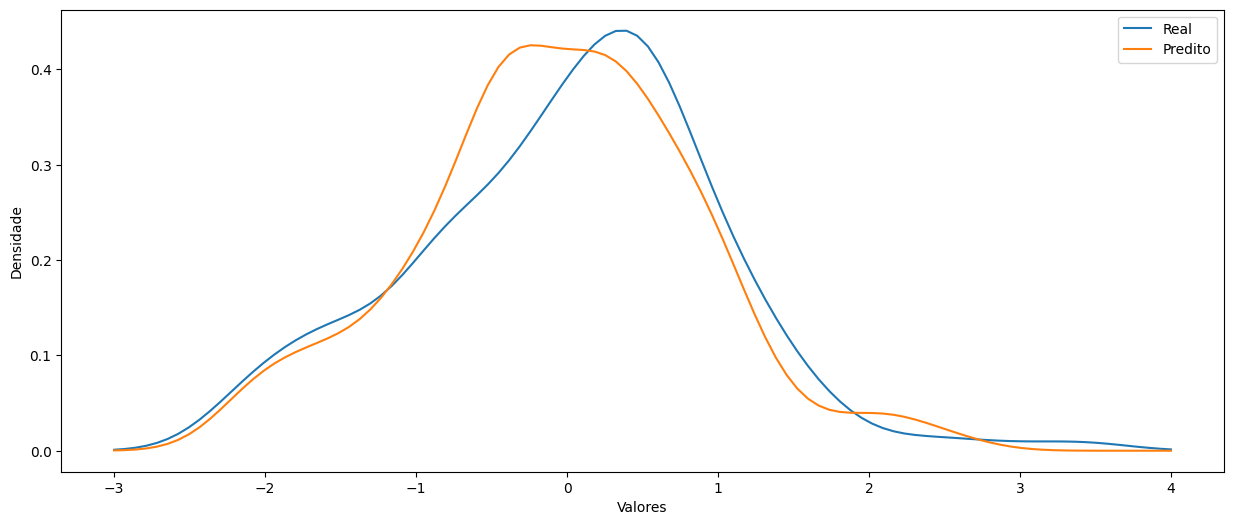

In [ ]:

xAxis = np.linspace(-3, 4, num=100)
plt.figure(figsize=(40,20))
ax = realXpredicted.plot.kde(ind=xAxis)
ax.legend(['Real', 'Predito'])
plt.xlabel("Valores")
plt.ylabel("Densidade")
ax.grid(False)
plt.show()




\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\


# inner 4-fold grid search of PySR optimization within an outer 5-fold cross-validation loop [rmftsa_ladata]

\

In [ ]:
!pip install pysr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


\

\

## rmftsa_ladata (X)

In [ ]:
X.columns = ['Total_Mortality', 'Cardiovascular_Mortality', 'Temperature', 'Relative_Humidity',
       'Carbon_Monoxide', 'Sulfur_Dioxideglm_LAshumway', 'Nitrogen_Dioxide', 'Hydrocarbons',
       'Ozone', 'Particulates']



import copy
from sklearn.model_selection import KFold, GridSearchCV




seed=42




param_grid_sr = {
    'niterations': [40, 60],
    'population_size': [33, 100],
    'populations': [30],
    'maxsize': [20],
    'procs': [16],
    'turbo': [True]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    #"NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)



# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()




for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)


    # Initialize list to store inner CV results
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []

    now = datetime.now()


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)


        from pysr import PySRRegressor
	    	# 8 minutes   4 minutes
        model = PySRRegressor(
			    procs=16,
			    turbo=True,
          random_state=seed,
			    binary_operators=["+", "*", "-", "/", "max"],
			    #unary_operators=["exp", "sin", "inv(x) = 1/x",],
          unary_operators=["exp", "sin", "square", "cos", "log"],
			    # ^ Define operator for SymPy as well
			    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
			    # ^ Custom loss function (julia syntax)
  		  )


        then = datetime.now()


        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_sr, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)


        now = datetime.now()
        count = count + 16
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /80\n")
        print("Tempo dos 16: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")




        # Obtain best model from grid search
        best_sr = grid_search.best_estimator_

        print("\n\n", best_sr.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_sr.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_sr.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_sr.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_sr)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")




    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)






stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")






In [ ]:
best_sr = the_best_model

In [ ]:
print(best_sr)

PySRRegressor.equations_ = [
	    pick     score  \
	0         0.000000   
	1         1.882964   
	2         0.354185   
	3   >>>>  0.462108   
	4         0.059234   
	5         0.055332   
	6         0.002392   
	7         0.026469   
	8         0.009274   
	9         0.006179   
	10        0.011547   
	11        0.005557   
	12        0.000991   
	13        0.000770   
	14        0.009289   
	15        0.000079   
	
	                                                                                                                                                        equation  \
	0                                                                                                                                                      1.6264315   
	1                                                                                                                                              square(-2.895995)   
	2                                                                                 

In [ ]:
best_sr.equations

/usr/local/lib/python3.10/dist-packages/pysr/sr.py:1118: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


complexity       loss     score  \
0            1  53.898823  0.000000   
1            2   8.200082  1.882964   
2            3   5.754365  0.354185   
3            4   3.624986  0.462108   
4            6   3.220003  0.059234   
5            7   3.046673  0.055332   
6            8   3.039392  0.002392   
7            9   2.959999  0.026469   
8           10   2.932675  0.009274   
9           11   2.914609  0.006179   
10          12   2.881146  0.011547   
11          13   2.865179  0.005557   
12          14   2.862340  0.000991   
13          16   2.857935  0.000770   
14          17   2.831510  0.009289   
15          19   2.831063  0.000079   

                                                                                                                                                        equation  \
0                                                                                                                                                      1.6264315   
1                                                                                                                                              square(-2.895995)   
2                                                                                                                                  0.050288074 * Total_Mortality   
3                                                                                                                            exp(0.0125919925 * Total_Mortality)   
4                                                                                                             exp(-0.76127493 + (0.016878985 * Total_Mortality))   
5                                                                                                         exp(exp((Total_Mortality * 0.007421495) + -0.5281377))   
6                                                                                                  exp(exp((0.0069965767 * Total_Mortality) + sin(-0.46071616)))   
7                                                                         exp(exp(((Total_Mortality - Sulfur_Dioxideglm_LAshumway) * 0.0068920148) + -0.412146))   
8                                                                  exp(exp(sin(-0.44000927) + (0.0069965767 * (Total_Mortality - Sulfur_Dioxideglm_LAshumway))))   
9                                                                 sin(sin(Sulfur_Dioxideglm_LAshumway)) + exp(exp(-0.5281377 + (Total_Mortality * 0.007421495)))   
10                                                     exp(exp(-0.4455791 + ((Total_Mortality + square(exp(sin(Sulfur_Dioxideglm_LAshumway)))) * 0.0068920148)))   
11                                  sin(sin(Sulfur_Dioxideglm_LAshumway) / Sulfur_Dioxideglm_LAshumway) + exp(exp(-0.5281377 + (Total_Mortality * 0.007421495)))   
12                             sin(sin(sin(Sulfur_Dioxideglm_LAshumway)) + Sulfur_Dioxideglm_LAshumway) + exp(exp(-0.5281377 + (Total_Mortality * 0.007421495)))   
13                 sin(sin(sin(Sulfur_Dioxideglm_LAshumway) * 0.5463426) + Sulfur_Dioxideglm_LAshumway) + exp(exp(-0.5281377 + (Total_Mortality * 0.007421495)))   
14                   exp(exp(-0.4455791 + ((sin(Temperature * -0.2614149) + (Total_Mortality + square(exp(sin(Sulfur_Dioxideglm_LAshumway))))) * 0.0068920148)))   
15  exp(exp(-0.4455791 + ((sin(Temperature * -0.2614149) + (Total_Mortality + (square(exp(sin(Sulfur_Dioxideglm_LAshumway))) + -0.067338765))) * 0.0068920148)))   

                                                                                                                                                 sympy_format  \
0                                                                                                                                            1.62643150000000   
1                                                                                                                                            8.38678704002500   
2                                                                   

\

\

In [ ]:
best_sr.score(X,y)

0.5579331116347908

\

In [ ]:
best_sr.model_selection = "accuracy"

In [ ]:
best_sr.score(X,y)

0.6547520481257013

\

\

In [ ]:
outer_cv_scores

array([[0.61928954],
       [0.40842855],
       [0.67930358],
       [0.47453549],
       [0.71234456]])

In [ ]:
outer_cv_scores_train

array([[0.63592389],
       [0.65965812],
       [0.61143431],
       [0.64583746],
       [0.58304172]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.5787803456461693

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.6271791020694784

\

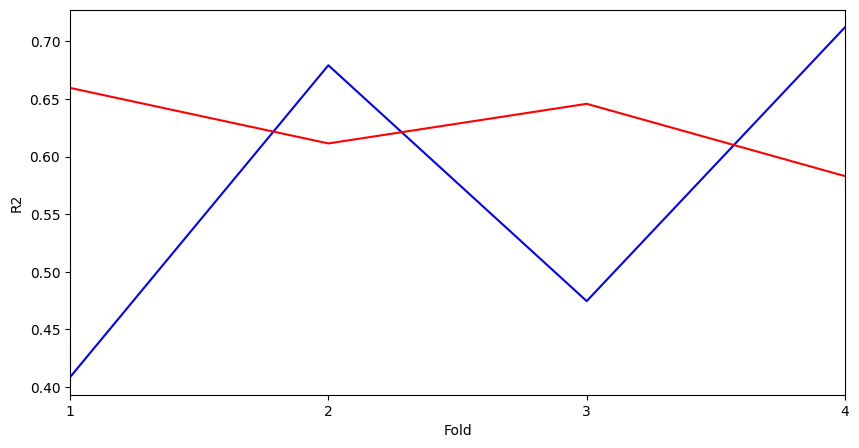

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "b-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "r-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

\

\

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

realXpredicted

target  predicted
0    11.900000  10.097296
1    10.750000  11.086190
2     9.330000   9.657085
3     9.540000  10.230395
4     8.270000   8.899276
5     7.550000  10.110017
6     9.120000   8.698741
7     7.760000   9.400332
8     7.470000   9.647362
9     7.440000   7.857238
10    8.910000   9.596475
11    9.730000   8.992772
12    9.860000  10.589526
13    8.040000   7.823670
14   10.730000   9.938356
15    6.730000   7.192504
16    7.770000   9.016584
17    8.230000   9.039320
18   10.310000   8.035337
19   10.280000  10.527039
20    9.080000   7.935789
21    5.460000   9.050710
22    5.350000   7.972848
23    5.640000   8.455747
24    7.830000   8.939710
25    9.200000   8.650681
26    5.810000   7.883004
27    6.750000   8.029267
28    8.330000   8.855680
29    8.410000   8.646324
30    6.530000   8.185458
31    8.210000   9.861070
32    7.750000   8.948718
33    7.760000   8.331036
34    7.160000   8.766919
35    7.470000   8.246496
36    9.630000   9.129690
37    7.560000   9.218639
38    6.930000  10.002386
39    6.780000   9.758544
40    5.530000   8.504868
41   10.510000   9.741357
42    8.320000   9.595268
43    9.180000  10.249738
44    8.790000  10.854129
45    8.310000  12.444697
46   12.390000  14.476470
47   12.420000  13.008701
48   14.080000  12.757264
49   13.930000  10.802318
50   12.150000  11.075028
51   12.630000  13.546994
52   11.030000  10.496596
53   10.840000  11.334623
54    9.260000  11.833407
55   11.780000  10.353510
56   16.049999  12.791044
57   12.120000   9.938356
58   10.050000  10.757523
59    8.380000   8.954354
60    6.940000   8.166925
61    8.320000   8.208164
62    6.660000   9.163089
63    7.780000   7.657010
64    6.940000   9.099848
65    6.750000   8.041410
66    6.560000   8.485614
67    6.120000   9.581986
68    6.810000   8.543509
69    6.450000   8.522021
70    6.810000   8.240268
71    7.100000   7.803010
72    7.460000   9.072390
73    7.370000   8.682327
74    6.540000   7.863177
75    7.870000   8.186488
76    9.190000  11.303267
77    7.800000   9.076960
78    6.940000   7.538381
79    6.140000   8.786812
80    7.380000   8.131011
81    8.030000  10.230395
82    8.770000   8.367835
83    4.570000   8.589893
84    8.890000   8.085068
85    9.250000  10.548270
86    8.190000   7.895919
87    9.110000  10.112564
88    9.030000   9.021126
89    9.180000  10.899326
90    6.870000   7.809890
91    7.300000   9.033630
92    6.110000   9.390867
93    6.830000   9.741357
94    9.820000  10.605538
95    9.130000  10.585526
96   12.090000  12.343257
97   13.590000  14.608314
98   13.190000  13.546994
99   15.440000  13.215078
100  13.570000  13.768843
101  16.410000  11.400468
102  11.270000  11.878194
103  13.520000  12.520144
104  14.860000  11.495608
105   9.240000   9.907119
106   9.180000   9.241886
107   7.930000   8.237156
108   9.750000   9.311973
109   8.470000   7.627179
110   7.620000   8.151515
111   7.570000   7.900891
112   5.490000   7.876058
113   7.150000   8.782388
114   7.650000   8.675770
115   8.360000   7.790247
116   7.520000   9.377869
117   7.350000   7.469405
118   6.390000  10.460969
119   5.860000   7.604163
120   7.490000   8.092198
121   5.230000   7.473167
122   7.320000   8.001008
123   6.460000   8.970154
124   7.890000   8.246496
125   7.240000   8.395275
126   9.080000   8.814516
127   6.490000   9.927100
128  10.200000   9.621886
129   6.720000   7.772610
130   5.890000   7.874076
131   5.280000   7.301091
132   8.170000   7.897907
133   5.710000   7.632944
134   5.570000   7.957804
135   6.030000   8.126917
136   4.560000   7.561197
137   7.560000   7.564054
138   4.820000   7.284561
139   8.110000   8.815627
140   6.770000   7.964820
141   8.750000   9.785616
142   6.720000   9.280367
143   7.970000   8.641970
144   8.070000  10.047831
145   9.140000   9.927100
146   6.120000   9.503881
147  10.720000  10.647018
148  11.740000  12.569112
149  13.760000  12.006012
150  17.780001  16.485378
151  26.240000  17.950102
152  30.430000  18.503176
153 

\

In [ ]:
realXpredicted.target.max()

30.43000030517578

In [ ]:
realXpredicted.target.min()

4.150000095367432

In [ ]:
realXpredicted.predicted.max()

18.503175541136617

In [ ]:
realXpredicted.predicted.min()

5.987655633746842

\

<Figure size 1500x600 with 0 Axes>

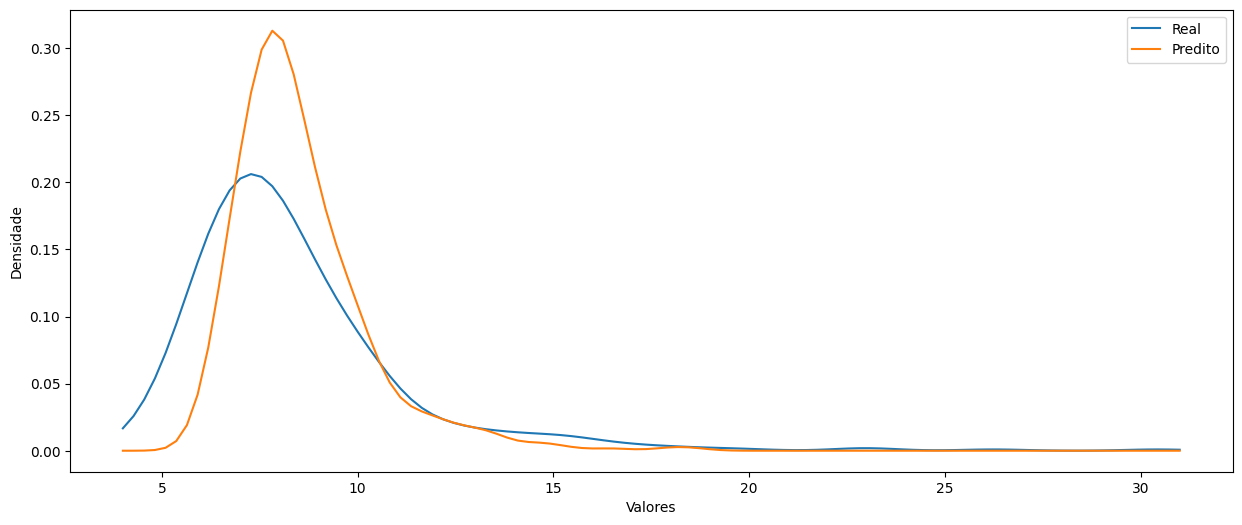

In [ ]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6

xAxis = np.linspace(4, 31, num=100)
plt.figure(figsize=(15,6))
ax = realXpredicted.plot.kde(ind=xAxis)
ax.legend(['Real', 'Predito'])
plt.xlabel("Valores")
plt.ylabel("Densidade")
ax.grid(False)
plt.show()




\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\

\

# inner 4-fold grid search of PySR optimization within an outer 5-fold cross-validation loop [function]

\

In [ ]:
!pip install pysr

     ---------------------------------------- 76.5/76.5 kB 2.1 MB/s eta 0:00:00


\

\

## function Run1 (ok  X)

In [ ]:
X.shape

(101, 3)

In [ ]:

import copy
from sklearn.model_selection import KFold, GridSearchCV




seed=42




param_grid_sr = {
    'niterations': [40, 60],
    'population_size': [33, 100],
    'populations': [30],
    'maxsize': [20],
    'procs': [16],
    'turbo': [True]
}

# Define scaling methods
scaling_methods = {
    #'StandardScaler': StandardScaler(),
    #"NoScaler": None,
    #'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}


# Initialize outer 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=seed)



# Initialize list to store outer CV results
outer_cv_scores = []
outer_cv_scores_train = []

outer_cv_xtrain_indexes = []
outer_cv_xtest_indexes = []
outer_cv_ytrain_indexes = []
outer_cv_ytest_indexes = []
bestR2 = -100000
the_best_model = None


count=0
start = datetime.now()




for iterator in range(0, len(outer_cv_xtrain_indexes_ref)):

    train_index = outer_cv_xtrain_indexes_ref[iterator]
    test_index  = outer_cv_xtest_indexes_ref[iterator]

    X_train_outer, X_test_outer = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train_outer, y_test_outer = y.iloc[train_index, :].values.ravel(), y.iloc[test_index, :].values.ravel()
    outer_cv_xtrain_indexes.append(train_index)
    outer_cv_xtest_indexes.append(test_index)
    outer_cv_ytrain_indexes.append(train_index)
    outer_cv_ytest_indexes.append(test_index)


    # Initialize list to store inner CV results
    inner_cv_scores = []

    # Initialize list to store inner CV results for train fold
    inner_cv_scores_train = []

    now = datetime.now()


    # Inner cross-validation loop for each scaling method
    for scaler_name, scaler in scaling_methods.items():

        if scaler_name!="NoScaler":
          # Apply scaling to the data
          X_train_scaled = scaler.fit_transform(X_train_outer)
          X_test_scaled = scaler.transform(X_test_outer)
        else:
          X_train_scaled = X_train_outer
          X_test_scaled = X_test_outer

        # Initialize inner 4-fold cross-validation
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=seed)


        from pysr import PySRRegressor
	    	# 8 minutes   4 minutes
        model = PySRRegressor(
			    procs=16,
			    turbo=True,
          random_state=seed,
			    binary_operators=["+", "*", "-", "/", "max"],
          unary_operators=["exp", "sin", "square", "cos", "log"],
			    # ^ Define operator for SymPy as well
			    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
			    # ^ Custom loss function (julia syntax)
  		  )


        then = datetime.now()


        # Grid search for hyperparameter optimization
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid_sr, cv=inner_cv, verbose=0, refit=True)
        grid_search.fit(X_train_scaled, y_train_outer)


        now = datetime.now()
        count = count + 16
        print("\n\n\n\n\n\n\n\n")
        print("##############################################################################")
        print(count, " /80\n")
        print("Tempo dos 16: ", now-then)
        print("Tempo desde o inicio: ", now-start)
        print("##############################################################################")
        print("\n\n\n\n\n\n\n\n")




        # Obtain best model from grid search
        best_sr = grid_search.best_estimator_

        print("\n\n", best_sr.get_params(), "\n\n")
        #print(best_rf.__dict__, "\n\n\n")

        # Evaluate best model on outer fold test set
        outer_cv_score = best_sr.score(X_test_scaled, y_test_outer)
        print("\n\n", outer_cv_score, "\n\n")

        # Evaluate best model on outer fold train set
        outer_cv_score_train = best_sr.score(X_train_scaled, y_train_outer)

        # Append outer fold score to inner_cv_scores
        inner_cv_scores.append(outer_cv_score)

        # Append outer fold score to inner_cv_scores_train
        inner_cv_scores_train.append(outer_cv_score_train)


        bestInnerR2 = best_sr.score(X_test_scaled, y_test_outer)
        if bestInnerR2 > bestR2:
          print("\n\n\nscaler_name: ", scaler_name, " - new best\n\n\n")
          bestR2 = bestInnerR2
          tempModel = copy.deepcopy(best_sr)
          tempModel.random_state=seed
          tempModel.fit(X_train_scaled, y_train_outer)
          the_best_model = copy.deepcopy(tempModel)
          print("\n\nnew best model: ", the_best_model.get_params(), "\n\n")
          print("\n\n", the_best_model.score(X_test_scaled, y_test_outer), "\n\n")




    # Append inner_cv_scores to outer_cv_scores
    outer_cv_scores.append(inner_cv_scores)

    # Append inner_cv_scores_train to outer_cv_scores_train
    outer_cv_scores_train.append(inner_cv_scores_train)






stop = datetime.now()
print("\n\nTempo total:", stop-start)

# Convert outer_cv_scores to numpy array for easy manipulation
outer_cv_scores = np.array(outer_cv_scores)
outer_cv_scores_train = np.array(outer_cv_scores_train)

# Calculate mean accuracy across outer folds for each scaling method
mean_accuracy_per_scaling_method = np.mean(outer_cv_scores, axis=0)

# Calculate mean accuracy across outer folds for train
mean_accuracy_train = np.mean(outer_cv_scores_train)
print("\n\n\n\nmean_accuracy_train: ", mean_accuracy_train)

# Calculate mean accuracy across outer folds for test
mean_accuracy_test = np.mean(outer_cv_scores)
print("\n\n\n\nmean_accuracy_test: ", mean_accuracy_test)


# Find index of the best performing scaling method
best_scaling_method_index = np.argmax(mean_accuracy_per_scaling_method)

# Print mean accuracy across outer folds for each scaling method
print("Mean accuracy across outer folds for each scaling method:")
for i, scaler_name in enumerate(scaling_methods.keys()):
    print(f"{scaler_name}: {mean_accuracy_per_scaling_method[i]}")

# Print the best performing scaling method
best_scaling_method_name = list(scaling_methods.keys())[best_scaling_method_index]
print("Best performing scaling method:", best_scaling_method_name)



bestR2 = bestInnerR2
tempModelaux = copy.deepcopy(the_best_model)
tempModelaux.random_state=seed
tempModelaux.fit(X, y)
the_best_model = copy.deepcopy(tempModelaux)
bestFinalR2trainAll = the_best_model.score(X, y)
print("\n\n\n\n#################\nFinal R2 whole dataset: ", bestFinalR2trainAll, "\n#################\n\n")



print("\n\n\nouter_cv_xtrain_indexes\n")
print(outer_cv_xtrain_indexes)
print("\n\n\nouter_cv_xtest_indexes\n")
print(outer_cv_xtest_indexes)
print("\n\n\nouter_cv_ytrain_indexes\n")
print(outer_cv_ytrain_indexes)
print("\n\n\nouter_cv_ytest_indexes\n")
print(outer_cv_ytest_indexes)
print("\n\n\n")




\

\

In [ ]:
best_sr = the_best_model

In [ ]:
print(best_sr)

PySRRegressor.equations_ = [
	   pick      score        equation          loss  complexity
	0         0.000000              x1  3.425330e+02           1
	1         0.484290         x3 + x1  1.300330e+02           3
	2  >>>>  15.843386  (x2 + x3) + x1  2.252491e-12           5
]


\

In [ ]:
best_sr.equations

C:\Users\perei\anaconda3\lib\site-packages\pysr\sr.py:1118: FutureWarning: PySRRegressor.equations is now deprecated. Please use PySRRegressor.equations_ instead.
  warnings.warn(


complexity          loss      score        equation  sympy_format  \
0           1  3.425330e+02   0.000000              x1            x1   
1           3  1.300330e+02   0.484290         x3 + x1       x1 + x3   
2           5  2.252491e-12  15.843386  (x2 + x3) + x1  x1 + x2 + x3   

                   lambda_format  
0            PySRFunction(X=>x1)  
1       PySRFunction(X=>x1 + x3)  
2  PySRFunction(X=>x1 + x2 + x3)

\

\

In [ ]:
best_sr.score(X,y)

1.0

\

In [ ]:
best_sr.model_selection = "accuracy"

In [ ]:
best_sr.score(X,y)

1.0

\

\

In [ ]:
outer_cv_scores

array([[0.99999956],
       [0.99999763],
       [0.99999528],
       [0.99999996],
       [0.99999959]])

In [ ]:
outer_cv_scores_train

array([[0.99999963],
       [0.99999828],
       [0.99999152],
       [0.99999997],
       [0.99999951]])

In [ ]:
outer_cv_scores.mean() # mean accuracy test

0.9999984024818916

In [ ]:
outer_cv_scores_train.mean()  # mean accuracy train

0.9999977829984376

\

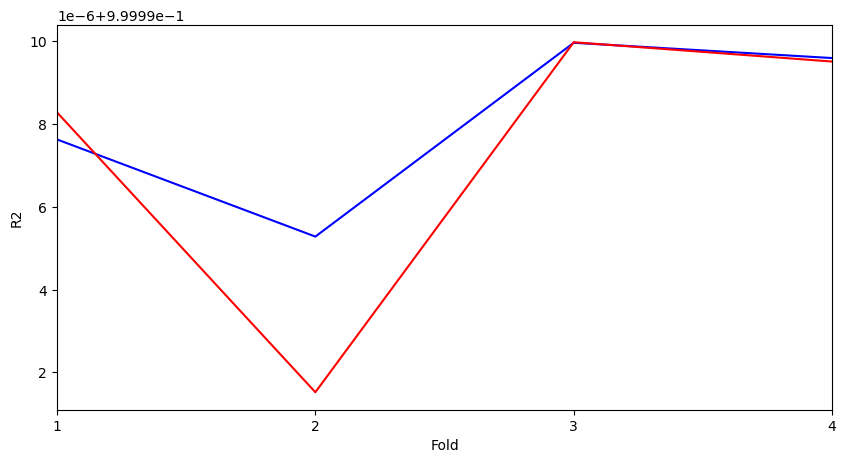

In [ ]:
plt.figure(figsize=(10,5))

ax1 = plt.plot(outer_cv_scores, "b-", label='Treino')
ax2 = plt.plot(outer_cv_scores_train, "r-", label='Teste')
plt.xticks(np.arange(1, 5, step=1))
ax=plt.subplot(111)
ax.set_xlim(1, 4)
plt.xlabel("Fold")
plt.ylabel("R2")
plt.show()

\

In [ ]:
realXpredicted = y.copy()
realXpredicted["predicted"] = the_best_model.predict(X)

realXpredicted

target  predicted
0   -125.000   -125.000
1   -118.139   -118.139
2   -111.552   -111.552
3   -105.233   -105.233
4    -99.176    -99.176
5    -93.375    -93.375
6    -87.824    -87.824
7    -82.517    -82.517
8    -77.448    -77.448
9    -72.611    -72.611
10   -68.000    -68.000
11   -63.609    -63.609
12   -59.432    -59.432
13   -55.463    -55.463
14   -51.696    -51.696
15   -48.125    -48.125
16   -44.744    -44.744
17   -41.547    -41.547
18   -38.528    -38.528
19   -35.681    -35.681
20   -33.000    -33.000
21   -30.479    -30.479
22   -28.112    -28.112
23   -25.893    -25.893
24   -23.816    -23.816
25   -21.875    -21.875
26   -20.064    -20.064
27   -18.377    -18.377
28   -16.808    -16.808
29   -15.351    -15.351
30   -14.000    -14.000
31   -12.749    -12.749
32   -11.592    -11.592
33   -10.523    -10.523
34    -9.536     -9.536
35    -8.625     -8.625
36    -7.784     -7.784
37    -7.007     -7.007
38    -6.288     -6.288
39    -5.621     -5.621
40    -5.000     -5.000
41    -4.419     -4.419
42    -3.872     -3.872
43    -3.353     -3.353
44    -2.856     -2.856
45    -2.375     -2.375
46    -1.904     -1.904
47    -1.437     -1.437
48    -0.968     -0.968
49    -0.491     -0.491
50     0.000      0.000
51     0.511      0.511
52     1.048      1.048
53     1.617      1.617
54     2.224      2.224
55     2.875      2.875
56     3.576      3.576
57     4.333      4.333
58     5.152      5.152
59     6.039      6.039
60     7.000      7.000
61     8.041      8.041
62     9.168      9.168
63    10.387     10.387
64    11.704     11.704
65    13.125     13.125
66    14.656     14.656
67    16.303     16.303
68    18.072     18.072
69    19.969     19.969
70    22.000     22.000
71    24.171     24.171
72    26.488     26.488
73    28.957     28.957
74    31.584     31.584
75    34.375     34.375
76    37.336     37.336
77    40.473     40.473
78    43.792     43.792
79    47.299     47.299
80    51.000     51.000
81    54.901     54.901
82    59.008     59.008
83    63.327     63.327
84    67.864     67.864
85    72.625     72.625
86    77.616     77.616
87    82.843     82.843
88    88.312     88.312
89    94.029     94.029
90   100.000    100.000
91   106.231    106.231
92   112.728    112.728
93   119.497    119.497
94   126.544    126.544
95   133.875    133.875
96   141.496    141.496
97   149.413    149.413
98   157.632    157.632
99   166.159    166.159
100  175.000    175.000

\

In [ ]:
realXpredicted.target.max()

175.0

In [ ]:
realXpredicted.target.min()

-125.0

In [ ]:
realXpredicted.predicted.max()

175.0

In [ ]:
realXpredicted.predicted.min()

-125.0

\

<Figure size 1500x600 with 0 Axes>

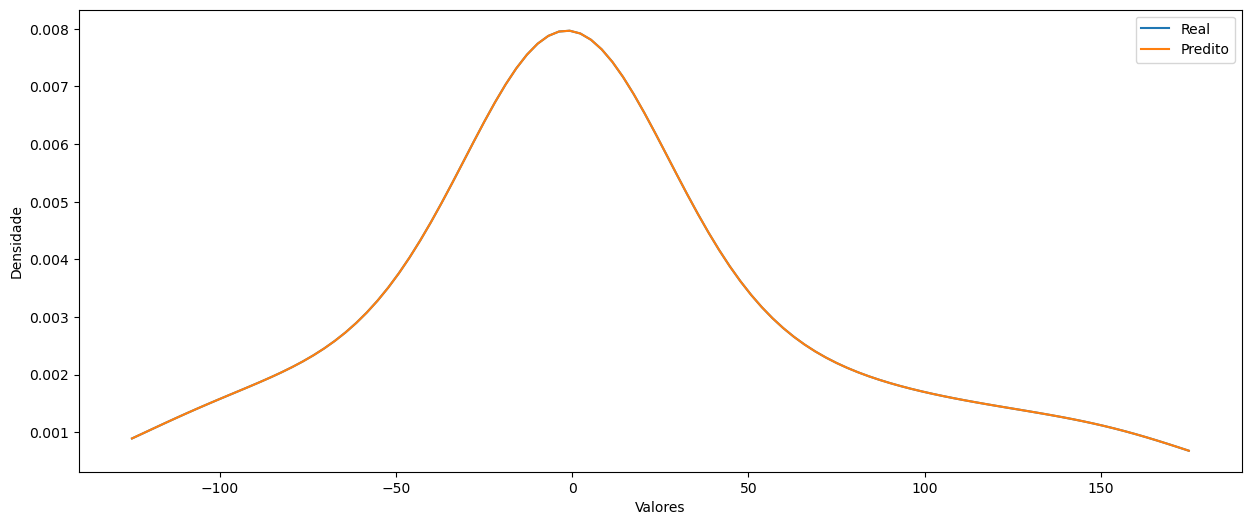

In [ ]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 15,6

xAxis = np.linspace(-125, 175, num=100)
plt.figure(figsize=(15,6))
ax = realXpredicted.plot.kde(ind=xAxis)
ax.legend(['Real', 'Predito'])
plt.xlabel("Valores")
plt.ylabel("Densidade")
ax.grid(False)
plt.show()




\

\

\
#◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼◼
\
